In [86]:
#Modules
import h5py
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [87]:
#(FILENAMES ARE HERE) Datasets
filepath1 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/7GeV_FinalResult1_NoSmash_80000_200PJ.h5"
LoStats_WithSmash_filepath1 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/7GeV_LowStats_Smash_5000_50PJ.h5"
filepath2 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/19GeV_FinalResult1_NoSmash_80000_400PJ.h5"
LoStats_WithSmash_filepath2 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/19GeV_LowStats_Smash_5000_50PJ.h5"
filepath3 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/27GeV_FinalResult1_NoSmash_80000_400PJ.h5"
LoStats_WithSmash_filepath3 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/27GeV_LowStats_Smash_5000_50PJ.h5"
filepath4 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/54GeV_FinalResult1_NoSmash_80000_500PJ.h5"
LoStats_WithSmash_filepath4 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/54GeV_LowStats_Smash_5000_50PJ.h5"
filepath5 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_FinalResult1_NoSmash_80000_500PJ.h5"
LoStats_WithSmash_filepath5 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_LowStats_Smash_5000_50PJ.h5"
filepath5alt = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_HIGHPTCUTS_80000_200PJ.h5"
filepath5altalt = "/Users/christianschmidt/Desktop/trajectum-2.1/src/PT_THRESHOLD_STUDY_200GeV_80000_160PJ.h5"
filepath5altaltalt = "/Users/christianschmidt/Desktop/trajectum-2.1/src/PT_THRESHOLD_STUDY1_200GeV_80000_160PJ.h5"

In [166]:
#Directories
MultiplicityCharged_MeanpTvalues = "meanptcharged/STARTPC/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues = "meanptcharged/STARTPC/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues = "meanptcharged/STARTPC/centralitybinned/lowererrors"
MultiplicityCharged_values = "multiplicitycharged/STARTPC/centralitybinned/values"
MultiplicityCharged_values_Uerr = "multiplicitycharged/STARTPC/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr = "multiplicitycharged/STARTPC/centralitybinned/lowererrors"
Centrality_Dir = "centrality"
ImpactParameter_values_Dir = "impactparameter/STARTPC/centralitybinned/values"
ImpactParameter_uerrs_Dir = "impactparameter/STARTPC/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir = "impactparameter/STARTPC/centralitybinned/lowererrors"
InitialRMS_values_Dir = "initialrms/STARTPC/centralitybinned/values"
InitialRMS_uerrs_Dir = "initialrms/STARTPC/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir = "initialrms/STARTPC/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC2 = "meanptcharged/STARTPC2/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2 = "meanptcharged/STARTPC2/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2 = "meanptcharged/STARTPC2/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC2 = "multiplicitycharged/STARTPC2/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC2 = "multiplicitycharged/STARTPC2/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC2 = "multiplicitycharged/STARTPC2/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC2 = "impactparameter/STARTPC2/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC2 = "impactparameter/STARTPC2/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC2 = "impactparameter/STARTPC2/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC2 = "initialrms/STARTPC2/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC2 = "initialrms/STARTPC2/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC2 = "initialrms/STARTPC2/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC0 = "meanptcharged/STARTPC0/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0 = "meanptcharged/STARTPC0/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0 = "meanptcharged/STARTPC0/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC0 = "multiplicitycharged/STARTPC0/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC0 = "multiplicitycharged/STARTPC0/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC0 = "multiplicitycharged/STARTPC0/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC450MeV = "meanptcharged/STARTPC450MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC450MeV = "meanptcharged/STARTPC450MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC450MeV = "meanptcharged/STARTPC450MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC450MeV = "multiplicitycharged/STARTPC450MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC450MeV = "multiplicitycharged/STARTPC450MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC450MeV = "multiplicitycharged/STARTPC450MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC450MeV = "impactparameter/STARTPC450MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC450MeV = "impactparameter/STARTPC450MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC450MeV = "impactparameter/STARTPC450MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC450MeV = "initialrms/STARTPC450MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC450MeV = "initialrms/STARTPC450MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC450MeV = "initialrms/STARTPC450MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC500MeV = "meanptcharged/STARTPC500MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC500MeV = "meanptcharged/STARTPC500MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC500MeV = "meanptcharged/STARTPC500MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC500MeV = "multiplicitycharged/STARTPC500MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC500MeV = "multiplicitycharged/STARTPC500MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC500MeV = "multiplicitycharged/STARTPC500MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC500MeV = "initialrms/STARTPC500MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC500MeV = "initialrms/STARTPC500MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC500MeV = "initialrms/STARTPC500MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC550MeV = "meanptcharged/STARTPC550MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC550MeV = "meanptcharged/STARTPC550MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC550MeV = "meanptcharged/STARTPC550MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC550MeV = "multiplicitycharged/STARTPC550MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC550MeV = "multiplicitycharged/STARTPC550MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC550MeV = "multiplicitycharged/STARTPC550MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC550MeV = "impactparameter/STARTPC550MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC550MeV = "impactparameter/STARTPC550MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC550MeV = "impactparameter/STARTPC550MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC550MeV = "initialrms/STARTPC550MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC550MeV = "initialrms/STARTPC550MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC550MeV = "initialrms/STARTPC550MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC600MeV = "meanptcharged/STARTPC600MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC600MeV = "meanptcharged/STARTPC600MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC600MeV = "meanptcharged/STARTPC600MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC600MeV = "multiplicitycharged/STARTPC600MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC600MeV = "multiplicitycharged/STARTPC600MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC600MeV = "multiplicitycharged/STARTPC600MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC600MeV = "impactparameter/STARTPC600MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC600MeV = "impactparameter/STARTPC600MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC600MeV = "impactparameter/STARTPC600MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC600MeV = "initialrms/STARTPC600MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC600MeV = "initialrms/STARTPC600MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC600MeV = "initialrms/STARTPC600MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC800MeV = "meanptcharged/STARTPC800MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC800MeV = "meanptcharged/STARTPC800MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC800MeV = "meanptcharged/STARTPC800MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC800MeV = "multiplicitycharged/STARTPC800MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC800MeV = "multiplicitycharged/STARTPC800MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC800MeV = "multiplicitycharged/STARTPC800MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC800MeV = "impactparameter/STARTPC800MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC800MeV = "impactparameter/STARTPC800MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC800MeV = "impactparameter/STARTPC800MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC800MeV = "initialrms/STARTPC800MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC800MeV = "initialrms/STARTPC800MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC800MeV = "initialrms/STARTPC800MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC1000MeV = "meanptcharged/STARTPC1000MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC1000MeV = "meanptcharged/STARTPC1000MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC1000MeV = "meanptcharged/STARTPC1000MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC1000MeV = "multiplicitycharged/STARTPC1000MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC1000MeV = "multiplicitycharged/STARTPC1000MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC1000MeV = "multiplicitycharged/STARTPC1000MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC1000MeV = "impactparameter/STARTPC1000MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC1000MeV = "impactparameter/STARTPC1000MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC1000MeV = "impactparameter/STARTPC1000MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC1000MeV = "initialrms/STARTPC1000MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC1000MeV = "initialrms/STARTPC1000MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC1000MeV = "initialrms/STARTPC1000MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC2000MeV = "meanptcharged/STARTPC2000MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2000MeV = "meanptcharged/STARTPC2000MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2000MeV = "meanptcharged/STARTPC2000MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC2000MeV = "multiplicitycharged/STARTPC2000MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC2000MeV = "multiplicitycharged/STARTPC2000MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC2000MeV = "multiplicitycharged/STARTPC2000MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC2800MeV = "meanptcharged/STARTPC2800MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2800MeV = "meanptcharged/STARTPC2800MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2800MeV = "meanptcharged/STARTPC2800MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC2800MeV = "multiplicitycharged/STARTPC2800MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC2800MeV = "multiplicitycharged/STARTPC2800MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC2800MeV = "multiplicitycharged/STARTPC2800MeV/centralitybinned/lowererrors"


In [168]:
#Importing from filepaths
with h5py.File(filepath1, "r") as hdf:
    MultiplicityCharged_MeanpT_1 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_1 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_1 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_1 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_1 + MultiplicityCharged_MeanpT_Lerr_1)
    MultiplicityCharged_1 = hdf[MultiplicityCharged_values][:]
    MultiplicityCharged_values_Uerr_1 = hdf[MultiplicityCharged_values_Uerr][:]
    MultiplicityCharged_values_Lerr_1 = hdf[MultiplicityCharged_values_Lerr][:]
    MultiplicityCharged_Symerr_1 = 0.5 * (MultiplicityCharged_values_Uerr_1 + MultiplicityCharged_values_Lerr_1)
    MultiplicityCharged_MeanpT_STARTPC2_1 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_1 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_1 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_1 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_1 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_1)
    MultiplicityCharged_STARTPC2_1 = hdf[MultiplicityCharged_values_STARTPC2][:]
    MultiplicityCharged_values_Uerr_STARTPC2_1 = hdf[MultiplicityCharged_values_Uerr_STARTPC2][:]
    MultiplicityCharged_values_Lerr_STARTPC2_1 = hdf[MultiplicityCharged_values_Lerr_STARTPC2][:]
    MultiplicityCharged_Symerr_STARTPC2_1 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC2_1 + MultiplicityCharged_values_Lerr_STARTPC2_1)
    MultiplicityCharged_MeanpT_STARTPC0_1 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC0_1 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC0_1 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC0_1 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC0_1 + MultiplicityCharged_MeanpT_Lerr_STARTPC0_1)
    MultiplicityCharged_STARTPC0_1 = hdf[MultiplicityCharged_values_STARTPC0][:]
    MultiplicityCharged_values_Uerr_STARTPC0_1 = hdf[MultiplicityCharged_values_Uerr_STARTPC0][:]
    MultiplicityCharged_values_Lerr_STARTPC0_1 = hdf[MultiplicityCharged_values_Lerr_STARTPC0][:]
    MultiplicityCharged_Symerr_STARTPC0_1 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC0_1 + MultiplicityCharged_values_Lerr_STARTPC0_1)

with h5py.File(LoStats_WithSmash_filepath1, "r") as hdf:
    MultiplicityCharged_MeanpT_STARTPC2_Smash_1 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_1 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_1 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]

with h5py.File(filepath2, "r") as hdf:
    MultiplicityCharged_MeanpT_2 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_2 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_2 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_2 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_2 + MultiplicityCharged_MeanpT_Lerr_2)
    MultiplicityCharged_2 = hdf[MultiplicityCharged_values][:]
    MultiplicityCharged_values_Uerr_2 = hdf[MultiplicityCharged_values_Uerr][:]
    MultiplicityCharged_values_Lerr_2 = hdf[MultiplicityCharged_values_Lerr][:]
    MultiplicityCharged_Symerr_2 = 0.5 * (MultiplicityCharged_values_Uerr_2 + MultiplicityCharged_values_Lerr_2)
    MultiplicityCharged_MeanpT_STARTPC2_2 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_2 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_2 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_2 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_2 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_2)
    MultiplicityCharged_STARTPC2_2 = hdf[MultiplicityCharged_values_STARTPC2][:]
    MultiplicityCharged_values_Uerr_STARTPC2_2 = hdf[MultiplicityCharged_values_Uerr_STARTPC2][:]
    MultiplicityCharged_values_Lerr_STARTPC2_2 = hdf[MultiplicityCharged_values_Lerr_STARTPC2][:]
    MultiplicityCharged_Symerr_STARTPC2_2 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC2_2 + MultiplicityCharged_values_Lerr_STARTPC2_2)
    MultiplicityCharged_MeanpT_STARTPC0_2 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC0_2 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC0_2 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC0_2 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC0_2 + MultiplicityCharged_MeanpT_Lerr_STARTPC0_2)
    MultiplicityCharged_STARTPC0_2 = hdf[MultiplicityCharged_values_STARTPC0][:]
    MultiplicityCharged_values_Uerr_STARTPC0_2 = hdf[MultiplicityCharged_values_Uerr_STARTPC0][:]
    MultiplicityCharged_values_Lerr_STARTPC0_2 = hdf[MultiplicityCharged_values_Lerr_STARTPC0][:]
    MultiplicityCharged_Symerr_STARTPC0_2 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC0_2 + MultiplicityCharged_values_Lerr_STARTPC0_2)

with h5py.File(LoStats_WithSmash_filepath2, "r") as hdf:
    MultiplicityCharged_MeanpT_STARTPC2_Smash_2 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_2 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_2 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]

with h5py.File(filepath3, "r") as hdf:
    MultiplicityCharged_MeanpT_3 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_3 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_3 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_3 + MultiplicityCharged_MeanpT_Lerr_3)
    MultiplicityCharged_3 = hdf[MultiplicityCharged_values][:]
    MultiplicityCharged_values_Uerr_3 = hdf[MultiplicityCharged_values_Uerr][:]
    MultiplicityCharged_values_Lerr_3 = hdf[MultiplicityCharged_values_Lerr][:]
    MultiplicityCharged_Symerr_3 = 0.5 * (MultiplicityCharged_values_Uerr_3 + MultiplicityCharged_values_Lerr_3)
    MultiplicityCharged_MeanpT_STARTPC2_3 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_3 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_3 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_3 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_3)
    MultiplicityCharged_STARTPC2_3 = hdf[MultiplicityCharged_values_STARTPC2][:]
    MultiplicityCharged_values_Uerr_STARTPC2_3 = hdf[MultiplicityCharged_values_Uerr_STARTPC2][:]
    MultiplicityCharged_values_Lerr_STARTPC2_3 = hdf[MultiplicityCharged_values_Lerr_STARTPC2][:]
    MultiplicityCharged_Symerr_STARTPC2_3 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC2_3 + MultiplicityCharged_values_Lerr_STARTPC2_3)
    MultiplicityCharged_MeanpT_STARTPC0_3 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC0_3 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC0_3 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC0_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC0_3 + MultiplicityCharged_MeanpT_Lerr_STARTPC0_3)
    MultiplicityCharged_STARTPC0_3 = hdf[MultiplicityCharged_values_STARTPC0][:]
    MultiplicityCharged_values_Uerr_STARTPC0_3 = hdf[MultiplicityCharged_values_Uerr_STARTPC0][:]
    MultiplicityCharged_values_Lerr_STARTPC0_3 = hdf[MultiplicityCharged_values_Lerr_STARTPC0][:]
    MultiplicityCharged_Symerr_STARTPC0_3 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC0_3 + MultiplicityCharged_values_Lerr_STARTPC0_3)

with h5py.File(LoStats_WithSmash_filepath3, "r") as hdf:
    MultiplicityCharged_MeanpT_STARTPC2_Smash_3 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_3 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_3 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]

with h5py.File(filepath4, "r") as hdf:
    MultiplicityCharged_MeanpT_4 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_4 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_4 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_4 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_4 + MultiplicityCharged_MeanpT_Lerr_4)
    MultiplicityCharged_4 = hdf[MultiplicityCharged_values][:]
    MultiplicityCharged_values_Uerr_4 = hdf[MultiplicityCharged_values_Uerr][:]
    MultiplicityCharged_values_Lerr_4 = hdf[MultiplicityCharged_values_Lerr][:]
    MultiplicityCharged_Symerr_4 = 0.5 * (MultiplicityCharged_values_Uerr_4 + MultiplicityCharged_values_Lerr_4)
    MultiplicityCharged_MeanpT_STARTPC2_4 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_4 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_4 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_4 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_4 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_4)
    MultiplicityCharged_STARTPC2_4 = hdf[MultiplicityCharged_values_STARTPC2][:]
    MultiplicityCharged_values_Uerr_STARTPC2_4 = hdf[MultiplicityCharged_values_Uerr_STARTPC2][:]
    MultiplicityCharged_values_Lerr_STARTPC2_4 = hdf[MultiplicityCharged_values_Lerr_STARTPC2][:]
    MultiplicityCharged_Symerr_STARTPC2_4 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC2_4 + MultiplicityCharged_values_Lerr_STARTPC2_4)
    MultiplicityCharged_MeanpT_STARTPC0_4 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC0_4 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC0_4 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC0_4 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC0_4 + MultiplicityCharged_MeanpT_Lerr_STARTPC0_4)
    MultiplicityCharged_STARTPC0_4 = hdf[MultiplicityCharged_values_STARTPC0][:]
    MultiplicityCharged_values_Uerr_STARTPC0_4 = hdf[MultiplicityCharged_values_Uerr_STARTPC0][:]
    MultiplicityCharged_values_Lerr_STARTPC0_4 = hdf[MultiplicityCharged_values_Lerr_STARTPC0][:]
    MultiplicityCharged_Symerr_STARTPC0_4 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC0_4 + MultiplicityCharged_values_Lerr_STARTPC0_4)

with h5py.File(LoStats_WithSmash_filepath4, "r") as hdf:
    MultiplicityCharged_MeanpT_STARTPC2_Smash_4 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_4 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_4 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]

with h5py.File(filepath5, "r") as hdf:
    MultiplicityCharged_MeanpT_5 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_5 + MultiplicityCharged_MeanpT_Lerr_5)
    MultiplicityCharged_5 = hdf[MultiplicityCharged_values][:]
    MultiplicityCharged_values_Uerr_5 = hdf[MultiplicityCharged_values_Uerr][:]
    MultiplicityCharged_values_Lerr_5 = hdf[MultiplicityCharged_values_Lerr][:]
    MultiplicityCharged_Symerr_5 = 0.5 * (MultiplicityCharged_values_Uerr_5 + MultiplicityCharged_values_Lerr_5)
    ImpactParameter_5 = hdf[ImpactParameter_values_Dir][:]
    ImpactParameter_Uerr_5 = hdf[ImpactParameter_uerrs_Dir][:]
    ImpactParameter_Lerr_5 = hdf[ImpactParameter_lerrs_Dir][:]
    ImpactParameter_Symerr_5 = 0.5 * (ImpactParameter_Lerr_5 + ImpactParameter_Uerr_5)
    InitialRMS_5 = hdf[InitialRMS_values_Dir][:]
    InitialRMS_Uerr_5 = hdf[InitialRMS_uerrs_Dir][:]
    InitialRMS_Lerr_5 = hdf[InitialRMS_lerrs_Dir][:]
    InitialRMS_Symerr_5 = 0.5 * (InitialRMS_Uerr_5 + InitialRMS_Lerr_5)
    
    MultiplicityCharged_MeanpT_STARTPC2_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_5)
    MultiplicityCharged_STARTPC2_5 = hdf[MultiplicityCharged_values_STARTPC2][:]
    MultiplicityCharged_values_Uerr_STARTPC2_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC2][:]
    MultiplicityCharged_values_Lerr_STARTPC2_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC2][:]
    MultiplicityCharged_Symerr_STARTPC2_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC2_5 + MultiplicityCharged_values_Lerr_STARTPC2_5)
    ImpactParameter_STARTPC2_5 = hdf[ImpactParameter_values_Dir_STARTPC2][:]
    ImpactParameter_Uerr_STARTPC2_5 = hdf[ImpactParameter_uerrs_Dir_STARTPC2][:]
    ImpactParameter_Lerr_STARTPC2_5 = hdf[ImpactParameter_lerrs_Dir_STARTPC2][:]
    ImpactParameter_Symerr_STARTPC2_5 = 0.5 * (ImpactParameter_Lerr_STARTPC2_5 + ImpactParameter_Uerr_STARTPC2_5)
    InitialRMS_STARTPC2_5 = hdf[InitialRMS_values_Dir_STARTPC2][:]
    InitialRMS_Uerr_STARTPC2_5 = hdf[InitialRMS_uerrs_Dir_STARTPC2][:]
    InitialRMS_Lerr_STARTPC2_5 = hdf[InitialRMS_lerrs_Dir_STARTPC2][:]
    InitialRMS_Symerr_STARTPC2_5 = 0.5 * (InitialRMS_Uerr_STARTPC2_5 + InitialRMS_Lerr_STARTPC2_5)
    
    MultiplicityCharged_MeanpT_STARTPC0_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC0_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC0_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC0_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC0_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC0_5)
    MultiplicityCharged_STARTPC0_5 = hdf[MultiplicityCharged_values_STARTPC0][:]
    MultiplicityCharged_values_Uerr_STARTPC0_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC0][:]
    MultiplicityCharged_values_Lerr_STARTPC0_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC0][:]
    MultiplicityCharged_Symerr_STARTPC0_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC0_5 + MultiplicityCharged_values_Lerr_STARTPC0_5)  
    Centrality = hdf[Centrality_Dir][:]
    

with h5py.File(LoStats_WithSmash_filepath5, "r") as hdf:
    MultiplicityCharged_MeanpT_STARTPC2_Smash_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]

with h5py.File(filepath5alt, "r") as hdf:  
    MultiplicityCharged_MeanpT_STARTPC1000MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC1000MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC1000MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC1000MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC1000MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC1000MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC1000MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC1000MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC1000MeV_5)
    MultiplicityCharged_STARTPC1000MeV_5 = hdf[MultiplicityCharged_values_STARTPC1000MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC1000MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC1000MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC1000MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC1000MeV][:]
    MultiplicityCharged_Symerr_STARTPC1000MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC1000MeV_5 + MultiplicityCharged_values_Lerr_STARTPC1000MeV_5)
    ImpactParameter_STARTPC1000MeV_5 = hdf[ImpactParameter_values_Dir_STARTPC1000MeV][:]
    ImpactParameter_Uerr_STARTPC1000MeV_5 = hdf[ImpactParameter_uerrs_Dir_STARTPC1000MeV][:]
    ImpactParameter_Lerr_STARTPC1000MeV_5 = hdf[ImpactParameter_lerrs_Dir_STARTPC1000MeV][:]
    ImpactParameter_Symerr_STARTPC1000MeV_5 = 0.5 * (ImpactParameter_Lerr_STARTPC1000MeV_5 + ImpactParameter_Uerr_STARTPC1000MeV_5)
    InitialRMS_STARTPC1000MeV_5 = hdf[InitialRMS_values_Dir_STARTPC1000MeV][:]
    InitialRMS_Uerr_STARTPC1000MeV_5 = hdf[InitialRMS_uerrs_Dir_STARTPC1000MeV][:]
    InitialRMS_Lerr_STARTPC1000MeV_5 = hdf[InitialRMS_lerrs_Dir_STARTPC1000MeV][:]
    InitialRMS_Symerr_STARTPC1000MeV_5 = 0.5 * (InitialRMS_Uerr_STARTPC1000MeV_5 + InitialRMS_Lerr_STARTPC1000MeV_5)

    MultiplicityCharged_MeanpT_STARTPC2000MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2000MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2000MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2000MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2000MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2000MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2000MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2000MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC2000MeV_5)
    MultiplicityCharged_STARTPC2000MeV_5 = hdf[MultiplicityCharged_values_STARTPC2000MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC2000MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC2000MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC2000MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC2000MeV][:]
    MultiplicityCharged_Symerr_STARTPC2000MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC2000MeV_5 + MultiplicityCharged_values_Lerr_STARTPC2000MeV_5)
    
    MultiplicityCharged_MeanpT_STARTPC2800MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2800MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2800MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2800MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2800MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2800MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2800MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2800MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC2800MeV_5)
    MultiplicityCharged_STARTPC2800MeV_5 = hdf[MultiplicityCharged_values_STARTPC2800MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC2800MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC2800MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC2800MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC2800MeV][:]
    MultiplicityCharged_Symerr_STARTPC2800MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC2800MeV_5 + MultiplicityCharged_values_Lerr_STARTPC2800MeV_5)

with h5py.File(filepath5altalt, "r") as hdf:
    MultiplicityCharged_MeanpT_STARTPC600MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC600MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC600MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC600MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC600MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC600MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC600MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC600MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC600MeV_5)
    MultiplicityCharged_STARTPC600MeV_5 = hdf[MultiplicityCharged_values_STARTPC600MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC600MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC600MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC600MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC600MeV][:]
    MultiplicityCharged_Symerr_STARTPC600MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC600MeV_5 + MultiplicityCharged_values_Lerr_STARTPC600MeV_5)
    ImpactParameter_STARTPC600MeV_5 = hdf[ImpactParameter_values_Dir_STARTPC600MeV][:]
    ImpactParameter_Uerr_STARTPC600MeV_5 = hdf[ImpactParameter_uerrs_Dir_STARTPC600MeV][:]
    ImpactParameter_Lerr_STARTPC600MeV_5 = hdf[ImpactParameter_lerrs_Dir_STARTPC600MeV][:]
    ImpactParameter_Symerr_STARTPC600MeV_5 = 0.5 * (ImpactParameter_Lerr_STARTPC600MeV_5 + ImpactParameter_Uerr_STARTPC600MeV_5)
    InitialRMS_STARTPC600MeV_5 = hdf[InitialRMS_values_Dir_STARTPC600MeV][:]
    InitialRMS_Uerr_STARTPC600MeV_5 = hdf[InitialRMS_uerrs_Dir_STARTPC600MeV][:]
    InitialRMS_Lerr_STARTPC600MeV_5 = hdf[InitialRMS_lerrs_Dir_STARTPC600MeV][:]
    InitialRMS_Symerr_STARTPC600MeV_5 = 0.5 * (InitialRMS_Uerr_STARTPC600MeV_5 + InitialRMS_Lerr_STARTPC600MeV_5)

    MultiplicityCharged_MeanpT_STARTPC800MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC800MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC800MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC800MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC800MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC800MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC800MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC800MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC800MeV_5)
    MultiplicityCharged_STARTPC800MeV_5 = hdf[MultiplicityCharged_values_STARTPC800MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC800MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC800MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC800MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC800MeV][:]
    MultiplicityCharged_Symerr_STARTPC800MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC800MeV_5 + MultiplicityCharged_values_Lerr_STARTPC800MeV_5)
    ImpactParameter_STARTPC800MeV_5 = hdf[ImpactParameter_values_Dir_STARTPC800MeV][:]
    ImpactParameter_Uerr_STARTPC800MeV_5 = hdf[ImpactParameter_uerrs_Dir_STARTPC800MeV][:]
    ImpactParameter_Lerr_STARTPC800MeV_5 = hdf[ImpactParameter_lerrs_Dir_STARTPC800MeV][:]
    ImpactParameter_Symerr_STARTPC800MeV_5 = 0.5 * (ImpactParameter_Lerr_STARTPC800MeV_5 + ImpactParameter_Uerr_STARTPC800MeV_5)
    InitialRMS_STARTPC800MeV_5 = hdf[InitialRMS_values_Dir_STARTPC800MeV][:]
    InitialRMS_Uerr_STARTPC800MeV_5 = hdf[InitialRMS_uerrs_Dir_STARTPC800MeV][:]
    InitialRMS_Lerr_STARTPC800MeV_5 = hdf[InitialRMS_lerrs_Dir_STARTPC800MeV][:]
    InitialRMS_Symerr_STARTPC800MeV_5 = 0.5 * (InitialRMS_Uerr_STARTPC800MeV_5 + InitialRMS_Lerr_STARTPC800MeV_5)

with h5py.File(filepath5altaltalt, "r") as hdf:
    MultiplicityCharged_MeanpT_STARTPC450MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC450MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC450MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC450MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC450MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC450MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC450MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC450MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC450MeV_5)
    MultiplicityCharged_STARTPC450MeV_5 = hdf[MultiplicityCharged_values_STARTPC450MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC450MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC450MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC450MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC450MeV][:]
    MultiplicityCharged_Symerr_STARTPC450MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC450MeV_5 + MultiplicityCharged_values_Lerr_STARTPC450MeV_5)
    ImpactParameter_STARTPC450MeV_5 = hdf[ImpactParameter_values_Dir_STARTPC450MeV][:]
    ImpactParameter_Uerr_STARTPC450MeV_5 = hdf[ImpactParameter_uerrs_Dir_STARTPC450MeV][:]
    ImpactParameter_Lerr_STARTPC450MeV_5 = hdf[ImpactParameter_lerrs_Dir_STARTPC450MeV][:]
    ImpactParameter_Symerr_STARTPC450MeV_5 = 0.5 * (ImpactParameter_Lerr_STARTPC450MeV_5 + ImpactParameter_Uerr_STARTPC450MeV_5)   
    InitialRMS_STARTPC450MeV_5 = hdf[InitialRMS_values_Dir_STARTPC450MeV][:]
    InitialRMS_Uerr_STARTPC450MeV_5 = hdf[InitialRMS_uerrs_Dir_STARTPC450MeV][:]
    InitialRMS_Lerr_STARTPC450MeV_5 = hdf[InitialRMS_lerrs_Dir_STARTPC450MeV][:]
    InitialRMS_Symerr_STARTPC450MeV_5 = 0.5 * (InitialRMS_Uerr_STARTPC450MeV_5 + InitialRMS_Lerr_STARTPC450MeV_5)

    MultiplicityCharged_MeanpT_STARTPC500MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC500MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC500MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC500MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC500MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC500MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC500MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC500MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC500MeV_5)
    MultiplicityCharged_STARTPC500MeV_5 = hdf[MultiplicityCharged_values_STARTPC500MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC500MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC500MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC500MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC500MeV][:]
    MultiplicityCharged_Symerr_STARTPC500MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC500MeV_5 + MultiplicityCharged_values_Lerr_STARTPC500MeV_5)
    ImpactParameter_STARTPC500MeV_5 = hdf[ImpactParameter_values_Dir_STARTPC500MeV][:]
    ImpactParameter_Uerr_STARTPC500MeV_5 = hdf[ImpactParameter_uerrs_Dir_STARTPC500MeV][:]
    ImpactParameter_Lerr_STARTPC500MeV_5 = hdf[ImpactParameter_lerrs_Dir_STARTPC500MeV][:]
    ImpactParameter_Symerr_STARTPC500MeV_5 = 0.5 * (ImpactParameter_Lerr_STARTPC500MeV_5 + ImpactParameter_Uerr_STARTPC500MeV_5)
    InitialRMS_STARTPC500MeV_5 = hdf[InitialRMS_values_Dir_STARTPC500MeV][:]
    InitialRMS_Uerr_STARTPC500MeV_5 = hdf[InitialRMS_uerrs_Dir_STARTPC500MeV][:]
    InitialRMS_Lerr_STARTPC500MeV_5 = hdf[InitialRMS_lerrs_Dir_STARTPC500MeV][:]
    InitialRMS_Symerr_STARTPC500MeV_5 = 0.5 * (InitialRMS_Uerr_STARTPC500MeV_5 + InitialRMS_Lerr_STARTPC500MeV_5)

    MultiplicityCharged_MeanpT_STARTPC550MeV_5 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC550MeV][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC550MeV_5 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC550MeV][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC550MeV_5 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC550MeV][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC550MeV_5 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC550MeV_5 + MultiplicityCharged_MeanpT_Lerr_STARTPC550MeV_5)
    MultiplicityCharged_STARTPC550MeV_5 = hdf[MultiplicityCharged_values_STARTPC550MeV][:]
    MultiplicityCharged_values_Uerr_STARTPC550MeV_5 = hdf[MultiplicityCharged_values_Uerr_STARTPC550MeV][:]
    MultiplicityCharged_values_Lerr_STARTPC550MeV_5 = hdf[MultiplicityCharged_values_Lerr_STARTPC550MeV][:]
    MultiplicityCharged_Symerr_STARTPC550MeV_5 = 0.5 * (MultiplicityCharged_values_Uerr_STARTPC550MeV_5 + MultiplicityCharged_values_Lerr_STARTPC550MeV_5)
    ImpactParameter_STARTPC550MeV_5 = hdf[ImpactParameter_values_Dir_STARTPC550MeV][:]
    ImpactParameter_Uerr_STARTPC550MeV_5 = hdf[ImpactParameter_uerrs_Dir_STARTPC550MeV][:]
    ImpactParameter_Lerr_STARTPC550MeV_5 = hdf[ImpactParameter_lerrs_Dir_STARTPC550MeV][:]
    ImpactParameter_Symerr_STARTPC550MeV_5 = 0.5 * (ImpactParameter_Lerr_STARTPC550MeV_5 + ImpactParameter_Uerr_STARTPC550MeV_5)
    InitialRMS_STARTPC550MeV_5 = hdf[InitialRMS_values_Dir_STARTPC550MeV][:]
    InitialRMS_Uerr_STARTPC550MeV_5 = hdf[InitialRMS_uerrs_Dir_STARTPC550MeV][:]
    InitialRMS_Lerr_STARTPC550MeV_5 = hdf[InitialRMS_lerrs_Dir_STARTPC550MeV][:]
    InitialRMS_Symerr_STARTPC550MeV_5 = 0.5 * (InitialRMS_Uerr_STARTPC550MeV_5 + InitialRMS_Lerr_STARTPC550MeV_5)


In [169]:
#Normalizing
MultiplicityCharged_MeanpT_05_1 = MultiplicityCharged_MeanpT_1 / MultiplicityCharged_MeanpT_1[16]
MultiplicityCharged_MeanpT_05_Symerr_1 = MultiplicityCharged_MeanpT_05_1 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_1/MultiplicityCharged_MeanpT_1)**2 + (MultiplicityCharged_MeanpT_Symerr_1[16]/MultiplicityCharged_MeanpT_1[16])**2)
MultiplicityCharged_05_1 = MultiplicityCharged_1 / MultiplicityCharged_1[16]
MultiplicityCharged_05_Symerr_1 = MultiplicityCharged_05_1 * np.sqrt((MultiplicityCharged_Symerr_1/MultiplicityCharged_1)**2 + (MultiplicityCharged_Symerr_1[16]/MultiplicityCharged_1[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC2_1 = MultiplicityCharged_MeanpT_STARTPC2_1 / MultiplicityCharged_MeanpT_STARTPC2_1[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_1 = MultiplicityCharged_MeanpT_05_STARTPC2_1 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_1/MultiplicityCharged_MeanpT_STARTPC2_1)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_1[16]/MultiplicityCharged_MeanpT_STARTPC2_1[16])**2)
MultiplicityCharged_05_STARTPC2_1 = MultiplicityCharged_STARTPC2_1 / MultiplicityCharged_STARTPC2_1[16]
MultiplicityCharged_05_Symerr_STARTPC2_1 = MultiplicityCharged_05_STARTPC2_1 * np.sqrt((MultiplicityCharged_Symerr_STARTPC2_1/MultiplicityCharged_STARTPC2_1)**2 + (MultiplicityCharged_Symerr_STARTPC2_1[16]/MultiplicityCharged_STARTPC2_1[16])**2)
  
MultiplicityCharged_MeanpT_05_2 = MultiplicityCharged_MeanpT_2 / MultiplicityCharged_MeanpT_2[16]
MultiplicityCharged_MeanpT_05_Symerr_2 = MultiplicityCharged_MeanpT_05_2 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_2/MultiplicityCharged_MeanpT_2)**2 + (MultiplicityCharged_MeanpT_Symerr_2[16]/MultiplicityCharged_MeanpT_2[16])**2)
MultiplicityCharged_05_2 = MultiplicityCharged_2 / MultiplicityCharged_2[16]
MultiplicityCharged_05_Symerr_2 = MultiplicityCharged_05_2 * np.sqrt((MultiplicityCharged_Symerr_2/MultiplicityCharged_2)**2 + (MultiplicityCharged_Symerr_2[16]/MultiplicityCharged_2[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC2_2 = MultiplicityCharged_MeanpT_STARTPC2_2 / MultiplicityCharged_MeanpT_STARTPC2_2[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_2 = MultiplicityCharged_MeanpT_05_STARTPC2_2 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_2/MultiplicityCharged_MeanpT_STARTPC2_2)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_2[16]/MultiplicityCharged_MeanpT_STARTPC2_2[16])**2)
MultiplicityCharged_05_STARTPC2_2 = MultiplicityCharged_STARTPC2_2 / MultiplicityCharged_STARTPC2_2[16]
MultiplicityCharged_05_Symerr_STARTPC2_2 = MultiplicityCharged_05_STARTPC2_2 * np.sqrt((MultiplicityCharged_Symerr_STARTPC2_2/MultiplicityCharged_STARTPC2_2)**2 + (MultiplicityCharged_Symerr_STARTPC2_2[16]/MultiplicityCharged_STARTPC2_2[16])**2)

MultiplicityCharged_MeanpT_05_3 = MultiplicityCharged_MeanpT_3 / MultiplicityCharged_MeanpT_3[16]
MultiplicityCharged_MeanpT_05_Symerr_3 = MultiplicityCharged_MeanpT_05_3 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_3/MultiplicityCharged_MeanpT_3)**2 + (MultiplicityCharged_MeanpT_Symerr_3[16]/MultiplicityCharged_MeanpT_3[16])**2)
MultiplicityCharged_05_3 = MultiplicityCharged_3 / MultiplicityCharged_3[16]
MultiplicityCharged_05_Symerr_3 = MultiplicityCharged_05_3 * np.sqrt((MultiplicityCharged_Symerr_3/MultiplicityCharged_3)**2 + (MultiplicityCharged_Symerr_3[16]/MultiplicityCharged_3[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC2_3 = MultiplicityCharged_MeanpT_STARTPC2_3 / MultiplicityCharged_MeanpT_STARTPC2_3[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_3 = MultiplicityCharged_MeanpT_05_STARTPC2_3 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_3/MultiplicityCharged_MeanpT_STARTPC2_3)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_3[16]/MultiplicityCharged_MeanpT_STARTPC2_3[16])**2)
MultiplicityCharged_05_STARTPC2_3 = MultiplicityCharged_STARTPC2_3 / MultiplicityCharged_STARTPC2_3[16]
MultiplicityCharged_05_Symerr_STARTPC2_3 = MultiplicityCharged_05_STARTPC2_3 * np.sqrt((MultiplicityCharged_Symerr_STARTPC2_3/MultiplicityCharged_STARTPC2_3)**2 + (MultiplicityCharged_Symerr_STARTPC2_3[16]/MultiplicityCharged_STARTPC2_3[16])**2)

MultiplicityCharged_MeanpT_05_4 = MultiplicityCharged_MeanpT_4 / MultiplicityCharged_MeanpT_4[16]
MultiplicityCharged_MeanpT_05_Symerr_4 = MultiplicityCharged_MeanpT_05_4 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_4/MultiplicityCharged_MeanpT_4)**2 + (MultiplicityCharged_MeanpT_Symerr_4[16]/MultiplicityCharged_MeanpT_4[16])**2)
MultiplicityCharged_05_4 = MultiplicityCharged_4 / MultiplicityCharged_4[16]
MultiplicityCharged_05_Symerr_4 = MultiplicityCharged_05_4 * np.sqrt((MultiplicityCharged_Symerr_4/MultiplicityCharged_4)**2 + (MultiplicityCharged_Symerr_4[16]/MultiplicityCharged_4[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC2_4 = MultiplicityCharged_MeanpT_STARTPC2_4 / MultiplicityCharged_MeanpT_STARTPC2_4[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_4 = MultiplicityCharged_MeanpT_05_STARTPC2_4 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_4/MultiplicityCharged_MeanpT_STARTPC2_4)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_4[16]/MultiplicityCharged_MeanpT_STARTPC2_4[16])**2)
MultiplicityCharged_05_STARTPC2_4 = MultiplicityCharged_STARTPC2_4 / MultiplicityCharged_STARTPC2_4[16]
MultiplicityCharged_05_Symerr_STARTPC2_4 = MultiplicityCharged_05_STARTPC2_4 * np.sqrt((MultiplicityCharged_Symerr_STARTPC2_4/MultiplicityCharged_STARTPC2_4)**2 + (MultiplicityCharged_Symerr_STARTPC2_4[16]/MultiplicityCharged_STARTPC2_4[16])**2)

MultiplicityCharged_MeanpT_05_5 = MultiplicityCharged_MeanpT_5 / MultiplicityCharged_MeanpT_5[16]
MultiplicityCharged_MeanpT_05_Symerr_5 = MultiplicityCharged_MeanpT_05_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_5/MultiplicityCharged_MeanpT_5)**2 + (MultiplicityCharged_MeanpT_Symerr_5[16]/MultiplicityCharged_MeanpT_5[16])**2)
MultiplicityCharged_05_5 = MultiplicityCharged_5 / MultiplicityCharged_5[16]
MultiplicityCharged_05_Symerr_5 = MultiplicityCharged_05_5 * np.sqrt((MultiplicityCharged_Symerr_5/MultiplicityCharged_5)**2 + (MultiplicityCharged_Symerr_5[16]/MultiplicityCharged_5[16])**2)
ImpactParameter_05_5 = ImpactParameter_5 / ImpactParameter_5[16]
ImpactParameter_05_Symerr_5 = ImpactParameter_05_5 * np.sqrt((ImpactParameter_Symerr_5/ImpactParameter_5)**2+(ImpactParameter_Symerr_5[16]/ImpactParameter_5[16])**2)
InitialRMS_05_5 = InitialRMS_5 / InitialRMS_5[16]
InitialRMS_05_Symerr_5 = InitialRMS_05_5 * np.sqrt((InitialRMS_Symerr_5/InitialRMS_5)**2+(InitialRMS_Symerr_5[16]/InitialRMS_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC2_5 = MultiplicityCharged_MeanpT_STARTPC2_5 / MultiplicityCharged_MeanpT_STARTPC2_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_5 = MultiplicityCharged_MeanpT_05_STARTPC2_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_5/MultiplicityCharged_MeanpT_STARTPC2_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_5[16]/MultiplicityCharged_MeanpT_STARTPC2_5[16])**2)
MultiplicityCharged_05_STARTPC2_5 = MultiplicityCharged_STARTPC2_5 / MultiplicityCharged_STARTPC2_5[16]
MultiplicityCharged_05_Symerr_STARTPC2_5 = MultiplicityCharged_05_STARTPC2_5 * np.sqrt((MultiplicityCharged_Symerr_STARTPC2_5/MultiplicityCharged_STARTPC2_5)**2 + (MultiplicityCharged_Symerr_STARTPC2_5[16]/MultiplicityCharged_STARTPC2_5[16])**2)
ImpactParameter_05_STARTPC2_5 = ImpactParameter_STARTPC2_5 / ImpactParameter_STARTPC2_5[16]
ImpactParameter_05_Symerr_STARTPC2_5 = ImpactParameter_05_STARTPC2_5 * np.sqrt((ImpactParameter_Symerr_STARTPC2_5/ImpactParameter_STARTPC2_5)**2+(ImpactParameter_Symerr_STARTPC2_5[16]/ImpactParameter_STARTPC2_5[16])**2)
InitialRMS_05_STARTPC2_5 = InitialRMS_STARTPC2_5 / InitialRMS_STARTPC2_5[16]
InitialRMS_05_Symerr_STARTPC2_5 = InitialRMS_05_STARTPC2_5 * np.sqrt((InitialRMS_Symerr_STARTPC2_5/InitialRMS_STARTPC2_5)**2+(InitialRMS_Symerr_STARTPC2_5[16]/InitialRMS_STARTPC2_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC0_5 = MultiplicityCharged_MeanpT_STARTPC0_5 / MultiplicityCharged_MeanpT_STARTPC0_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC0_5 = MultiplicityCharged_MeanpT_05_STARTPC0_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC0_5/MultiplicityCharged_MeanpT_STARTPC0_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC0_5[16]/MultiplicityCharged_MeanpT_STARTPC0_5[16])**2)
MultiplicityCharged_05_STARTPC0_5 = MultiplicityCharged_STARTPC0_5 / MultiplicityCharged_STARTPC0_5[16]
MultiplicityCharged_05_Symerr_STARTPC0_5 = MultiplicityCharged_05_STARTPC0_5 * np.sqrt((MultiplicityCharged_Symerr_STARTPC0_5/MultiplicityCharged_STARTPC0_5)**2 + (MultiplicityCharged_Symerr_STARTPC0_5[16]/MultiplicityCharged_STARTPC0_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC450MeV_5 = MultiplicityCharged_MeanpT_STARTPC450MeV_5 / MultiplicityCharged_MeanpT_STARTPC450MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC450MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC450MeV_5 * np.sqrt(
    (MultiplicityCharged_MeanpT_Symerr_STARTPC450MeV_5 / MultiplicityCharged_MeanpT_STARTPC450MeV_5)**2 +
    (MultiplicityCharged_MeanpT_Symerr_STARTPC450MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC450MeV_5[16])**2
)
MultiplicityCharged_05_STARTPC450MeV_5 = MultiplicityCharged_STARTPC450MeV_5 / MultiplicityCharged_STARTPC450MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC450MeV_5 = MultiplicityCharged_05_STARTPC450MeV_5 * np.sqrt(
    (MultiplicityCharged_Symerr_STARTPC450MeV_5 / MultiplicityCharged_STARTPC450MeV_5)**2 +
    (MultiplicityCharged_Symerr_STARTPC450MeV_5[16] / MultiplicityCharged_STARTPC450MeV_5[16])**2
)
ImpactParameter_05_STARTPC450MeV_5 = ImpactParameter_STARTPC450MeV_5 / ImpactParameter_STARTPC450MeV_5[16]
ImpactParameter_05_Symerr_STARTPC450MeV_5 = ImpactParameter_05_STARTPC450MeV_5 * np.sqrt((ImpactParameter_Symerr_STARTPC450MeV_5/ImpactParameter_STARTPC450MeV_5)**2+(ImpactParameter_Symerr_STARTPC450MeV_5[16]/ImpactParameter_STARTPC450MeV_5[16])**2)
InitialRMS_05_STARTPC450MeV_5 = InitialRMS_STARTPC450MeV_5 / InitialRMS_STARTPC450MeV_5[16]
InitialRMS_05_Symerr_STARTPC450MeV_5 = InitialRMS_05_STARTPC450MeV_5 * np.sqrt((InitialRMS_Symerr_STARTPC450MeV_5/InitialRMS_STARTPC450MeV_5)**2+(InitialRMS_Symerr_STARTPC450MeV_5[16]/InitialRMS_STARTPC450MeV_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC500MeV_5 = MultiplicityCharged_MeanpT_STARTPC500MeV_5 / MultiplicityCharged_MeanpT_STARTPC500MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC500MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC500MeV_5 * np.sqrt(
    (MultiplicityCharged_MeanpT_Symerr_STARTPC500MeV_5 / MultiplicityCharged_MeanpT_STARTPC500MeV_5)**2 +
    (MultiplicityCharged_MeanpT_Symerr_STARTPC500MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC500MeV_5[16])**2
)
MultiplicityCharged_05_STARTPC500MeV_5 = MultiplicityCharged_STARTPC500MeV_5 / MultiplicityCharged_STARTPC500MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC500MeV_5 = MultiplicityCharged_05_STARTPC500MeV_5 * np.sqrt(
    (MultiplicityCharged_Symerr_STARTPC500MeV_5 / MultiplicityCharged_STARTPC500MeV_5)**2 +
    (MultiplicityCharged_Symerr_STARTPC500MeV_5[16] / MultiplicityCharged_STARTPC500MeV_5[16])**2
)
ImpactParameter_05_STARTPC500MeV_5 = ImpactParameter_STARTPC500MeV_5 / ImpactParameter_STARTPC500MeV_5[16]
ImpactParameter_05_Symerr_STARTPC500MeV_5 = ImpactParameter_05_STARTPC500MeV_5 * np.sqrt((ImpactParameter_Symerr_STARTPC500MeV_5/ImpactParameter_STARTPC500MeV_5)**2+(ImpactParameter_Symerr_STARTPC500MeV_5[16]/ImpactParameter_STARTPC500MeV_5[16])**2)
InitialRMS_05_STARTPC500MeV_5 = InitialRMS_STARTPC500MeV_5 / InitialRMS_STARTPC500MeV_5[16]
InitialRMS_05_Symerr_STARTPC500MeV_5 = InitialRMS_05_STARTPC500MeV_5 * np.sqrt((InitialRMS_Symerr_STARTPC500MeV_5/InitialRMS_STARTPC500MeV_5)**2+(InitialRMS_Symerr_STARTPC500MeV_5[16]/InitialRMS_STARTPC500MeV_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC550MeV_5 = MultiplicityCharged_MeanpT_STARTPC550MeV_5 / MultiplicityCharged_MeanpT_STARTPC550MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC550MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC550MeV_5 * np.sqrt(
    (MultiplicityCharged_MeanpT_Symerr_STARTPC550MeV_5 / MultiplicityCharged_MeanpT_STARTPC550MeV_5)**2 +
    (MultiplicityCharged_MeanpT_Symerr_STARTPC550MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC550MeV_5[16])**2
)
MultiplicityCharged_05_STARTPC550MeV_5 = MultiplicityCharged_STARTPC550MeV_5 / MultiplicityCharged_STARTPC550MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC550MeV_5 = MultiplicityCharged_05_STARTPC550MeV_5 * np.sqrt(
    (MultiplicityCharged_Symerr_STARTPC550MeV_5 / MultiplicityCharged_STARTPC550MeV_5)**2 +
    (MultiplicityCharged_Symerr_STARTPC550MeV_5[16] / MultiplicityCharged_STARTPC550MeV_5[16])**2
)
ImpactParameter_05_STARTPC550MeV_5 = ImpactParameter_STARTPC550MeV_5 / ImpactParameter_STARTPC550MeV_5[16]
ImpactParameter_05_Symerr_STARTPC550MeV_5 = ImpactParameter_05_STARTPC550MeV_5 * np.sqrt((ImpactParameter_Symerr_STARTPC550MeV_5/ImpactParameter_STARTPC550MeV_5)**2+(ImpactParameter_Symerr_STARTPC550MeV_5[16]/ImpactParameter_STARTPC550MeV_5[16])**2)
InitialRMS_05_STARTPC550MeV_5 = InitialRMS_STARTPC550MeV_5 / InitialRMS_STARTPC550MeV_5[16]
InitialRMS_05_Symerr_STARTPC550MeV_5 = InitialRMS_05_STARTPC550MeV_5 * np.sqrt((InitialRMS_Symerr_STARTPC550MeV_5/InitialRMS_STARTPC550MeV_5)**2+(InitialRMS_Symerr_STARTPC550MeV_5[16]/InitialRMS_STARTPC550MeV_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC600MeV_5 = MultiplicityCharged_MeanpT_STARTPC600MeV_5 / MultiplicityCharged_MeanpT_STARTPC600MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC600MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC600MeV_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC600MeV_5 / MultiplicityCharged_MeanpT_STARTPC600MeV_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC600MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC600MeV_5[16])**2)
MultiplicityCharged_05_STARTPC600MeV_5 = MultiplicityCharged_STARTPC600MeV_5 / MultiplicityCharged_STARTPC600MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC600MeV_5 = MultiplicityCharged_05_STARTPC600MeV_5 * np.sqrt((MultiplicityCharged_Symerr_STARTPC600MeV_5 / MultiplicityCharged_STARTPC600MeV_5)**2 + (MultiplicityCharged_Symerr_STARTPC600MeV_5[16] / MultiplicityCharged_STARTPC600MeV_5[16])**2)
ImpactParameter_05_STARTPC600MeV_5 = ImpactParameter_STARTPC600MeV_5 / ImpactParameter_STARTPC600MeV_5[16]
ImpactParameter_05_Symerr_STARTPC600MeV_5 = ImpactParameter_05_STARTPC600MeV_5 * np.sqrt((ImpactParameter_Symerr_STARTPC600MeV_5/ImpactParameter_STARTPC600MeV_5)**2+(ImpactParameter_Symerr_STARTPC600MeV_5[16]/ImpactParameter_STARTPC600MeV_5[16])**2)
InitialRMS_05_STARTPC600MeV_5 = InitialRMS_STARTPC500MeV_5 / InitialRMS_STARTPC600MeV_5[16]
InitialRMS_05_Symerr_STARTPC600MeV_5 = InitialRMS_05_STARTPC600MeV_5 * np.sqrt((InitialRMS_Symerr_STARTPC600MeV_5/InitialRMS_STARTPC600MeV_5)**2+(InitialRMS_Symerr_STARTPC600MeV_5[16]/InitialRMS_STARTPC600MeV_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC800MeV_5 = MultiplicityCharged_MeanpT_STARTPC800MeV_5 / MultiplicityCharged_MeanpT_STARTPC800MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC800MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC800MeV_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC800MeV_5 / MultiplicityCharged_MeanpT_STARTPC800MeV_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC800MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC800MeV_5[16])**2)
MultiplicityCharged_05_STARTPC800MeV_5 = MultiplicityCharged_STARTPC800MeV_5 / MultiplicityCharged_STARTPC800MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC800MeV_5 = MultiplicityCharged_05_STARTPC800MeV_5 * np.sqrt((MultiplicityCharged_Symerr_STARTPC800MeV_5 / MultiplicityCharged_STARTPC800MeV_5)**2 + (MultiplicityCharged_Symerr_STARTPC800MeV_5[16] / MultiplicityCharged_STARTPC800MeV_5[16])**2)
ImpactParameter_05_STARTPC800MeV_5 = ImpactParameter_STARTPC800MeV_5 / ImpactParameter_STARTPC800MeV_5[16]
ImpactParameter_05_Symerr_STARTPC800MeV_5 = ImpactParameter_05_STARTPC800MeV_5 * np.sqrt((ImpactParameter_Symerr_STARTPC800MeV_5/ImpactParameter_STARTPC800MeV_5)**2+(ImpactParameter_Symerr_STARTPC800MeV_5[16]/ImpactParameter_STARTPC800MeV_5[16])**2)
InitialRMS_05_STARTPC800MeV_5 = InitialRMS_STARTPC800MeV_5 / InitialRMS_STARTPC800MeV_5[16]
InitialRMS_05_Symerr_STARTPC800MeV_5 = InitialRMS_05_STARTPC800MeV_5 * np.sqrt((InitialRMS_Symerr_STARTPC800MeV_5/InitialRMS_STARTPC800MeV_5)**2+(InitialRMS_Symerr_STARTPC800MeV_5[16]/InitialRMS_STARTPC800MeV_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC1000MeV_5 = MultiplicityCharged_MeanpT_STARTPC1000MeV_5 / MultiplicityCharged_MeanpT_STARTPC1000MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC1000MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC1000MeV_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC1000MeV_5 / MultiplicityCharged_MeanpT_STARTPC1000MeV_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC1000MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC1000MeV_5[16])**2)
MultiplicityCharged_05_STARTPC1000MeV_5 = MultiplicityCharged_STARTPC1000MeV_5 / MultiplicityCharged_STARTPC1000MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC1000MeV_5 = MultiplicityCharged_05_STARTPC1000MeV_5 * np.sqrt((MultiplicityCharged_Symerr_STARTPC1000MeV_5 / MultiplicityCharged_STARTPC1000MeV_5)**2 + (MultiplicityCharged_Symerr_STARTPC1000MeV_5[16] / MultiplicityCharged_STARTPC1000MeV_5[16])**2)
ImpactParameter_05_STARTPC1000MeV_5 = ImpactParameter_STARTPC1000MeV_5 / ImpactParameter_STARTPC1000MeV_5[16]
ImpactParameter_05_Symerr_STARTPC1000MeV_5 = ImpactParameter_05_STARTPC1000MeV_5 * np.sqrt((ImpactParameter_Symerr_STARTPC1000MeV_5/ImpactParameter_STARTPC1000MeV_5)**2+(ImpactParameter_Symerr_STARTPC1000MeV_5[16]/ImpactParameter_STARTPC1000MeV_5[16])**2)
InitialRMS_05_STARTPC1000MeV_5 = InitialRMS_STARTPC1000MeV_5 / InitialRMS_STARTPC1000MeV_5[16]
InitialRMS_05_Symerr_STARTPC1000MeV_5 = InitialRMS_05_STARTPC1000MeV_5 * np.sqrt((InitialRMS_Symerr_STARTPC1000MeV_5/InitialRMS_STARTPC1000MeV_5)**2+(InitialRMS_Symerr_STARTPC1000MeV_5[16]/InitialRMS_STARTPC1000MeV_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC2000MeV_5 = MultiplicityCharged_MeanpT_STARTPC2000MeV_5 / MultiplicityCharged_MeanpT_STARTPC2000MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2000MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC2000MeV_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2000MeV_5 / MultiplicityCharged_MeanpT_STARTPC2000MeV_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2000MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC2000MeV_5[16])**2)
MultiplicityCharged_05_STARTPC2000MeV_5 = MultiplicityCharged_STARTPC2000MeV_5 / MultiplicityCharged_STARTPC2000MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC2000MeV_5 = MultiplicityCharged_05_STARTPC2000MeV_5 * np.sqrt((MultiplicityCharged_Symerr_STARTPC2000MeV_5 / MultiplicityCharged_STARTPC2000MeV_5)**2 + (MultiplicityCharged_Symerr_STARTPC2000MeV_5[16] / MultiplicityCharged_STARTPC2000MeV_5[16])**2)

MultiplicityCharged_MeanpT_05_STARTPC2800MeV_5 = MultiplicityCharged_MeanpT_STARTPC2800MeV_5 / MultiplicityCharged_MeanpT_STARTPC2800MeV_5[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2800MeV_5 = MultiplicityCharged_MeanpT_05_STARTPC2800MeV_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2800MeV_5 / MultiplicityCharged_MeanpT_STARTPC2800MeV_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2800MeV_5[16] / MultiplicityCharged_MeanpT_STARTPC2800MeV_5[16])**2)
MultiplicityCharged_05_STARTPC2800MeV_5 = MultiplicityCharged_STARTPC2800MeV_5 / MultiplicityCharged_STARTPC2800MeV_5[16]
MultiplicityCharged_05_Symerr_STARTPC2800MeV_5 = MultiplicityCharged_05_STARTPC2800MeV_5 * np.sqrt((MultiplicityCharged_Symerr_STARTPC2800MeV_5 / MultiplicityCharged_STARTPC2800MeV_5)**2 + (MultiplicityCharged_Symerr_STARTPC2800MeV_5[16] / MultiplicityCharged_STARTPC2800MeV_5[16])**2)

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/3601579255.py:61: RuntimeWarning: divide by zero encountered in divide
  MultiplicityCharged_MeanpT_05_Symerr_STARTPC0_5 = MultiplicityCharged_MeanpT_05_STARTPC0_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC0_5/MultiplicityCharged_MeanpT_STARTPC0_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC0_5[16]/MultiplicityCharged_MeanpT_STARTPC0_5[16])**2)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/3601579255.py:61: RuntimeWarning: invalid value encountered in multiply
  MultiplicityCharged_MeanpT_05_Symerr_STARTPC0_5 = MultiplicityCharged_MeanpT_05_STARTPC0_5 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC0_5/MultiplicityCharged_MeanpT_STARTPC0_5)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC0_5[16]/MultiplicityCharged_MeanpT_STARTPC0_5[16])**2)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/3601579255.py:63: RuntimeWarning: invalid value encountered in divide
  MultiplicityC

In [91]:
def compute_chi2_ndf(xdata, ydata, yerr, fit_func, popt):
    model_y = fit_func(xdata, *popt)
    residuals = (ydata - model_y) / yerr
    chi2 = np.sum(residuals**2)
    ndf = len(xdata) - len(popt)
    chi2_ndf = chi2 / ndf
    return chi2, ndf, chi2_ndf

#Non-analytic model.
def power_law_fit(x,a,cs2):
    return a * x ** cs2

In [92]:
#fitting bounds for curve 1
lowerbound_1 = 1.15
upperbound_1 = 1.300

lowerbound_STARTPC2_1 = 1.150
upperbound_STARTPC2_1 = 1.300

In [93]:
#fitting bounds for curve 2
lowerbound_2 = 1.15
upperbound_2 = 1.300

lowerbound_STARTPC2_2 = 1.15
upperbound_STARTPC2_2 = 1.300

In [94]:
#fitting bounds for curve 3
lowerbound_3 = 1.15
upperbound_3 = 1.300

lowerbound_STARTPC2_3 = 1.15
upperbound_STARTPC2_3 = 1.300

In [95]:
#fitting bounds for curve 4
lowerbound_4 = 1.15
upperbound_4 = 1.300

lowerbound_STARTPC2_4 = 1.15
upperbound_STARTPC2_4 = 1.300

In [96]:
#fitting bounds for curve 5
lowerbound_5 = 1.15
upperbound_5 = 1.300

lowerbound_STARTPC2_5 = 1.15
upperbound_STARTPC2_5 = 1.300

lowerbound_450MeV_5 = 1.15
upperbound_450MeV_5 = 1.300

lowerbound_500MeV_5 = 1.15
upperbound_500MeV_5 = 1.300

lowerbound_550MeV_5 = 1.15
upperbound_550MeV_5 = 1.300

lowerbound_600MeV_5 = 1.15
upperbound_600MeV_5 = 1.300

lowerbound_800MeV_5 = 1.15
upperbound_800MeV_5 = 1.300

lowerbound_1000MeV_5 = 1.15
upperbound_1000MeV_5 = 1.300

lowerbound_2000MeV_5 = 1.09
upperbound_2000MeV_5 = 1.19

lowerbound_2800MeV_5 = 1.09
upperbound_2800MeV_5 = 1.19

In [97]:
#Fit masks
fit_mask1 = (MultiplicityCharged_05_1 >= lowerbound_1) & (MultiplicityCharged_05_1 <= upperbound_1)
fit_mask_STARTPC2_1 = (MultiplicityCharged_05_STARTPC2_1 >= lowerbound_STARTPC2_1) & (MultiplicityCharged_05_STARTPC2_1 <= upperbound_STARTPC2_1)

fit_mask2 = (MultiplicityCharged_05_2 >= lowerbound_2) & (MultiplicityCharged_05_2 <= upperbound_2)
fit_mask_STARTPC2_2 = (MultiplicityCharged_05_STARTPC2_2 >= lowerbound_STARTPC2_2) & (MultiplicityCharged_05_STARTPC2_2 <= upperbound_STARTPC2_2)

fit_mask3 = (MultiplicityCharged_05_3 >= lowerbound_3) & (MultiplicityCharged_05_3 <= upperbound_3)
fit_mask_STARTPC2_3 = (MultiplicityCharged_05_STARTPC2_3 >= lowerbound_STARTPC2_3) & (MultiplicityCharged_05_STARTPC2_3 <= upperbound_STARTPC2_3)

fit_mask4 = (MultiplicityCharged_05_4 >= lowerbound_4) & (MultiplicityCharged_05_4 <= upperbound_4)
fit_mask_STARTPC2_4 = (MultiplicityCharged_05_STARTPC2_4 >= lowerbound_STARTPC2_4) & (MultiplicityCharged_05_STARTPC2_4 <= upperbound_STARTPC2_4)

fit_mask5 = (MultiplicityCharged_05_5 >= lowerbound_5) & (MultiplicityCharged_05_5 <= upperbound_5)
fit_mask_STARTPC2_5 = (MultiplicityCharged_05_STARTPC2_5 >= lowerbound_STARTPC2_5) & (MultiplicityCharged_05_STARTPC2_5 <= upperbound_STARTPC2_5)
fit_mask_450MeV_5 = (MultiplicityCharged_05_STARTPC450MeV_5 >= lowerbound_450MeV_5) & (MultiplicityCharged_05_STARTPC450MeV_5 <= upperbound_450MeV_5)
fit_mask_500MeV_5 = (MultiplicityCharged_05_STARTPC500MeV_5 >= lowerbound_500MeV_5) & (MultiplicityCharged_05_STARTPC500MeV_5 <= upperbound_500MeV_5)
fit_mask_550MeV_5 = (MultiplicityCharged_05_STARTPC550MeV_5 >= lowerbound_550MeV_5) & (MultiplicityCharged_05_STARTPC550MeV_5 <= upperbound_550MeV_5)
fit_mask_600MeV_5 = (MultiplicityCharged_05_STARTPC600MeV_5 >= lowerbound_600MeV_5) & (MultiplicityCharged_05_STARTPC600MeV_5 <= upperbound_600MeV_5)
fit_mask_800MeV_5 = (MultiplicityCharged_05_STARTPC800MeV_5 >= lowerbound_800MeV_5) & (MultiplicityCharged_05_STARTPC800MeV_5 <= upperbound_800MeV_5)
fit_mask_1000MeV_5 = (MultiplicityCharged_05_STARTPC1000MeV_5 >= lowerbound_1000MeV_5) & (MultiplicityCharged_05_STARTPC1000MeV_5 <= upperbound_1000MeV_5)
fit_mask_2000MeV_5 = (MultiplicityCharged_05_STARTPC2000MeV_5 >= lowerbound_2000MeV_5) & (MultiplicityCharged_05_STARTPC2000MeV_5 <= upperbound_2000MeV_5)
fit_mask_2800MeV_5 = (MultiplicityCharged_05_STARTPC2800MeV_5 >= lowerbound_2800MeV_5) & (MultiplicityCharged_05_STARTPC2800MeV_5 <= upperbound_2800MeV_5)

In [98]:
#Applying fit ranges, getting cs2 vals
xnorm1_fitrange = MultiplicityCharged_05_1[fit_mask1]
ynorm1_fitrange = MultiplicityCharged_MeanpT_05_1[fit_mask1]
ynorm1err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_1[fit_mask1]

xnorm1_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_1[fit_mask_STARTPC2_1]
ynorm1_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_1[fit_mask_STARTPC2_1]
ynorm1err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_1[fit_mask_STARTPC2_1]

popt1, pcov1 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm1_fitrange, ynorm1_fitrange, sigma=ynorm1err_fitrange, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

popt1_STARTPC2, pcov1_STARTPC2 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm1_fitrange_STARTPC2, ynorm1_fitrange_STARTPC2, sigma=ynorm1err_fitrange_STARTPC2, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

cs2_1 = popt1[1]
cs2_1_err = np.sqrt(pcov1[1][1])
cs2_1_STARTPC2 = popt1_STARTPC2[1]
cs2_1_err_STARTPC2 = np.sqrt(pcov1_STARTPC2[1][1])

chi2_1, ndf_1, chi2_ndf_1 = compute_chi2_ndf(xnorm1_fitrange, ynorm1_fitrange, ynorm1err_fitrange, power_law_fit, popt1)
chi2_1_STARTPC2, ndf_1_STARTPC2, chi2_ndf_1_STARTPC2 = compute_chi2_ndf(xnorm1_fitrange_STARTPC2, ynorm1_fitrange_STARTPC2, ynorm1err_fitrange_STARTPC2, power_law_fit, popt1_STARTPC2)



xnorm2_fitrange = MultiplicityCharged_05_2[fit_mask2]
ynorm2_fitrange = MultiplicityCharged_MeanpT_05_2[fit_mask2]
ynorm2err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_2[fit_mask2]

xnorm2_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_2[fit_mask_STARTPC2_2]
ynorm2_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_2[fit_mask_STARTPC2_2]
ynorm2err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_2[fit_mask_STARTPC2_2]

popt2, pcov2 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm2_fitrange, ynorm2_fitrange, sigma=ynorm2err_fitrange, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

popt2_STARTPC2, pcov2_STARTPC2 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm2_fitrange_STARTPC2, ynorm2_fitrange_STARTPC2, sigma=ynorm2err_fitrange_STARTPC2, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

cs2_2 = popt2[1]
cs2_2_err = np.sqrt(pcov2[1][1])
cs2_2_STARTPC2 = popt2_STARTPC2[1]
cs2_2_err_STARTPC2 = np.sqrt(pcov2_STARTPC2[1][1])

chi2_2, ndf_2, chi2_ndf_2 = compute_chi2_ndf(xnorm2_fitrange, ynorm2_fitrange, ynorm2err_fitrange, power_law_fit, popt2)
chi2_2_STARTPC2, ndf_2_STARTPC2, chi2_ndf_2_STARTPC2 = compute_chi2_ndf(xnorm2_fitrange_STARTPC2, ynorm2_fitrange_STARTPC2, ynorm2err_fitrange_STARTPC2, power_law_fit, popt2_STARTPC2)



xnorm3_fitrange = MultiplicityCharged_05_3[fit_mask3]
ynorm3_fitrange = MultiplicityCharged_MeanpT_05_3[fit_mask3]
ynorm3err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_3[fit_mask3]

xnorm3_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_3[fit_mask_STARTPC2_3]
ynorm3_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_3[fit_mask_STARTPC2_3]
ynorm3err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_3[fit_mask_STARTPC2_3]

popt3, pcov3 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm3_fitrange, ynorm3_fitrange, sigma=ynorm3err_fitrange, absolute_sigma=True,    
)

popt3_STARTPC2, pcov3_STARTPC2 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm3_fitrange_STARTPC2, ynorm3_fitrange_STARTPC2, sigma=ynorm3err_fitrange_STARTPC2, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

cs2_3 = popt3[1]
cs2_3_err = np.sqrt(pcov3[1][1])
chi2_3, ndf_3, chi2_ndf_3 = compute_chi2_ndf(xnorm3_fitrange, ynorm3_fitrange, ynorm3err_fitrange, power_law_fit, popt3)

cs2_3_STARTPC2 = popt3_STARTPC2[1]
cs2_3_err_STARTPC2 = np.sqrt(pcov3_STARTPC2[1][1])
chi2_3_STARTPC2, ndf_3_STARTPC2, chi2_ndf_3_STARTPC2 = compute_chi2_ndf(xnorm3_fitrange_STARTPC2, ynorm3_fitrange_STARTPC2, ynorm3err_fitrange_STARTPC2, power_law_fit, popt3_STARTPC2)



xnorm4_fitrange = MultiplicityCharged_05_4[fit_mask4]
ynorm4_fitrange = MultiplicityCharged_MeanpT_05_4[fit_mask4]
ynorm4err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_4[fit_mask4]

xnorm4_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_4[fit_mask_STARTPC2_4]
ynorm4_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_4[fit_mask_STARTPC2_4]
ynorm4err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_4[fit_mask_STARTPC2_4]

popt4, pcov4 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm4_fitrange, ynorm4_fitrange, sigma=ynorm4err_fitrange, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

popt4_STARTPC2, pcov4_STARTPC2 = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    xnorm4_fitrange_STARTPC2, ynorm4_fitrange_STARTPC2, sigma=ynorm4err_fitrange_STARTPC2, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

cs2_4 = popt4[1]
cs2_4_err = np.sqrt(pcov4[1][1])
chi2_4, ndf_4, chi2_ndf_4 = compute_chi2_ndf(xnorm4_fitrange, ynorm4_fitrange, ynorm4err_fitrange, power_law_fit, popt4)

cs2_4_STARTPC2 = popt4_STARTPC2[1]
cs2_4_err_STARTPC2 = np.sqrt(pcov4_STARTPC2[1][1])
chi2_4_STARTPC2, ndf_4_STARTPC2, chi2_ndf_4_STARTPC2 = compute_chi2_ndf(xnorm4_fitrange_STARTPC2, ynorm4_fitrange_STARTPC2, ynorm4err_fitrange_STARTPC2, power_law_fit, popt4_STARTPC2)



xnorm5_fitrange = MultiplicityCharged_05_5[fit_mask5]
ynorm5_fitrange = MultiplicityCharged_MeanpT_05_5[fit_mask5]
ynorm5err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_5[fit_mask5]

xnorm5_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_5[fit_mask_STARTPC2_5]
ynorm5_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_5[fit_mask_STARTPC2_5]
ynorm5err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_5[fit_mask_STARTPC2_5]

xnorm5_fitrange_450MeV = MultiplicityCharged_05_STARTPC450MeV_5[fit_mask_450MeV_5]
ynorm5_fitrange_450MeV = MultiplicityCharged_MeanpT_05_STARTPC450MeV_5[fit_mask_450MeV_5]
ynorm5err_fitrange_450MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC450MeV_5[fit_mask_450MeV_5]

xnorm5_fitrange_500MeV = MultiplicityCharged_05_STARTPC500MeV_5[fit_mask_500MeV_5]
ynorm5_fitrange_500MeV = MultiplicityCharged_MeanpT_05_STARTPC500MeV_5[fit_mask_500MeV_5]
ynorm5err_fitrange_500MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC500MeV_5[fit_mask_500MeV_5]

xnorm5_fitrange_550MeV = MultiplicityCharged_05_STARTPC550MeV_5[fit_mask_550MeV_5]
ynorm5_fitrange_550MeV = MultiplicityCharged_MeanpT_05_STARTPC550MeV_5[fit_mask_550MeV_5]
ynorm5err_fitrange_550MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC550MeV_5[fit_mask_550MeV_5]

xnorm5_fitrange_600MeV = MultiplicityCharged_05_STARTPC600MeV_5[fit_mask_600MeV_5]
ynorm5_fitrange_600MeV = MultiplicityCharged_MeanpT_05_STARTPC600MeV_5[fit_mask_600MeV_5]
ynorm5err_fitrange_600MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC600MeV_5[fit_mask_600MeV_5]

xnorm5_fitrange_600MeV = MultiplicityCharged_05_STARTPC600MeV_5[fit_mask_600MeV_5]
ynorm5_fitrange_600MeV = MultiplicityCharged_MeanpT_05_STARTPC600MeV_5[fit_mask_600MeV_5]
ynorm5err_fitrange_600MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC600MeV_5[fit_mask_600MeV_5]

xnorm5_fitrange_800MeV = MultiplicityCharged_05_STARTPC800MeV_5[fit_mask_800MeV_5]
ynorm5_fitrange_800MeV = MultiplicityCharged_MeanpT_05_STARTPC800MeV_5[fit_mask_800MeV_5]
ynorm5err_fitrange_800MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC800MeV_5[fit_mask_800MeV_5]

xnorm5_fitrange_1000MeV = MultiplicityCharged_05_STARTPC1000MeV_5[fit_mask_1000MeV_5]
ynorm5_fitrange_1000MeV = MultiplicityCharged_MeanpT_05_STARTPC1000MeV_5[fit_mask_1000MeV_5]
ynorm5err_fitrange_1000MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC1000MeV_5[fit_mask_1000MeV_5]

xnorm5_fitrange_2000MeV = MultiplicityCharged_05_STARTPC2000MeV_5[fit_mask_2000MeV_5]
ynorm5_fitrange_2000MeV = MultiplicityCharged_MeanpT_05_STARTPC2000MeV_5[fit_mask_2000MeV_5]
ynorm5err_fitrange_2000MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2000MeV_5[fit_mask_2000MeV_5]

xnorm5_fitrange_2800MeV = MultiplicityCharged_05_STARTPC2800MeV_5[fit_mask_2800MeV_5]
ynorm5_fitrange_2800MeV = MultiplicityCharged_MeanpT_05_STARTPC2800MeV_5[fit_mask_2800MeV_5]
ynorm5err_fitrange_2800MeV = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2800MeV_5[fit_mask_2800MeV_5]

popt5, pcov5 = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange, ynorm5_fitrange, sigma=ynorm5err_fitrange,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

popt5_STARTPC2, pcov5_STARTPC2 = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_STARTPC2, ynorm5_fitrange_STARTPC2, sigma=ynorm5err_fitrange_STARTPC2,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

# For 450 MeV
popt5_450MeV, pcov5_450MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_450MeV, ynorm5_fitrange_450MeV, sigma=ynorm5err_fitrange_450MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

# For 500 MeV
popt5_500MeV, pcov5_500MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_500MeV, ynorm5_fitrange_500MeV, sigma=ynorm5err_fitrange_500MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

# For 550 MeV
popt5_550MeV, pcov5_550MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_550MeV, ynorm5_fitrange_550MeV, sigma=ynorm5err_fitrange_550MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

popt5_600MeV, pcov5_600MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_600MeV, ynorm5_fitrange_600MeV, sigma=ynorm5err_fitrange_600MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

popt5_800MeV, pcov5_800MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_800MeV, ynorm5_fitrange_800MeV, sigma=ynorm5err_fitrange_800MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

popt5_1000MeV, pcov5_1000MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_1000MeV, ynorm5_fitrange_1000MeV, sigma=ynorm5err_fitrange_1000MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

popt5_2000MeV, pcov5_2000MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_2000MeV, ynorm5_fitrange_2000MeV, sigma=ynorm5err_fitrange_2000MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

popt5_2800MeV, pcov5_2800MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x, a, cs2),
    xnorm5_fitrange_2800MeV, ynorm5_fitrange_2800MeV, sigma=ynorm5err_fitrange_2800MeV,
    absolute_sigma=True, p0=[10, 0.2], bounds=([0, 0], [1000, 1]), maxfev=100000
)

cs2_5 = popt5[1]
cs2_5_err = np.sqrt(pcov5[1][1])
chi2_5, ndf_5, chi2_ndf_5 = compute_chi2_ndf(xnorm5_fitrange, ynorm5_fitrange, ynorm5err_fitrange, power_law_fit, popt5)

cs2_5_STARTPC2 = popt5_STARTPC2[1]
cs2_5_err_STARTPC2 = np.sqrt(pcov5_STARTPC2[1][1])
chi2_5_STARTPC2, ndf_5_STARTPC2, chi2_ndf_5_STARTPC2 = compute_chi2_ndf(xnorm5_fitrange_STARTPC2, ynorm5_fitrange_STARTPC2, ynorm5err_fitrange_STARTPC2, power_law_fit, popt5_STARTPC2)

# For 450 MeV
cs2_5_450MeV = popt5_450MeV[1]
cs2_5_err_450MeV = np.sqrt(pcov5_450MeV[1][1])
chi2_5_450MeV, ndf_5_450MeV, chi2_ndf_5_450MeV = compute_chi2_ndf(
    xnorm5_fitrange_450MeV, ynorm5_fitrange_450MeV, ynorm5err_fitrange_450MeV,
    power_law_fit, popt5_450MeV
)

# For 500 MeV
cs2_5_500MeV = popt5_500MeV[1]
cs2_5_err_500MeV = np.sqrt(pcov5_500MeV[1][1])
chi2_5_500MeV, ndf_5_500MeV, chi2_ndf_5_500MeV = compute_chi2_ndf(
    xnorm5_fitrange_500MeV, ynorm5_fitrange_500MeV, ynorm5err_fitrange_500MeV,
    power_law_fit, popt5_500MeV
)

# For 550 MeV
cs2_5_550MeV = popt5_550MeV[1]
cs2_5_err_550MeV = np.sqrt(pcov5_550MeV[1][1])
chi2_5_550MeV, ndf_5_550MeV, chi2_ndf_5_550MeV = compute_chi2_ndf(
    xnorm5_fitrange_550MeV, ynorm5_fitrange_550MeV, ynorm5err_fitrange_550MeV,
    power_law_fit, popt5_550MeV
)

cs2_5_600MeV = popt5_600MeV[1]
cs2_5_err_600MeV = np.sqrt(pcov5_600MeV[1][1])
chi2_5_600MeV, ndf_5_600MeV, chi2_ndf_5_600MeV = compute_chi2_ndf(xnorm5_fitrange_600MeV, ynorm5_fitrange_600MeV, ynorm5err_fitrange_600MeV, power_law_fit, popt5_600MeV)

cs2_5_800MeV = popt5_800MeV[1]
cs2_5_err_800MeV = np.sqrt(pcov5_800MeV[1][1])
chi2_5_800MeV, ndf_5_800MeV, chi2_ndf_5_800MeV = compute_chi2_ndf(xnorm5_fitrange_800MeV, ynorm5_fitrange_800MeV, ynorm5err_fitrange_800MeV, power_law_fit, popt5_800MeV)

cs2_5_1000MeV = popt5_1000MeV[1]
cs2_5_err_1000MeV = np.sqrt(pcov5_1000MeV[1][1])
chi2_5_1000MeV, ndf_5_1000MeV, chi2_ndf_5_1000MeV = compute_chi2_ndf(xnorm5_fitrange_1000MeV, ynorm5_fitrange_1000MeV, ynorm5err_fitrange_1000MeV, power_law_fit, popt5_1000MeV)

cs2_5_2000MeV = popt5_2000MeV[1]
cs2_5_err_2000MeV = np.sqrt(pcov5_2000MeV[1][1])
chi2_5_2000MeV, ndf_5_2000MeV, chi2_ndf_5_2000MeV = compute_chi2_ndf(xnorm5_fitrange_2000MeV, ynorm5_fitrange_2000MeV, ynorm5err_fitrange_2000MeV, power_law_fit, popt5_2000MeV)

cs2_5_2800MeV = popt5_2800MeV[1]
cs2_5_err_2800MeV = np.sqrt(pcov5_2800MeV[1][1])
chi2_5_2800MeV, ndf_5_2800MeV, chi2_ndf_5_2800MeV = compute_chi2_ndf(xnorm5_fitrange_2800MeV, ynorm5_fitrange_2800MeV, ynorm5err_fitrange_2800MeV, power_law_fit, popt5_2800MeV)


In [99]:
#xfit and yfit to graph
xfit1 = np.linspace(lowerbound_1,upperbound_1,1000)
xfit1_STARTPC2 = np.linspace(lowerbound_STARTPC2_1,upperbound_STARTPC2_1,1000)
yfit1 = power_law_fit(xfit1, *popt1)
yfit1_STARTPC2 = power_law_fit(xfit1_STARTPC2, *popt1_STARTPC2)

xfit2 = np.linspace(lowerbound_2, upperbound_2, 1000)
xfit2_STARTPC2 = np.linspace(lowerbound_STARTPC2_2,upperbound_STARTPC2_1,1000)
yfit2 = power_law_fit(xfit2, *popt2)
yfit2_STARTPC2 = power_law_fit(xfit2_STARTPC2, *popt2_STARTPC2)

xfit3 = np.linspace(lowerbound_3, upperbound_3, 1000)
xfit3_STARTPC2 = np.linspace(lowerbound_STARTPC2_3,upperbound_STARTPC2_3,1000)
yfit3 = power_law_fit(xfit3, *popt3)
yfit3_STARTPC2 = power_law_fit(xfit3_STARTPC2, *popt3_STARTPC2)

xfit4 = np.linspace(lowerbound_4, upperbound_4, 1000)
xfit4_STARTPC2 = np.linspace(lowerbound_STARTPC2_4,upperbound_STARTPC2_4,1000)
yfit4 = power_law_fit(xfit4, *popt4)
yfit4_STARTPC2 = power_law_fit(xfit4_STARTPC2, *popt4_STARTPC2)

xfit5 = np.linspace(lowerbound_5, upperbound_5, 1000)
xfit5_STARTPC2 = np.linspace(lowerbound_STARTPC2_5,upperbound_STARTPC2_5,1000)
yfit5 = power_law_fit(xfit5, *popt5)
yfit5_STARTPC2 = power_law_fit(xfit5_STARTPC2, *popt5_STARTPC2)

xfit5_450MeV = np.linspace(lowerbound_450MeV_5, upperbound_450MeV_5, 1000)
yfit5_450MeV = power_law_fit(xfit5_450MeV, *popt5_450MeV)

xfit5_500MeV = np.linspace(lowerbound_500MeV_5, upperbound_500MeV_5, 1000)
yfit5_500MeV = power_law_fit(xfit5_500MeV, *popt5_500MeV)

xfit5_550MeV = np.linspace(lowerbound_550MeV_5, upperbound_550MeV_5, 1000)
yfit5_550MeV = power_law_fit(xfit5_550MeV, *popt5_550MeV)

xfit5_600MeV = np.linspace(lowerbound_600MeV_5, upperbound_600MeV_5, 1000)
yfit5_600MeV = power_law_fit(xfit5_600MeV, *popt5_600MeV)

xfit5_800MeV = np.linspace(lowerbound_800MeV_5, upperbound_800MeV_5, 1000)
yfit5_800MeV = power_law_fit(xfit5_800MeV, *popt5_800MeV)

xfit5_1000MeV = np.linspace(lowerbound_1000MeV_5, upperbound_1000MeV_5, 1000)
yfit5_1000MeV = power_law_fit(xfit5_1000MeV, *popt5_1000MeV)

xfit5_2000MeV = np.linspace(lowerbound_2000MeV_5, upperbound_2000MeV_5, 1000)
yfit5_2000MeV = power_law_fit(xfit5_2000MeV, *popt5_2000MeV)

xfit5_2800MeV = np.linspace(lowerbound_2800MeV_5, upperbound_2800MeV_5, 1000)
yfit5_2800MeV = power_law_fit(xfit5_2800MeV, *popt5_2800MeV)

<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\e'
<>:55: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\c'
<>:66: SyntaxWarning: invalid escape sequence '\s'
<>:66: SyntaxWarning: invalid escape sequence '\e'
<>:66: SyntaxWarning: invalid escape sequence '\p'
<>:71: SyntaxWarning: invalid escape sequence '\c'
<>:77: SyntaxWarning: invalid escape sequence '\s'
<>:77: SyntaxWarning: invalid escape sequence '\e'
<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:82: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\e'
<>:88: SyntaxWarning: invalid escape sequence '\p'
<>:93: SyntaxWarning: invalid escape sequence '\c'
<>:99: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\e'
<>:99: SyntaxWarning: invalid escape sequence '\p'
<>:104: SyntaxWarning: invalid 

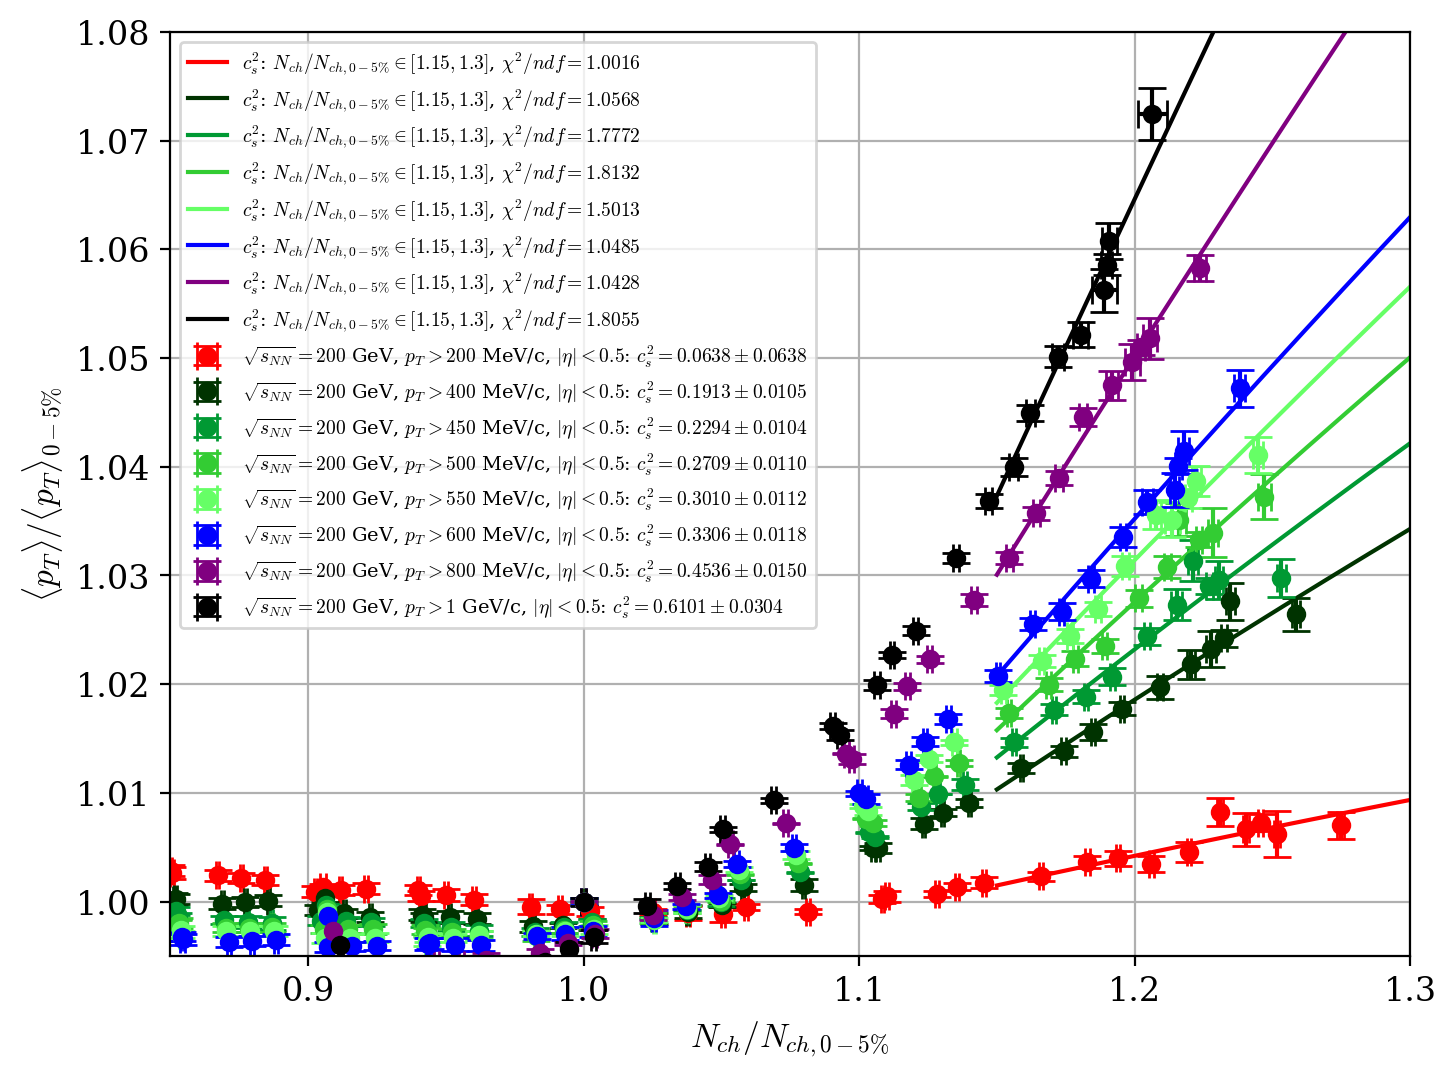

In [ ]:
#200 GeV graph (All cuts)
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

# plt.errorbar(MultiplicityCharged_05_STARTPC2_1.ravel(),
#              MultiplicityCharged_MeanpT_05_STARTPC2_1.ravel(),
#              xerr=MultiplicityCharged_05_Symerr_STARTPC2_1.ravel(),
#              yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_1.ravel(),
#              fmt="o",capsize=5,color="purple",ecolor="purple",
#              label=f"$\sqrt{{s_{{NN}}}}=7.7$ GeV: $c_s^2={cs2_1_STARTPC2:.4f}\pm{cs2_1_err_STARTPC2:.4f}$")
# plt.plot(xfit1,
#          yfit1_STARTPC2,
#          color="purple",
#          label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_STARTPC2_1},{upperbound_STARTPC2_1}]$," 
#          f" $\chi^2/ndf={chi2_ndf_1_STARTPC2:.4f}$")
# plt.errorbar(MultiplicityCharged_05_STARTPC2_2.ravel(),
#              MultiplicityCharged_MeanpT_05_STARTPC2_2.ravel(),
#              xerr=MultiplicityCharged_05_Symerr_STARTPC2_2.ravel(),
#              yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_2.ravel(),
#              fmt="o",capsize=5,color="red",ecolor="red",
#              label=f"$\sqrt{{s_{{NN}}}}=19.6$ GeV: $c_s^2={cs2_2_STARTPC2:.4f}\pm{cs2_2_err_STARTPC2:.4f}$")
# plt.plot(xfit2,
#          yfit2_STARTPC2,
#          color="red",
#          label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_STARTPC2_2},{upperbound_STARTPC2_2}]$," 
#          f" $\chi^2/ndf={chi2_ndf_2_STARTPC2:.4f}$")
# plt.errorbar(MultiplicityCharged_05_STARTPC2_3.ravel(),
#              MultiplicityCharged_MeanpT_05_STARTPC2_3.ravel(),
#              xerr=MultiplicityCharged_05_Symerr_STARTPC2_3.ravel(),
#              yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_3.ravel(),
#              fmt="o",capsize=5,color="blue",ecolor="blue",
#              label=f"$\sqrt{{s_{{NN}}}}=27$ GeV: $c_s^2={cs2_3_STARTPC2:.4f}\pm{cs2_3_err_STARTPC2:.4f}$")
# plt.plot(xfit3,
#          yfit3_STARTPC2,
#          color="blue",
#          label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_STARTPC2_3},{upperbound_STARTPC2_3}]$," 
#          f" $\chi^2/ndf={chi2_ndf_3_STARTPC2:.4f}$")
# plt.errorbar(MultiplicityCharged_05_STARTPC2_4.ravel(),
#              MultiplicityCharged_MeanpT_05_STARTPC2_4.ravel(),
#              xerr=MultiplicityCharged_05_Symerr_STARTPC2_4.ravel(),
#              yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_4.ravel(),
#              fmt="o",capsize=5,color="green",ecolor="green",
#              label=f"$\sqrt{{s_{{NN}}}}=54.4$ GeV: $c_s^2={cs2_4_STARTPC2:.4f}\pm{cs2_4_err_STARTPC2:.4f}$")
# plt.plot(xfit4,
#          yfit4_STARTPC2,
#          color="green",
#          label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_STARTPC2_4},{upperbound_STARTPC2_4}]$," 
#          f" $\chi^2/ndf={chi2_ndf_4_STARTPC2:.4f}$")
plt.errorbar(MultiplicityCharged_05_5.ravel(),
             MultiplicityCharged_MeanpT_05_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red",ecolor="red",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>200$ MeV/c, $|\eta|<0.5$: $c_s^2={cs2_5:.4f}\pm{cs2_5:.4f}$")
plt.plot(xfit5,
         yfit5,
         color="red",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_5},{upperbound_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC2_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC2_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC2_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>400$ MeV/c, $|\eta|<0.5$: $c_s^2={cs2_5_STARTPC2:.4f}\pm{cs2_5_err_STARTPC2:.4f}$")
plt.plot(xfit5,
         yfit5_STARTPC2,
         color="#003300",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_STARTPC2_5},{upperbound_STARTPC2_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5_STARTPC2:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC450MeV_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC450MeV_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC450MeV_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o", capsize=5, color="#009933",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>450$ MeV/c, $|\eta|<0.5$: $c_s^2={cs2_5_450MeV:.4f}\pm{cs2_5_err_450MeV:.4f}$")
plt.plot(xfit5_450MeV,
         yfit5_450MeV,
         color="#009933",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_450MeV_5},{upperbound_450MeV_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5_450MeV:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC500MeV_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC500MeV_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC500MeV_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o", capsize=5, color="#33cc33",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>500$ MeV/c, $|\eta|<0.5$: $c_s^2={cs2_5_500MeV:.4f}\pm{cs2_5_err_500MeV:.4f}$")
plt.plot(xfit5_500MeV,
         yfit5_500MeV,
         color="#33cc33",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_500MeV_5},{upperbound_500MeV_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5_500MeV:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC550MeV_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC550MeV_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC550MeV_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o", capsize=5, color="#66ff66",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>550$ MeV/c, $|\eta|<0.5$: $c_s^2={cs2_5_550MeV:.4f}\pm{cs2_5_err_550MeV:.4f}$")
plt.plot(xfit5_550MeV,
         yfit5_550MeV,
         color="#66ff66",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_550MeV_5},{upperbound_550MeV_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5_550MeV:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC600MeV_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC600MeV_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC600MeV_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o", capsize=5, color="blue",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>600$ MeV/c, $|\eta|<0.5$: $c_s^2={cs2_5_600MeV:.4f}\pm{cs2_5_err_600MeV:.4f}$")
plt.plot(xfit5_600MeV,
         yfit5_600MeV,
         color="blue",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_600MeV_5},{upperbound_600MeV_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5_600MeV:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC800MeV_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC800MeV_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC800MeV_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o", capsize=5, color="purple",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>800$ MeV/c, $|\eta|<0.5$: $c_s^2={cs2_5_800MeV:.4f}\pm{cs2_5_err_800MeV:.4f}$")
plt.plot(xfit5_800MeV,
         yfit5_800MeV,
         color="purple",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_800MeV_5},{upperbound_800MeV_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5_800MeV:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC1000MeV_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC1000MeV_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC1000MeV_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o", capsize=5, color="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>1$ GeV/c, $|\eta|<0.5$: $c_s^2={cs2_5_1000MeV:.4f}\pm{cs2_5_err_1000MeV:.4f}$")
plt.plot(xfit5_1000MeV,
         yfit5_1000MeV,
         color="black",
         label=rf"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{lowerbound_1000MeV_5},{upperbound_1000MeV_5}]$," 
         f" $\chi^2/ndf={chi2_ndf_5_1000MeV:.4f}$")

plt.xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
plt.grid()
plt.legend(prop={'size': '7'},loc="upper left")
plt.xlim([0.85,1.3])
plt.ylim([0.995,1.08])
#plt.ylim([0.9975,1.0125])
plt.show()

In [101]:
#dlnNch and dlnpT
print(len(xnorm5_fitrange))

# data = np.array([5, 8, 1, 3, 12, 7])

# n = 3  # 3rd highest
# # argsort gives indices of sorted array
# sorted_indices = np.argsort(data)  # ascending
# nth_highest_index = sorted_indices[-n]  # -1 = highest, -2 = 2nd, etc.
# nth_highest_value = data[nth_highest_index]

# print("Index:", nth_highest_index, "Value:", nth_highest_value)

sorted_nch_200MeV = np.sort(MultiplicityCharged_5)
print(max(sorted_nch_200MeV))
for i in range(len(MultiplicityCharged_5)):
    if MultiplicityCharged_5[i] == max(sorted_nch_200MeV):
        print(i)
        max_meanpt_200MeV = MultiplicityCharged_MeanpT_5[i]
        max_meanpt_err_200MeV = MultiplicityCharged_MeanpT_Symerr_5[i]
        max_nch_200MeV = MultiplicityCharged_5[i]
        max_nch_err_200MeV = MultiplicityCharged_Symerr_5[i]
    if MultiplicityCharged_5[i] == sorted_nch_200MeV[-len(xnorm5_fitrange)]:
        print(i)
        least_central_in_fit_meanpt_200MeV = MultiplicityCharged_MeanpT_5[i]
        least_central_in_fit_meanpt_err_200MeV = MultiplicityCharged_MeanpT_Symerr_5[i]
        least_central_in_fit_nch_200MeV = MultiplicityCharged_5[i]
        least_central_in_fit_nch_err_200MeV = MultiplicityCharged_Symerr_5[i]

print(max_meanpt_200MeV)
print(least_central_in_fit_meanpt_200MeV)

sorted_nch_400MeV = np.sort(MultiplicityCharged_STARTPC2_5)
print(max(sorted_nch_400MeV))
for i in range(len(MultiplicityCharged_STARTPC2_5)):
    if MultiplicityCharged_STARTPC2_5[i] == max(sorted_nch_400MeV):
        print(i)
        max_meanpt_400MeV = MultiplicityCharged_MeanpT_STARTPC2_5[i]
        max_meanpt_err_400MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC2_5[i]
        max_nch_400MeV = MultiplicityCharged_STARTPC2_5[i]
        max_nch_err_400MeV = MultiplicityCharged_Symerr_STARTPC2_5[i]
    if MultiplicityCharged_STARTPC2_5[i] == sorted_nch_400MeV[-len(xnorm5_fitrange_STARTPC2)]:
        print(i)
        least_central_in_fit_meanpt_400MeV = MultiplicityCharged_MeanpT_STARTPC2_5[i]
        least_central_in_fit_meanpt_err_400MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC2_5[i]
        least_central_in_fit_nch_400MeV = MultiplicityCharged_STARTPC2_5[i]
        least_central_in_fit_nch_err_400MeV = MultiplicityCharged_Symerr_STARTPC2_5[i]

sorted_nch_450MeV = np.sort(MultiplicityCharged_STARTPC450MeV_5)
print(max(sorted_nch_450MeV))
for i in range(len(MultiplicityCharged_STARTPC450MeV_5)):
    if MultiplicityCharged_STARTPC450MeV_5[i] == max(sorted_nch_450MeV):
        print(i)
        max_nch_450MeV = MultiplicityCharged_STARTPC450MeV_5[i]
        max_nch_err_450MeV = MultiplicityCharged_Symerr_STARTPC450MeV_5[i]
        max_meanpt_450MeV = MultiplicityCharged_MeanpT_STARTPC450MeV_5[i]
        max_meanpt_err_450MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC450MeV_5[i]
    if MultiplicityCharged_STARTPC450MeV_5[i] == sorted_nch_450MeV[-len(xnorm5_fitrange_450MeV)]:
        print(i)
        least_central_in_fit_meanpt_450MeV = MultiplicityCharged_MeanpT_STARTPC450MeV_5[i]
        least_central_in_fit_meanpt_err_450MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC450MeV_5[i]
        least_central_in_fit_nch_450MeV = MultiplicityCharged_STARTPC450MeV_5[i]
        least_central_in_fit_nch_err_450MeV = MultiplicityCharged_Symerr_STARTPC450MeV_5[i]

sorted_nch_500MeV = np.sort(MultiplicityCharged_STARTPC500MeV_5)
print(max(sorted_nch_500MeV))
for i in range(len(MultiplicityCharged_STARTPC500MeV_5)):
    if MultiplicityCharged_STARTPC500MeV_5[i] == max(sorted_nch_500MeV):
        print(i)
        max_nch_500MeV = MultiplicityCharged_STARTPC500MeV_5[i]
        max_nch_err_500MeV = MultiplicityCharged_Symerr_STARTPC500MeV_5[i]
        max_meanpt_500MeV = MultiplicityCharged_MeanpT_STARTPC500MeV_5[i]
        max_meanpt_err_500MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC500MeV_5[i]
    if MultiplicityCharged_STARTPC500MeV_5[i] == sorted_nch_500MeV[-len(xnorm5_fitrange_500MeV)]:
        print(i)
        least_central_in_fit_meanpt_500MeV = MultiplicityCharged_MeanpT_STARTPC500MeV_5[i]
        least_central_in_fit_meanpt_err_500MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC500MeV_5[i]
        least_central_in_fit_nch_500MeV = MultiplicityCharged_STARTPC500MeV_5[i]
        least_central_in_fit_nch_err_500MeV = MultiplicityCharged_Symerr_STARTPC500MeV_5[i]

sorted_nch_550MeV = np.sort(MultiplicityCharged_STARTPC550MeV_5)
print(max(sorted_nch_550MeV))
for i in range(len(MultiplicityCharged_STARTPC550MeV_5)):
    if MultiplicityCharged_STARTPC550MeV_5[i] == max(sorted_nch_550MeV):
        print(i)
        max_nch_550MeV = MultiplicityCharged_STARTPC550MeV_5[i]
        max_nch_err_550MeV = MultiplicityCharged_Symerr_STARTPC550MeV_5[i]
        max_meanpt_550MeV = MultiplicityCharged_MeanpT_STARTPC550MeV_5[i]
        max_meanpt_err_550MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC550MeV_5[i]
    if MultiplicityCharged_STARTPC550MeV_5[i] == sorted_nch_550MeV[-len(xnorm5_fitrange_550MeV)]:
        print(i)
        least_central_in_fit_meanpt_550MeV = MultiplicityCharged_MeanpT_STARTPC550MeV_5[i]
        least_central_in_fit_meanpt_err_550MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC550MeV_5[i]
        least_central_in_fit_nch_550MeV = MultiplicityCharged_STARTPC550MeV_5[i]
        least_central_in_fit_nch_err_550MeV = MultiplicityCharged_Symerr_STARTPC550MeV_5[i]

sorted_nch_600MeV = np.sort(MultiplicityCharged_STARTPC600MeV_5)
print(max(sorted_nch_400MeV))
for i in range(len(MultiplicityCharged_STARTPC600MeV_5)):
    if MultiplicityCharged_STARTPC600MeV_5[i] == max(sorted_nch_600MeV):
        print(i)
        max_nch_600MeV = MultiplicityCharged_STARTPC600MeV_5[i]
        max_nch_err_600MeV = MultiplicityCharged_Symerr_STARTPC600MeV_5[i]
        max_meanpt_600MeV = MultiplicityCharged_MeanpT_STARTPC600MeV_5[i]
        max_meanpt_err_600MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC600MeV_5[i]
    if MultiplicityCharged_STARTPC600MeV_5[i] == sorted_nch_600MeV[-len(xnorm5_fitrange_600MeV)]:
        print(i)
        least_central_in_fit_meanpt_600MeV = MultiplicityCharged_MeanpT_STARTPC600MeV_5[i]
        least_central_in_fit_meanpt_err_600MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC600MeV_5[i]
        least_central_in_fit_nch_600MeV = MultiplicityCharged_STARTPC600MeV_5[i]
        least_central_in_fit_nch_err_600MeV = MultiplicityCharged_Symerr_STARTPC600MeV_5[i]

sorted_nch_800MeV = np.sort(MultiplicityCharged_STARTPC800MeV_5)
print(max(sorted_nch_800MeV))
for i in range(len(MultiplicityCharged_STARTPC800MeV_5)):
    if MultiplicityCharged_STARTPC800MeV_5[i] == max(sorted_nch_800MeV):
        print(i)
        max_nch_800MeV = MultiplicityCharged_STARTPC800MeV_5[i]
        max_nch_err_800MeV = MultiplicityCharged_Symerr_STARTPC800MeV_5[i]
        max_meanpt_800MeV = MultiplicityCharged_MeanpT_STARTPC800MeV_5[i]
        max_meanpt_err_800MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC800MeV_5[i]
    if MultiplicityCharged_STARTPC800MeV_5[i] == sorted_nch_800MeV[-len(xnorm5_fitrange_800MeV)]:
        print(i)
        least_central_in_fit_meanpt_800MeV = MultiplicityCharged_MeanpT_STARTPC800MeV_5[i]
        least_central_in_fit_meanpt_err_800MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC800MeV_5[i]
        least_central_in_fit_nch_800MeV = MultiplicityCharged_STARTPC800MeV_5[i]
        least_central_in_fit_nch_err_800MeV = MultiplicityCharged_Symerr_STARTPC800MeV_5[i]

sorted_nch_1000MeV = np.sort(MultiplicityCharged_STARTPC1000MeV_5)
print(max(sorted_nch_1000MeV))
for i in range(len(MultiplicityCharged_STARTPC1000MeV_5)):
    if MultiplicityCharged_STARTPC1000MeV_5[i] == max(sorted_nch_1000MeV):
        print(i)
        max_meanpt_1000MeV = MultiplicityCharged_MeanpT_STARTPC1000MeV_5[i]
        max_meanpt_err_1000MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC1000MeV_5[i]
        max_nch_1000MeV = MultiplicityCharged_STARTPC1000MeV_5[i]
        max_nch_err_1000MeV = MultiplicityCharged_Symerr_STARTPC1000MeV_5[i]
    if MultiplicityCharged_STARTPC1000MeV_5[i] == sorted_nch_1000MeV[-len(xnorm5_fitrange_1000MeV)]:
        print(i)
        least_central_in_fit_meanpt_1000MeV = MultiplicityCharged_MeanpT_STARTPC1000MeV_5[i]
        least_central_in_fit_meanpt_err_1000MeV = MultiplicityCharged_MeanpT_Symerr_STARTPC1000MeV_5[i]
        least_central_in_fit_nch_1000MeV = MultiplicityCharged_STARTPC1000MeV_5[i]
        least_central_in_fit_nch_err_1000MeV = MultiplicityCharged_Symerr_STARTPC1000MeV_5[i]

print(max_meanpt_200MeV)
print(least_central_in_fit_meanpt_200MeV)
print(max_meanpt_400MeV)
print(least_central_in_fit_meanpt_400MeV)
print(max_meanpt_600MeV)
print(least_central_in_fit_meanpt_600MeV)
print(max_meanpt_800MeV)
print(least_central_in_fit_meanpt_800MeV)
print(max_meanpt_1000MeV)
print(least_central_in_fit_meanpt_1000MeV)

dlnpt_200MeV = np.log(max_meanpt_200MeV/least_central_in_fit_meanpt_200MeV)
dlnpt_200MeV_err = np.sqrt((max_meanpt_err_200MeV/max_meanpt_200MeV)**2+(least_central_in_fit_meanpt_err_200MeV/least_central_in_fit_meanpt_200MeV)**2)
dlnpt_400MeV = np.log(max_meanpt_400MeV/least_central_in_fit_meanpt_400MeV)
dlnpt_400MeV_err = np.sqrt((max_meanpt_err_400MeV/max_meanpt_400MeV)**2+(least_central_in_fit_meanpt_err_400MeV/least_central_in_fit_meanpt_400MeV)**2)
dlnpt_450MeV = np.log(max_meanpt_450MeV/least_central_in_fit_meanpt_450MeV)
dlnpt_450MeV_err = np.sqrt((max_meanpt_err_450MeV/max_meanpt_450MeV)**2+(least_central_in_fit_meanpt_err_450MeV/least_central_in_fit_meanpt_450MeV)**2)
dlnpt_500MeV = np.log(max_meanpt_500MeV/least_central_in_fit_meanpt_500MeV)
dlnpt_500MeV_err = np.sqrt((max_meanpt_err_500MeV/max_meanpt_500MeV)**2+(least_central_in_fit_meanpt_err_500MeV/least_central_in_fit_meanpt_500MeV)**2)
dlnpt_550MeV = np.log(max_meanpt_550MeV/least_central_in_fit_meanpt_550MeV)
dlnpt_550MeV_err = np.sqrt((max_meanpt_err_550MeV/max_meanpt_550MeV)**2+(least_central_in_fit_meanpt_err_550MeV/least_central_in_fit_meanpt_550MeV)**2)
dlnpt_600MeV = np.log(max_meanpt_600MeV/least_central_in_fit_meanpt_600MeV)
dlnpt_600MeV_err = np.sqrt((max_meanpt_err_600MeV/max_meanpt_600MeV)**2+(least_central_in_fit_meanpt_err_600MeV/least_central_in_fit_meanpt_600MeV)**2)
dlnpt_800MeV = np.log(max_meanpt_800MeV/least_central_in_fit_meanpt_800MeV)
dlnpt_800MeV_err = np.sqrt((max_meanpt_err_800MeV/max_meanpt_800MeV)**2+(least_central_in_fit_meanpt_err_800MeV/least_central_in_fit_meanpt_800MeV)**2)
dlnpt_1000MeV = np.log(max_meanpt_1000MeV/least_central_in_fit_meanpt_1000MeV)
dlnpt_1000MeV_err = np.sqrt((max_meanpt_err_1000MeV/max_meanpt_1000MeV)**2+(least_central_in_fit_meanpt_err_1000MeV/least_central_in_fit_meanpt_1000MeV)**2)

dlnNch_200MeV = np.log(max(sorted_nch_200MeV)/sorted_nch_200MeV[-len(xnorm5_fitrange)])
dlnNch_200MeV_err = np.sqrt((max_nch_1000MeV/max_nch_err_200MeV)**-2+(least_central_in_fit_nch_err_200MeV/least_central_in_fit_nch_200MeV)**2)
dlnNch_400MeV = np.log(max(sorted_nch_400MeV)/sorted_nch_400MeV[-len(xnorm5_fitrange_STARTPC2)])
dlnNch_400MeV_err = np.sqrt((max_nch_400MeV/max_nch_err_400MeV)**-2+(least_central_in_fit_nch_err_400MeV/least_central_in_fit_nch_400MeV)**2)
dlnNch_450MeV = np.log(max(sorted_nch_450MeV)/sorted_nch_450MeV[-len(xnorm5_fitrange_450MeV)])
dlnNch_450MeV_err = np.sqrt((max_nch_450MeV/max_nch_err_450MeV)**-2+(least_central_in_fit_nch_err_450MeV/least_central_in_fit_nch_450MeV)**2)
dlnNch_500MeV = np.log(max(sorted_nch_500MeV)/sorted_nch_500MeV[-len(xnorm5_fitrange_500MeV)])
dlnNch_500MeV_err = np.sqrt((max_nch_500MeV/max_nch_err_500MeV)**-2+(least_central_in_fit_nch_err_500MeV/least_central_in_fit_nch_500MeV)**2)
dlnNch_550MeV = np.log(max(sorted_nch_550MeV)/sorted_nch_550MeV[-len(xnorm5_fitrange_550MeV)])
dlnNch_550MeV_err = np.sqrt((max_nch_550MeV/max_nch_err_550MeV)**-2+(least_central_in_fit_nch_err_550MeV/least_central_in_fit_nch_550MeV)**2)
dlnNch_600MeV = np.log(max(sorted_nch_600MeV)/sorted_nch_600MeV[-len(xnorm5_fitrange_600MeV)])
dlnNch_600MeV_err = np.sqrt((max_nch_600MeV/max_nch_err_600MeV)**-2+(least_central_in_fit_nch_err_600MeV/least_central_in_fit_nch_600MeV)**2)
dlnNch_800MeV = np.log(max(sorted_nch_800MeV)/sorted_nch_800MeV[-len(xnorm5_fitrange_800MeV)])
dlnNch_800MeV_err = np.sqrt((max_nch_800MeV/max_nch_err_800MeV)**-2+(least_central_in_fit_nch_err_800MeV/least_central_in_fit_nch_800MeV)**2)
dlnNch_1000MeV = np.log(max(sorted_nch_1000MeV)/sorted_nch_1000MeV[-len(xnorm5_fitrange_1000MeV)])
dlnNch_1000MeV_err = np.sqrt((max_nch_1000MeV/max_nch_err_1000MeV)**-2+(least_central_in_fit_nch_err_1000MeV/least_central_in_fit_nch_1000MeV)**2)



10
[531.21708239]
143
165
[0.82221109]
[0.81810434]
[523.57346252]
143
165
[521.09599596]
143
165
[518.18878553]
143
165
[516.80075322]
143
165
[523.57346252]
143
165
[505.24895978]
143
166
[494.97013501]
143
167
[0.82221109]
[0.81810434]
[0.84017298]
[0.81861244]
[0.85979664]
[0.81814325]
[0.87172961]
[0.81847043]
[0.88625142]
[0.81885407]


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/2785710403.py:9: SyntaxWarning: invalid escape sequence '\s'
  label=f"$\sqrt{{s_{{NN}}}}=200$ GeV\nAnalysis: $p_T>0$ GeV/c, $|\eta|<0.5$.\nCentrality Estimator: $0.4<p_T<10$ GeV/c, $|\eta|<0.5$.")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/2785710403.py:9: SyntaxWarning: invalid escape sequence '\e'
  label=f"$\sqrt{{s_{{NN}}}}=200$ GeV\nAnalysis: $p_T>0$ GeV/c, $|\eta|<0.5$.\nCentrality Estimator: $0.4<p_T<10$ GeV/c, $|\eta|<0.5$.")


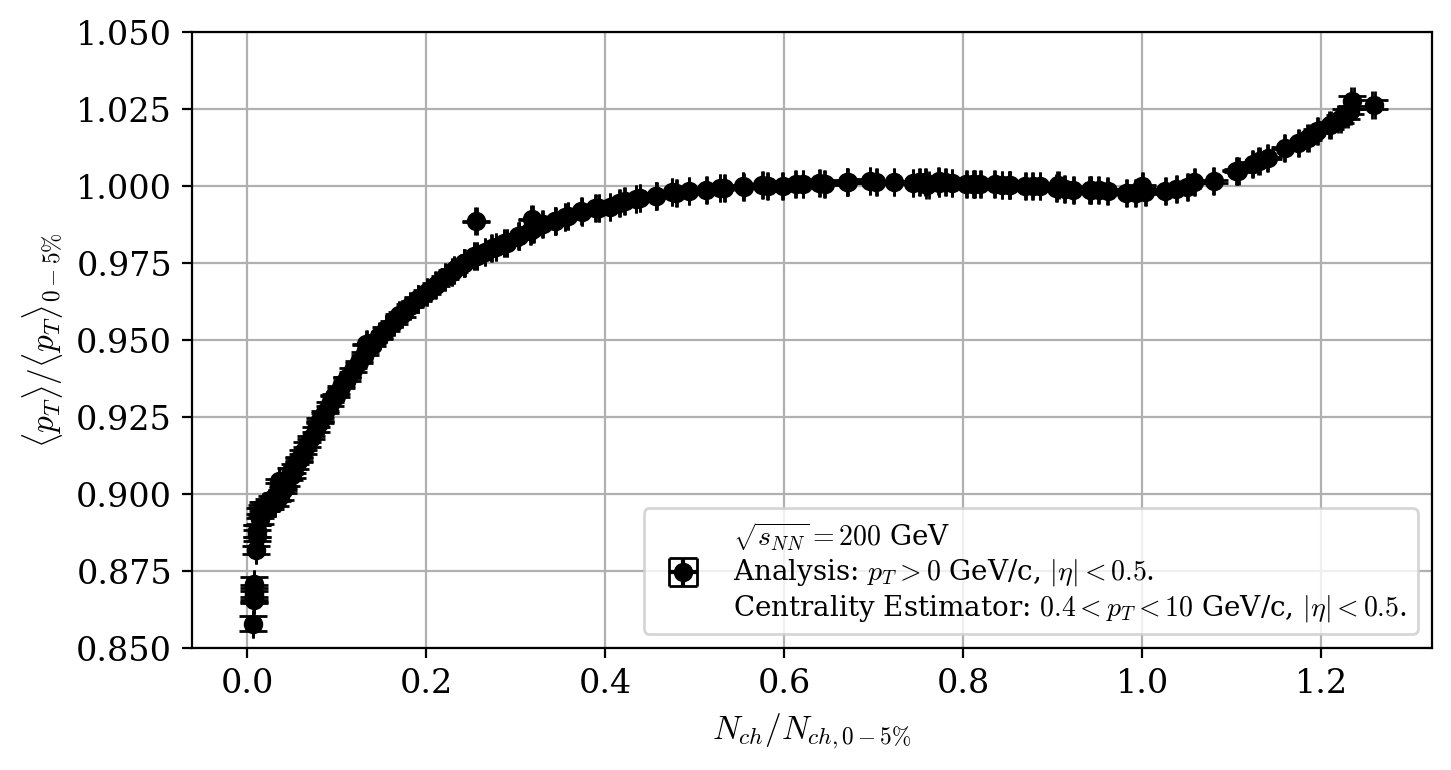

In [102]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(MultiplicityCharged_05_STARTPC2_5.ravel(),
             MultiplicityCharged_MeanpT_05_STARTPC2_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC2_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="black",ecolor="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV\nAnalysis: $p_T>0$ GeV/c, $|\eta|<0.5$.\nCentrality Estimator: $0.4<p_T<10$ GeV/c, $|\eta|<0.5$.")
plt.ylim([0.85,1.05])
plt.xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
plt.grid()
plt.legend(prop={'size': '10'}, loc="lower right")

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/2686372536.py:11: SyntaxWarning: invalid escape sequence '\p'
  label=f"7.7 GeV, without hadronizer: $c_s^2={cs2_1_STARTPC2:.4f}\pm{cs2_1_err_STARTPC2:.4f}$")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/2686372536.py:17: SyntaxWarning: invalid escape sequence '\p'
  label=f"19.6 GeV, without hadronizer: $c_s^2={cs2_2_STARTPC2:.4f}\pm{cs2_2_err_STARTPC2:.4f}$")
/var/folders/mb/30yyqfg516jdbq01t3whp1r4000

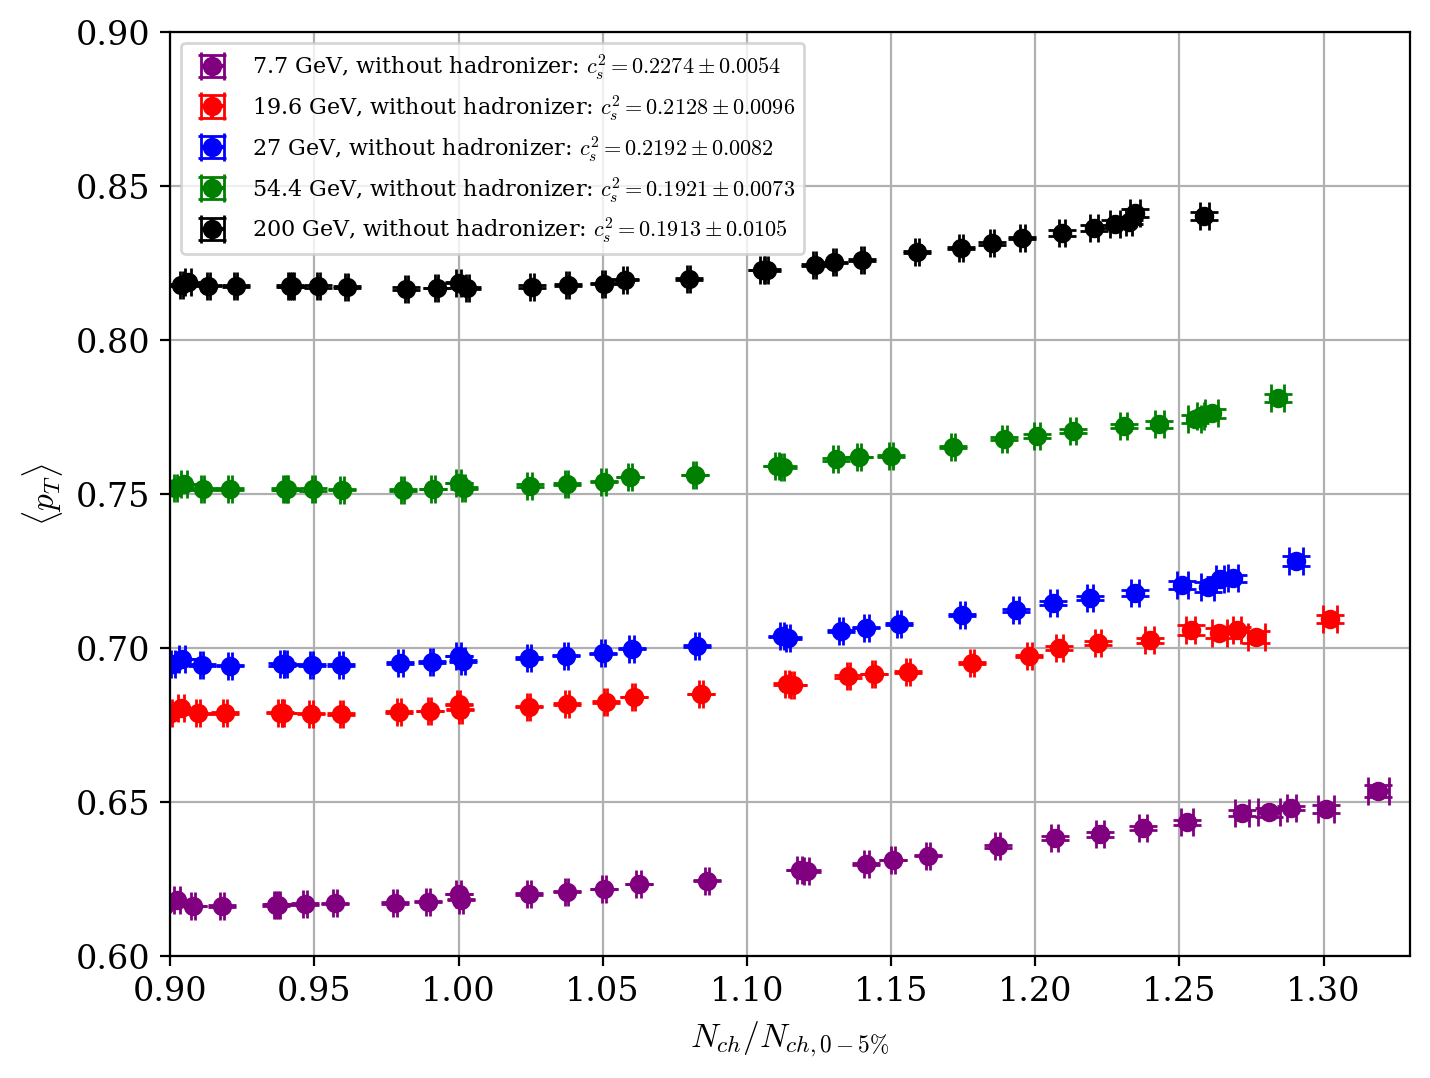

In [103]:
#STARTPC2 graph (400 MeV cut) - unnormalized y-axis
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityCharged_05_STARTPC2_1.ravel(),
             MultiplicityCharged_MeanpT_STARTPC2_1.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC2_1.ravel(),
             yerr=MultiplicityCharged_MeanpT_Symerr_STARTPC2_1.ravel(),
             fmt="o",capsize=5,color="purple",ecolor="purple",
             label=f"7.7 GeV, without hadronizer: $c_s^2={cs2_1_STARTPC2:.4f}\pm{cs2_1_err_STARTPC2:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC2_2.ravel(),
             MultiplicityCharged_MeanpT_STARTPC2_2.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC2_2.ravel(),
             yerr=MultiplicityCharged_MeanpT_Symerr_STARTPC2_2.ravel(),
             fmt="o",capsize=5,color="red",ecolor="red",
             label=f"19.6 GeV, without hadronizer: $c_s^2={cs2_2_STARTPC2:.4f}\pm{cs2_2_err_STARTPC2:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC2_3.ravel(),
             MultiplicityCharged_MeanpT_STARTPC2_3.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC2_3.ravel(),
             yerr=MultiplicityCharged_MeanpT_Symerr_STARTPC2_3.ravel(),
             fmt="o",capsize=5,color="blue",ecolor="blue",
             label=f"27 GeV, without hadronizer: $c_s^2={cs2_3_STARTPC2:.4f}\pm{cs2_3_err_STARTPC2:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC2_4.ravel(),
             MultiplicityCharged_MeanpT_STARTPC2_4.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC2_4.ravel(),
             yerr=MultiplicityCharged_MeanpT_Symerr_STARTPC2_4.ravel(),
             fmt="o",capsize=5,color="green",ecolor="green",
             label=f"54.4 GeV, without hadronizer: $c_s^2={cs2_4_STARTPC2:.4f}\pm{cs2_4_err_STARTPC2:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC2_5.ravel(),
             MultiplicityCharged_MeanpT_STARTPC2_5.ravel(),
             xerr=MultiplicityCharged_05_Symerr_STARTPC2_5.ravel(),
             yerr=MultiplicityCharged_MeanpT_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="black",ecolor="black",
             label=f"200 GeV, without hadronizer: $c_s^2={cs2_5_STARTPC2:.4f}\pm{cs2_5_err_STARTPC2:.4f}$")
plt.xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$")
plt.grid()
plt.legend(prop={'size': '8'})
plt.xlim([0.9,1.33])
plt.ylim([0.6,0.9])
# plt.ylim([0.99,1.04])
#plt.ylim([0.9975,1.0125])
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\p'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/1398833081.py:15: 

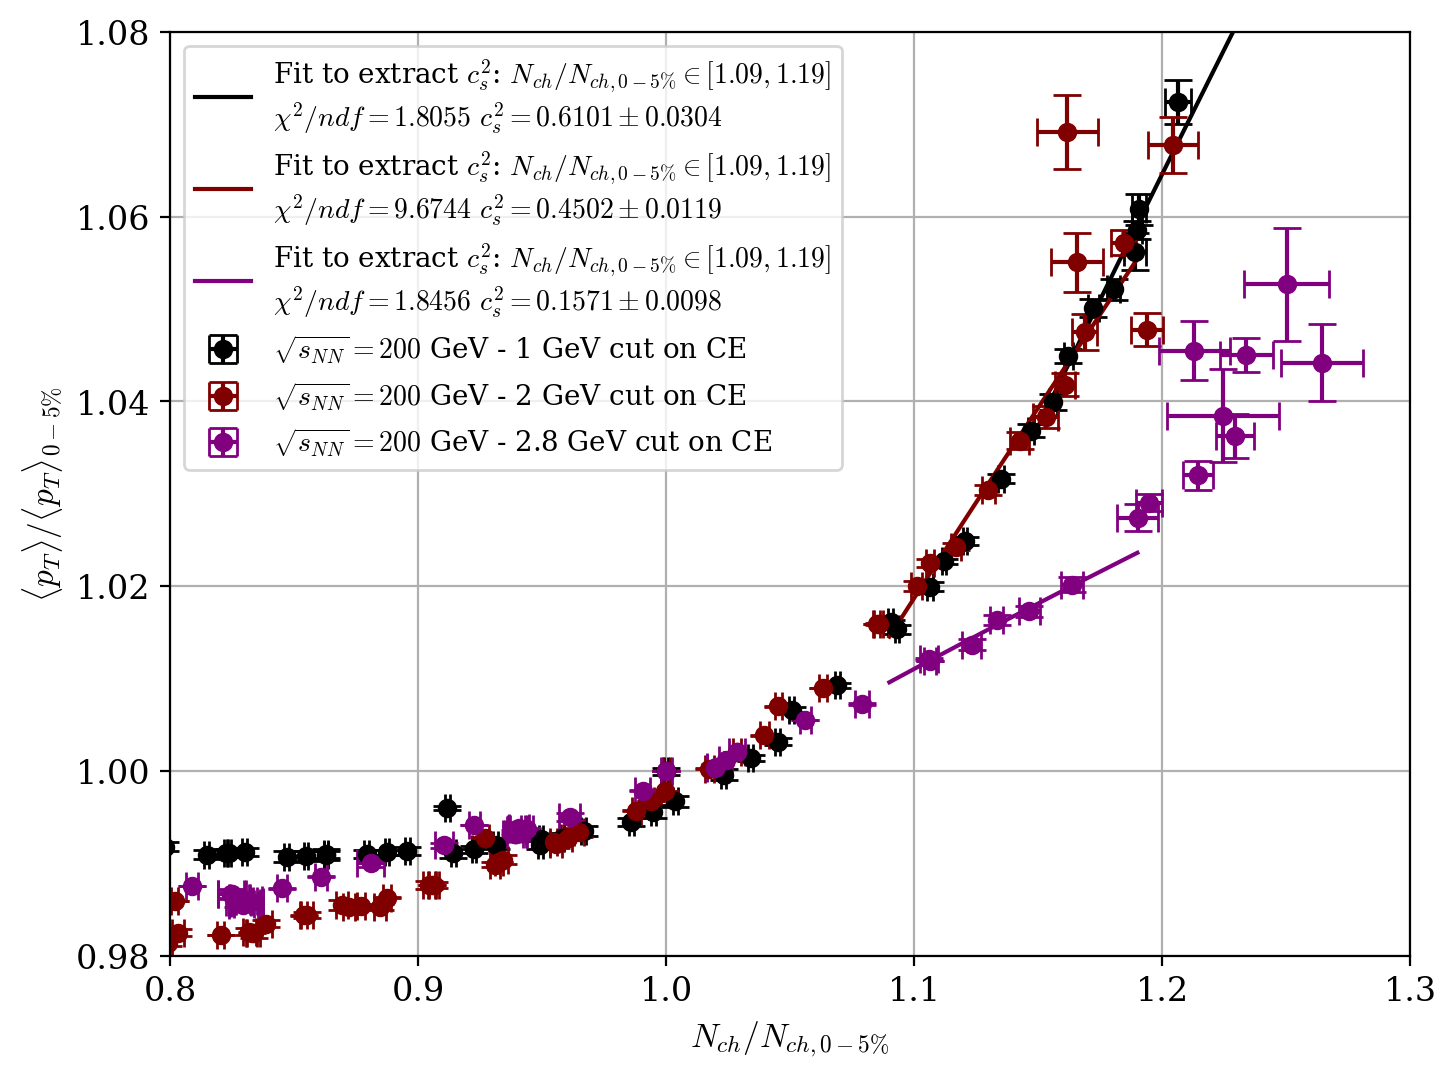

In [104]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
# plt.errorbar(MultiplicityCharged_05_STARTPC0_5.ravel(),MultiplicityCharged_MeanpT_05_STARTPC0_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC0_5.ravel(), xerr=MultiplicityCharged_05_Symerr_STARTPC0_5.ravel(),
#              fmt="o", capsize=5, color="green",
#              label="$\sqrt{s_{NN}}=200$ GeV - No cut on CE")
# plt.errorbar(MultiplicityCharged_05_5.ravel(),MultiplicityCharged_MeanpT_05_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_5.ravel(), xerr=MultiplicityCharged_05_Symerr_5.ravel(),
#              fmt="o", capsize=5, color="red",
#              label="$\sqrt{s_{NN}}=200$ GeV - 200 MeV cut on CE")
# plt.errorbar(MultiplicityCharged_05_STARTPC2_5.ravel(),MultiplicityCharged_MeanpT_05_STARTPC2_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_5.ravel(), xerr=MultiplicityCharged_05_Symerr_STARTPC2_5.ravel(),
#              fmt="o", capsize=5, color="blue",
#              label="$\sqrt{s_{NN}}=200$ GeV - 400 MeV cut on CE")
plt.errorbar(MultiplicityCharged_05_STARTPC1000MeV_5.ravel(),MultiplicityCharged_MeanpT_05_STARTPC1000MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC1000MeV_5.ravel(), xerr=MultiplicityCharged_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o", capsize=5, color="black",
             label="$\sqrt{s_{NN}}=200$ GeV - 1 GeV cut on CE")
plt.plot(xfit5_1000MeV,yfit5_1000MeV,color="black",label=r"Fit to extract $c_s^2$: $N_{ch}/N_{ch,0-5\%}\in[1.09,1.19]$" f"\n$\chi^2/ndf={chi2_ndf_5_1000MeV:.4f}$ $c_s^2={cs2_5_1000MeV:.4f}\pm{cs2_5_err_1000MeV:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC2000MeV_5.ravel(),MultiplicityCharged_MeanpT_05_STARTPC2000MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2000MeV_5.ravel(), xerr=MultiplicityCharged_05_Symerr_STARTPC2000MeV_5.ravel(),
             fmt="o", capsize=5, color="maroon",
             label="$\sqrt{s_{NN}}=200$ GeV - 2 GeV cut on CE")
plt.plot(xfit5_2000MeV,yfit5_2000MeV,color="maroon",label=r"Fit to extract $c_s^2$: $N_{ch}/N_{ch,0-5\%}\in[1.09,1.19]$" f"\n$\chi^2/ndf={chi2_ndf_5_2000MeV:.4f}$ $c_s^2={cs2_5_2000MeV:.4f}\pm{cs2_5_err_2000MeV:.4f}$")
plt.errorbar(MultiplicityCharged_05_STARTPC2800MeV_5.ravel(),MultiplicityCharged_MeanpT_05_STARTPC2800MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2800MeV_5.ravel(), xerr=MultiplicityCharged_05_Symerr_STARTPC2800MeV_5.ravel(),
             fmt="o", capsize=5, color="purple",
             label="$\sqrt{s_{NN}}=200$ GeV - 2.8 GeV cut on CE")
plt.plot(xfit5_2800MeV,yfit5_2800MeV,color="purple",label=r"Fit to extract $c_s^2$: $N_{ch}/N_{ch,0-5\%}\in[1.09,1.19]$" f"\n$\chi^2/ndf={chi2_ndf_5_2800MeV:.4f}$ $c_s^2={cs2_5_2800MeV:.4f}\pm{cs2_5_err_2800MeV:.4f}$")
plt.legend(prop={'size': '10'})
plt.xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
plt.xlim([0.8,1.3])
plt.ylim([0.98,1.08])
plt.grid()

(0.1, 0.3)

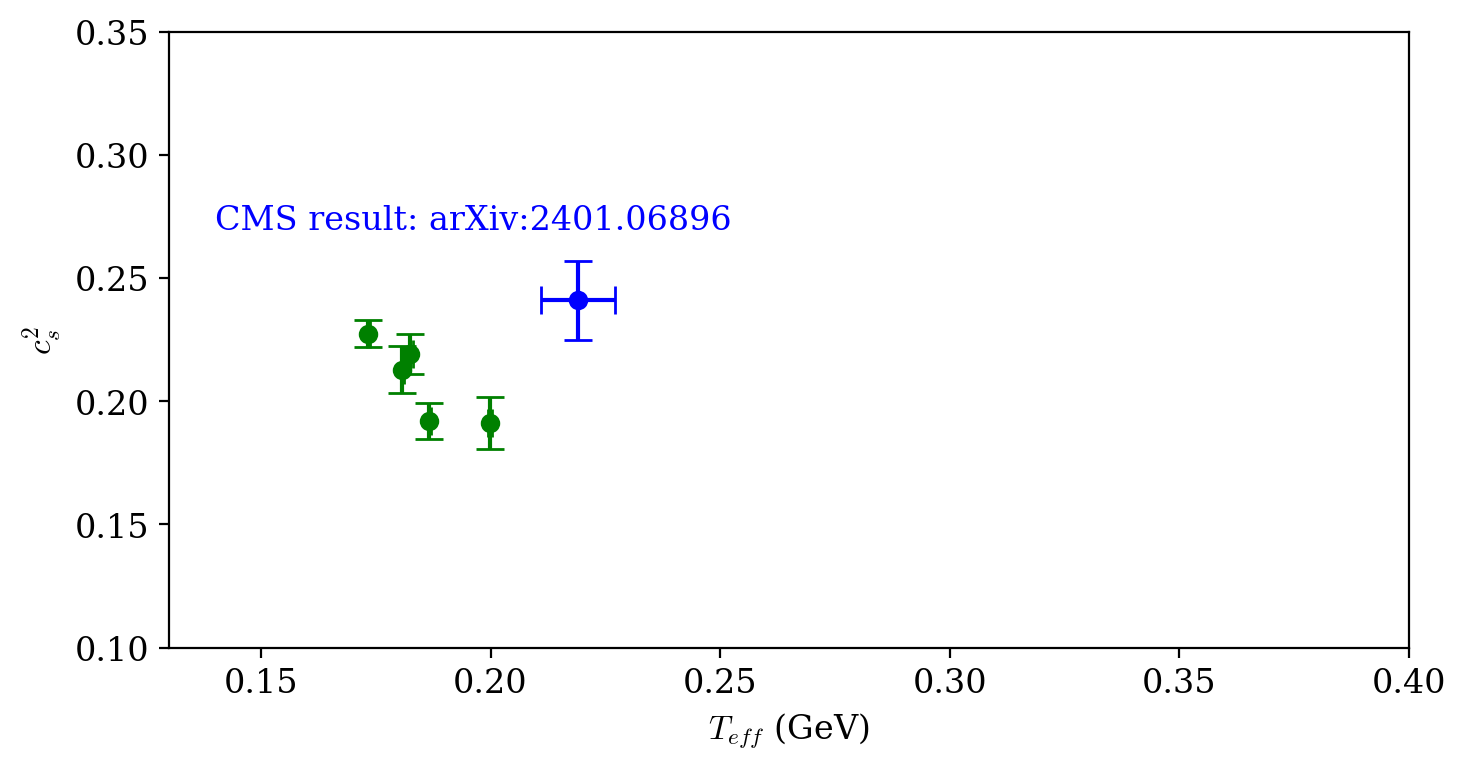

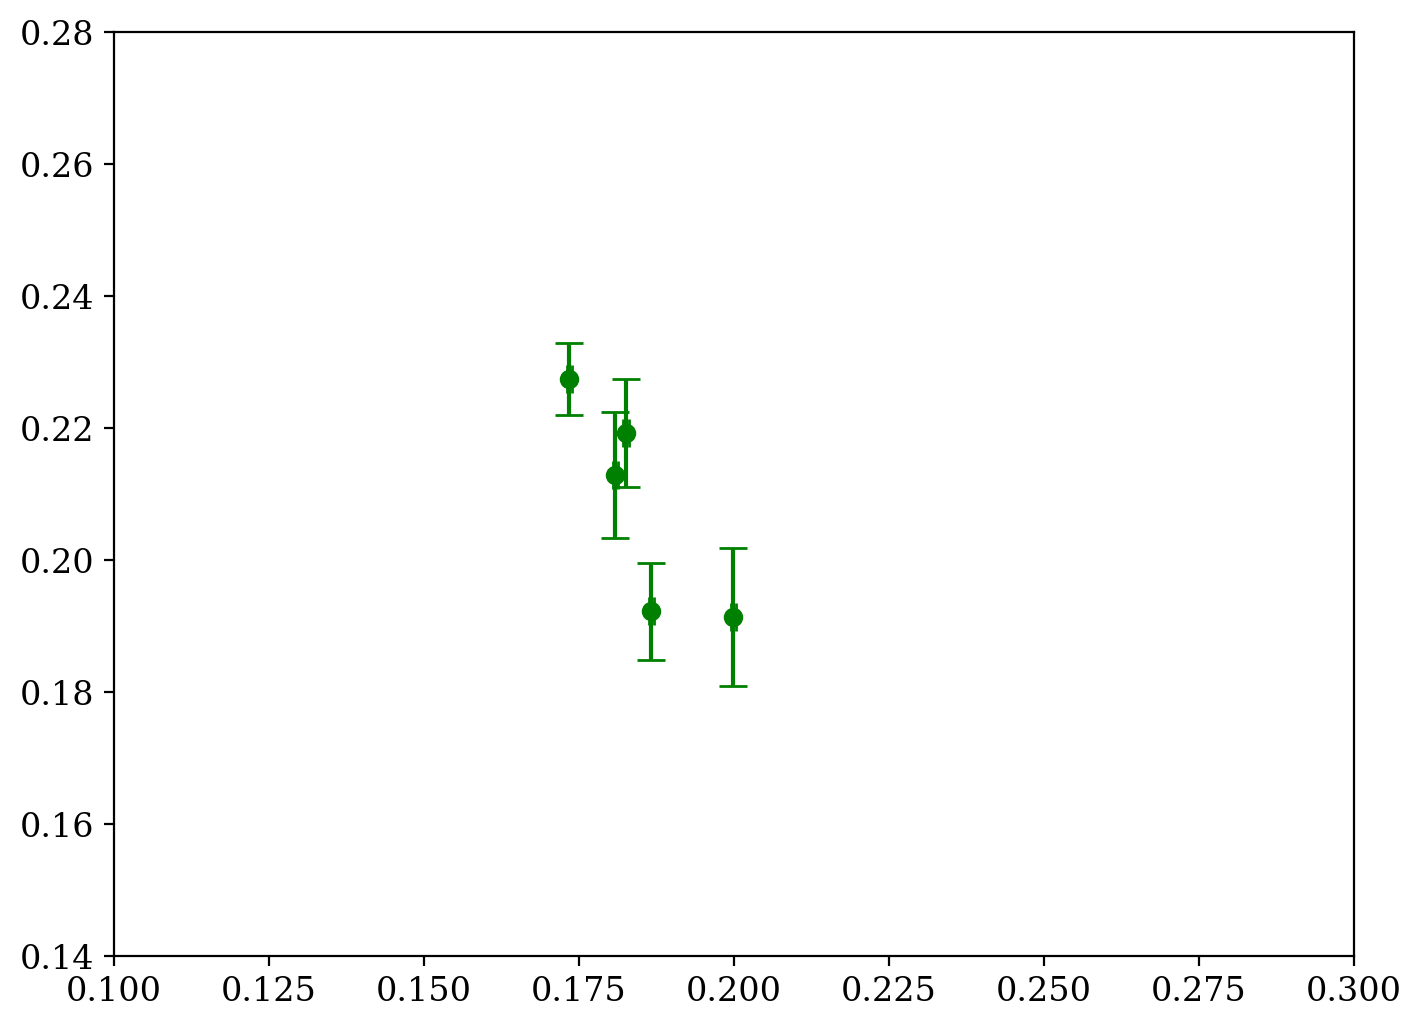

In [105]:
#Lattice curve graph
cs2_vals = np.array([cs2_1_STARTPC2,cs2_2_STARTPC2,cs2_3_STARTPC2,cs2_4_STARTPC2,cs2_5_STARTPC2])
cs2_err = np.array([cs2_1_err_STARTPC2,cs2_2_err_STARTPC2,cs2_3_err_STARTPC2,cs2_4_err_STARTPC2,cs2_5_err_STARTPC2])

Teff_vals = np.array([MultiplicityCharged_MeanpT_STARTPC2_Smash_1[16]/3,MultiplicityCharged_MeanpT_STARTPC2_Smash_2[16]/3,MultiplicityCharged_MeanpT_STARTPC2_Smash_3[16]/3,MultiplicityCharged_MeanpT_STARTPC2_Smash_4[16]/3,MultiplicityCharged_MeanpT_STARTPC2_Smash_5[16]/3])
Teff_Lerr = np.array([MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_1[16]/3,MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_2[16]/3,MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_3[16]/3,MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_4[16]/3,MultiplicityCharged_MeanpT_Lerr_STARTPC2_Smash_5[16]/3])
Teff_Uerr = np.array([MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_1[16]/3,MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_2[16]/3,MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_3[16]/3,MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_4[16]/3,MultiplicityCharged_MeanpT_Uerr_STARTPC2_Smash_5[16]/3])

cms_result_cs2_val = [0.241]
cms_result_cs2_err = [0.016]
cms_result_Teff_val = [0.219]
cms_result_Teff_err = [0.008]

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(Teff_vals.ravel(),cs2_vals.ravel(),yerr=cs2_err.ravel(),xerr=[Teff_Lerr.ravel(),Teff_Uerr.ravel()],fmt="o",capsize=5,color="green")
plt.errorbar(cms_result_Teff_val,cms_result_cs2_val,yerr=cms_result_cs2_err,xerr=cms_result_Teff_err,fmt="o",capsize=5,color="blue")
plt.text(0.14,0.27,"CMS result: arXiv:2401.06896",color="blue")
plt.ylim([0.1,0.35])
plt.xlim([0.130,0.400])
plt.xlabel(r"$T_{eff}$ (GeV)")
plt.ylabel(r"$c_s^2$")

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(Teff_vals.ravel(),cs2_vals.ravel(),yerr=cs2_err.ravel(),xerr=[Teff_Lerr.ravel(),Teff_Uerr.ravel()],fmt="o",capsize=5,color="green")
plt.ylim([0.14,0.28])
plt.xlim([0.1,0.3])

<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\%'
<>:29: SyntaxWarning: invalid escape sequence '\i'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\%'
<>:29: SyntaxWarning: invalid escape sequence '\i'
<>:30: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/3117207967.py:27: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(xfit_line,yfit_line,color="grey",linestyle="--",label=f"Linear fit curve: $\chi^2/ndf={chi2_ndf_line:.3f}$")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/3117207967.py:29: SyntaxWarning: invalid escape sequence '\%'
  fmt="o",capsize=5,color="black", label=f"Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[1.15,1.3]$")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/3117207967.py:29: SyntaxWarning: invalid escape sequence '\i'

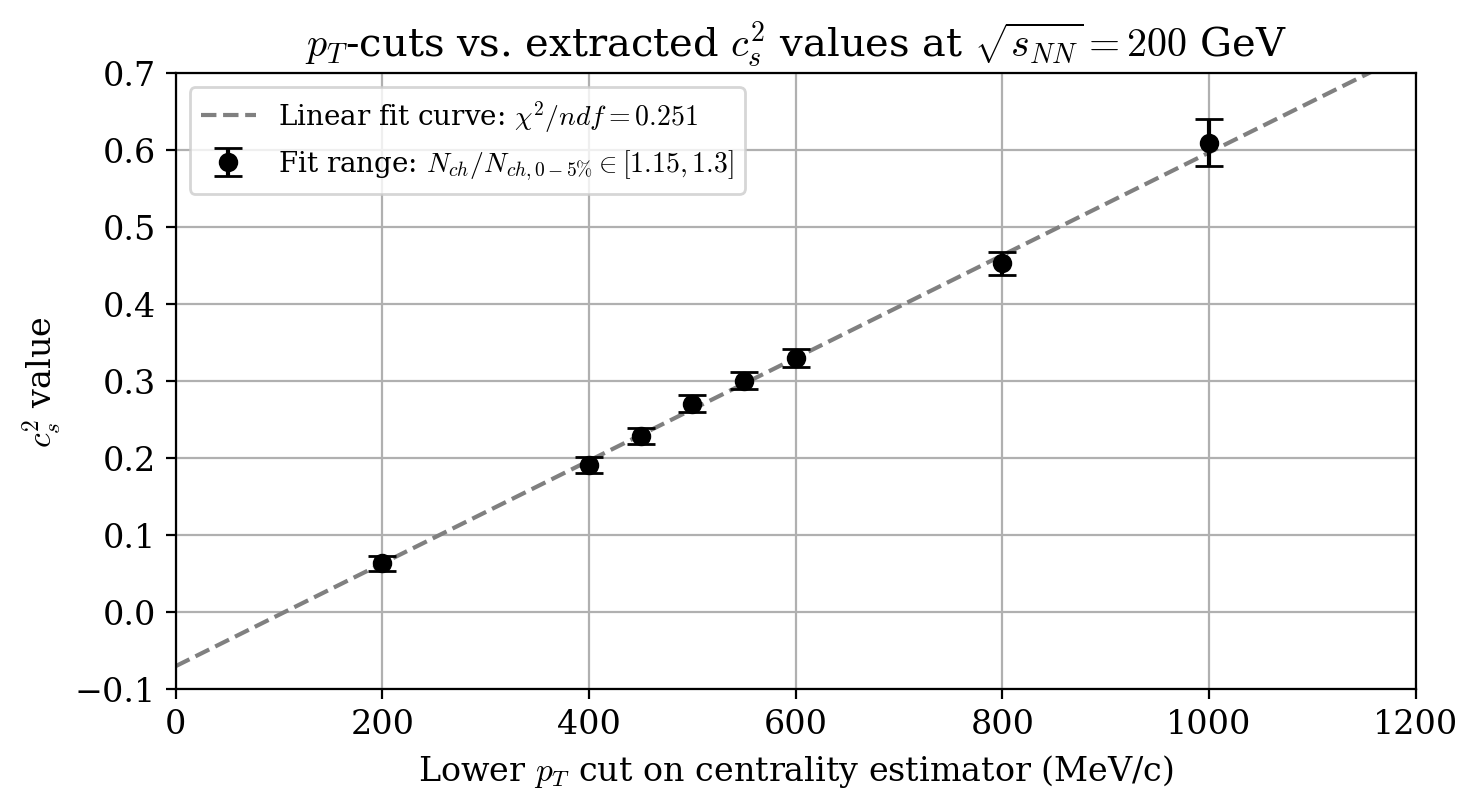

In [106]:
#cs2 vals vs pT cuts
pT_cuts = np.array([200,400,450,500,550,600,800,1000])
pT_cut_cs2_vals = np.array([cs2_5,cs2_5_STARTPC2,cs2_5_450MeV,cs2_5_500MeV,cs2_5_550MeV,cs2_5_600MeV,cs2_5_800MeV,cs2_5_1000MeV])
pT_cut_cs2_err = np.array([cs2_5_err,cs2_5_err_STARTPC2,cs2_5_err_450MeV,cs2_5_err_500MeV,cs2_5_err_550MeV,cs2_5_err_600MeV,cs2_5_err_800MeV,cs2_5_err_1000MeV])

dlnNch = np.array([dlnNch_200MeV,dlnNch_400MeV,dlnNch_450MeV,dlnNch_500MeV,dlnNch_550MeV,dlnNch_600MeV,dlnNch_800MeV,dlnNch_1000MeV])
dlnNch_err = np.array([dlnNch_200MeV_err,dlnNch_400MeV_err,dlnNch_450MeV_err,dlnNch_500MeV_err,dlnNch_550MeV_err,dlnNch_600MeV_err,dlnNch_800MeV_err,dlnNch_1000MeV_err])

dlnpt = np.array([dlnpt_200MeV,dlnpt_400MeV,dlnpt_450MeV,dlnpt_500MeV,dlnpt_550MeV,dlnpt_600MeV,dlnpt_800MeV,dlnpt_1000MeV])
dlnpt_err = np.array([dlnpt_200MeV_err,dlnpt_400MeV_err,dlnpt_450MeV_err,dlnpt_500MeV_err,dlnpt_550MeV_err,dlnpt_600MeV_err,dlnpt_800MeV_err,dlnpt_1000MeV_err])

def linear_pt_threshold_fit(x,A,B):
    return A*x+B

popt_line, pcov_line = curve_fit(
    lambda x, A, B: linear_pt_threshold_fit(x,A,B),
    pT_cuts, pT_cut_cs2_vals, sigma=pT_cut_cs2_err, absolute_sigma=True, p0=[6e-4, 0], bounds=([0,-100],[100,100]), maxfev=100000
)

xfit_line = np.linspace(0,1500,10000)
yfit_line = linear_pt_threshold_fit(xfit_line, *popt_line)
chi2_line, ndf_line, chi2_ndf_line = compute_chi2_ndf(pT_cuts, pT_cut_cs2_vals, pT_cut_cs2_err, linear_pt_threshold_fit, popt_line)

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.plot(xfit_line,yfit_line,color="grey",linestyle="--",label=f"Linear fit curve: $\chi^2/ndf={chi2_ndf_line:.3f}$")
plt.errorbar(pT_cuts.ravel(), pT_cut_cs2_vals.ravel(),yerr=pT_cut_cs2_err.ravel(),
             fmt="o",capsize=5,color="black", label=f"Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[1.15,1.3]$")
plt.title("$p_T$-cuts vs. extracted $c_s^2$ values at $\sqrt{s_{NN}}=200$ GeV")
plt.xlabel("Lower $p_T$ cut on centrality estimator (MeV/c)")
plt.ylabel("$c_s^2$ value")
plt.xlim([0,1200])
plt.ylim([-0.1,0.7])
plt.grid()
plt.legend(prop={'size': '10'})

Fit results:
 A = 0.335000 ± 0.001462
 B = 2.037452 ± 2.378030
 c = 1.196233e-02 ± 3.014845e-03
 chi2 = 154610.92, ndf = 5, chi2/ndf = 30922.18


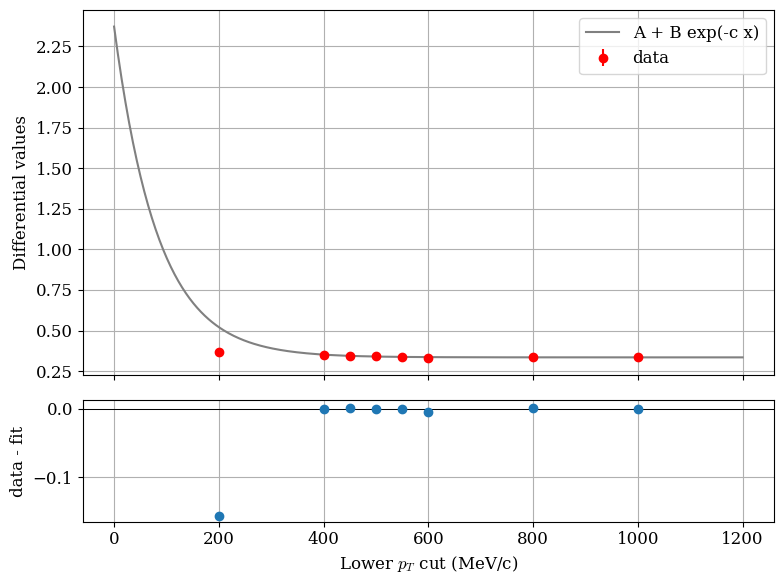

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ---- Replace with your actual data ----

# ---------------------------------------



# model
def exp_decay(x, A, B, c):
    return A + B * np.exp(-c * x)

# initial guesses
A0 = 0.34  # plateau around the minimum value
B0 = dlnNch.max() - A0
c0 = 0.001    # small decay constant to start
p0 = [A0, B0, c0]

# bounds: A ~ positive, B >= 0, c >= 0
bounds = ([0.335, 0, 0], [0.34, 10, 1])

# fit
popt, pcov = curve_fit(exp_decay, pT_cuts[1:].ravel(), dlnNch[1:].ravel(), sigma=dlnNch_err[1:].ravel(), absolute_sigma=True,
                       p0=p0, bounds=bounds, maxfev=20000)
A_fit, B_fit, c_fit = popt
perr = np.sqrt(np.diag(pcov))

print("Fit results:")
print(f" A = {A_fit:.6f} ± {perr[0]:.6f}")
print(f" B = {B_fit:.6f} ± {perr[1]:.6f}")
print(f" c = {c_fit:.6e} ± {perr[2]:.6e}")

# chi2
resid = (dlnNch - exp_decay(pT_cuts, *popt)) / dlnNch_err
chi2 = np.sum(resid**2)
ndf = len(dlnNch) - len(popt)
print(f" chi2 = {chi2:.2f}, ndf = {ndf}, chi2/ndf = {chi2/ndf:.2f}")

# plot
xfit = np.linspace(0, 1200, 500)
yfit = exp_decay(xfit, *popt)

fig, (ax, axr) = plt.subplots(2, 1, sharex=True,
                              gridspec_kw={'height_ratios':[3,1]},
                              figsize=(8,6))

ax.errorbar(pT_cuts.ravel(), dlnNch.ravel(), yerr=dlnNch_err.ravel(), fmt='o', color='red', label='data')
ax.plot(xfit, yfit, '-', color='gray', label='A + B exp(-c x)')
ax.set_ylabel('Differential values')
ax.legend()
ax.grid(True)

axr.errorbar(pT_cuts.ravel(), dlnNch.ravel() - exp_decay(pT_cuts, *popt), yerr=dlnNch_err.ravel(), fmt='o')
axr.axhline(0, color='k', lw=0.7)
axr.set_xlabel('Lower $p_T$ cut (MeV/c)')
axr.set_ylabel('data - fit')
axr.grid(True)

plt.tight_layout()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/3062457040.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$p_T$-cuts vs. differential values at $\sqrt{s_{NN}}=200$ GeV")


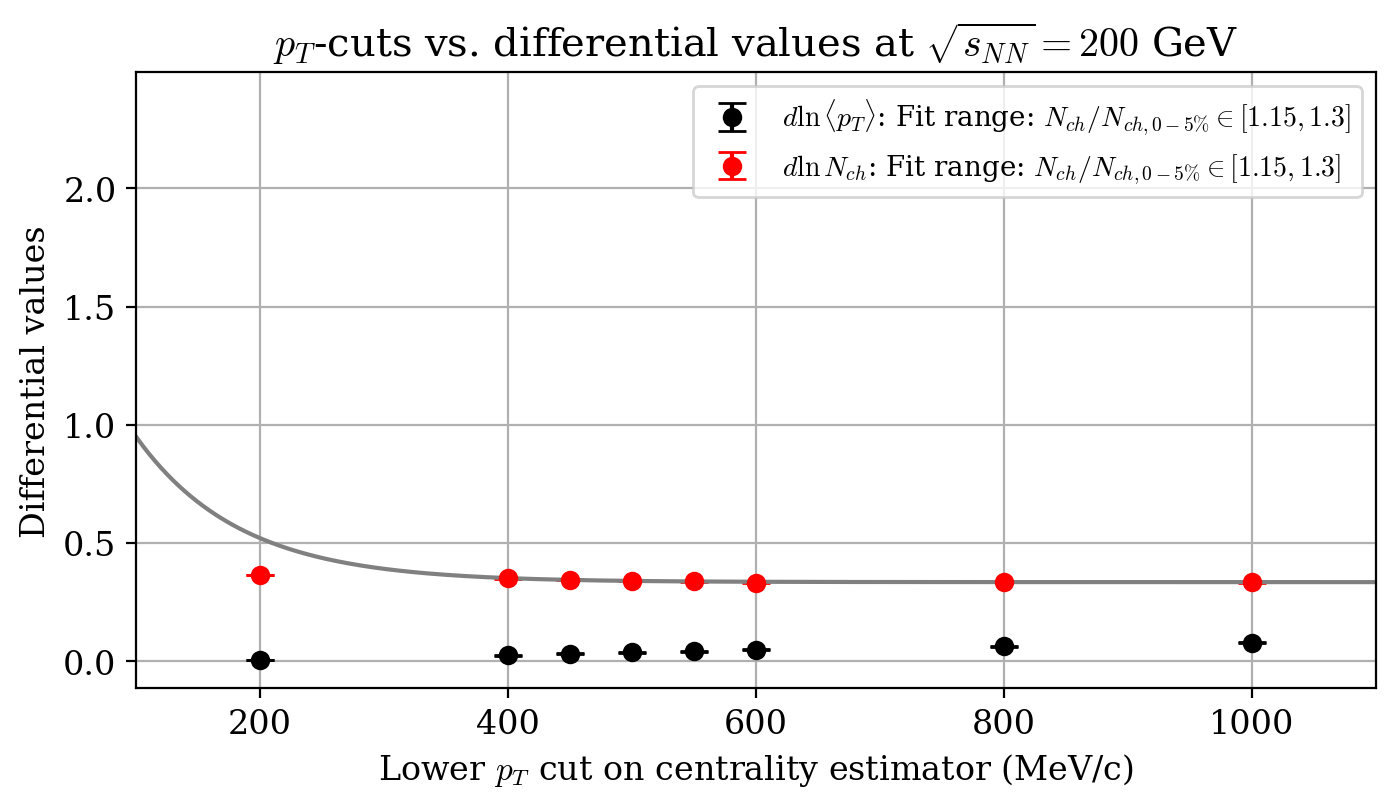

In [108]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(pT_cuts.ravel(), dlnpt.ravel(),yerr=dlnpt_err.ravel(),
             fmt="o",capsize=5,color="black", label=rf"$d\ln \langle p_T \rangle$: Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[1.15,1.3]$")
plt.errorbar(pT_cuts.ravel(), dlnNch.ravel(),yerr=dlnNch_err.ravel(),
             fmt="o",capsize=5,color="red", label=rf"$d\ln N_{{ch}}$: Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[1.15,1.3]$")
plt.plot(xfit,yfit,color="grey")
plt.title("$p_T$-cuts vs. differential values at $\sqrt{s_{NN}}=200$ GeV")
plt.xlabel("Lower $p_T$ cut on centrality estimator (MeV/c)")
plt.ylabel(r"Differential values")
plt.xlim([100,1100])
# plt.ylim([0,0.1])
plt.grid()
plt.legend(prop={'size': '10'})

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1265/523069712.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$p_T$-cuts vs. differential values at $\sqrt{s_{NN}}=200$ GeV")


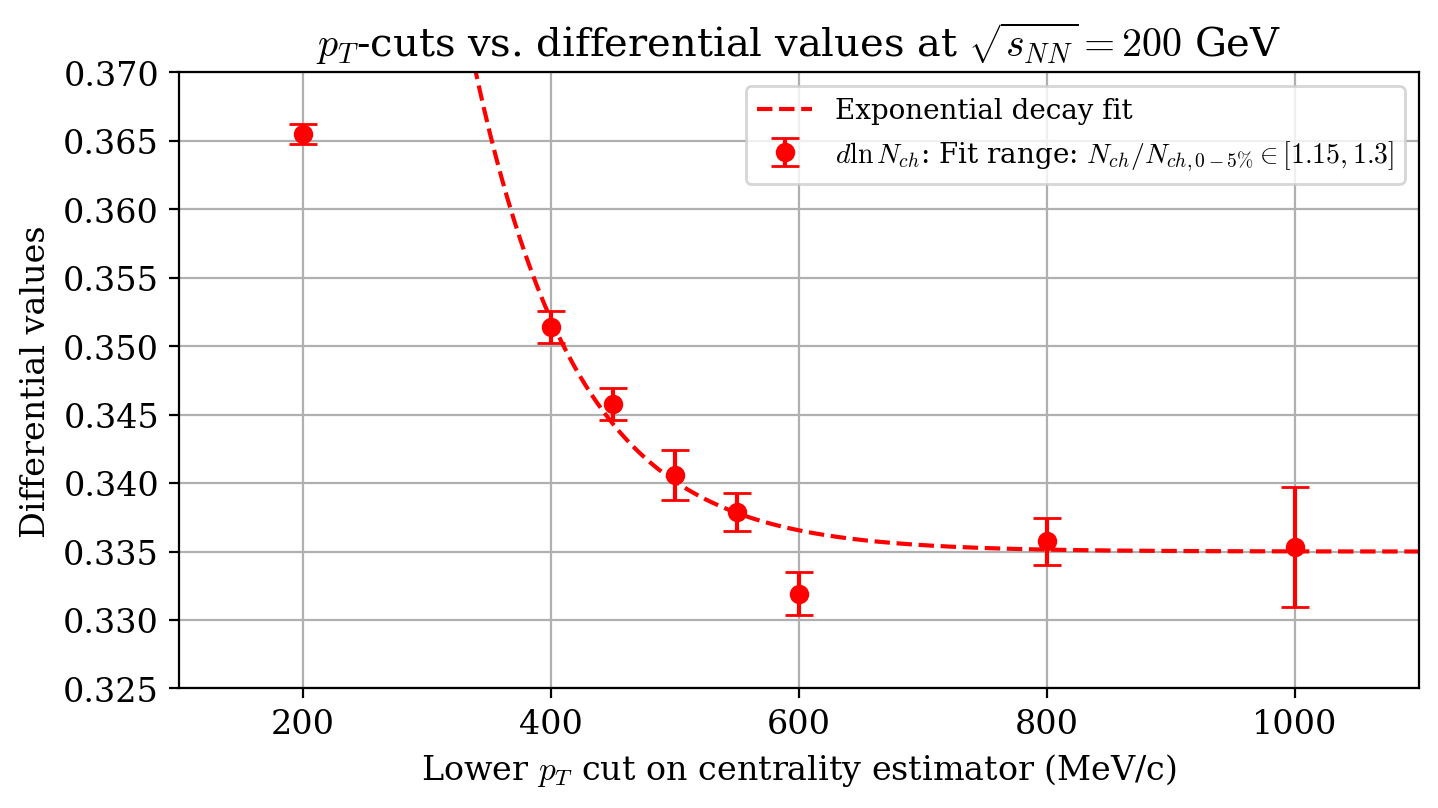

In [109]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

# plt.errorbar(pT_cuts.ravel(), dlnpt.ravel(),yerr=dlnpt_err.ravel(),
#              fmt="o",capsize=5,color="black", label=rf"$d\ln \langle p_T \rangle$: Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[1.15,1.3]$")
plt.errorbar(pT_cuts.ravel(), dlnNch.ravel(),yerr=dlnNch_err.ravel(),
             fmt="o",capsize=5,color="red", label=rf"$d\ln N_{{ch}}$: Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[1.15,1.3]$")
plt.plot(xfit,yfit,color="red",linestyle="--", label="Exponential decay fit")
plt.title("$p_T$-cuts vs. differential values at $\sqrt{s_{NN}}=200$ GeV")
plt.xlabel("Lower $p_T$ cut on centrality estimator (MeV/c)")
plt.ylabel(r"Differential values")
plt.xlim([100,1100])
plt.ylim([0.325,0.37])
plt.grid()
plt.legend(prop={'size': '10'})

In [110]:
# with open("/Users/christianschmidt/Desktop/pTcutsvdlnNch.csv", "w") as File:
#     File.write("pTcut,dlnNch,dlnNcherr\n")
#     for i in range(len(pT_cuts)):
#         File.write(f"{float(pT_cuts[i])},{float(dlnNch[i])},{float(dlnNch_err[i])}\n")

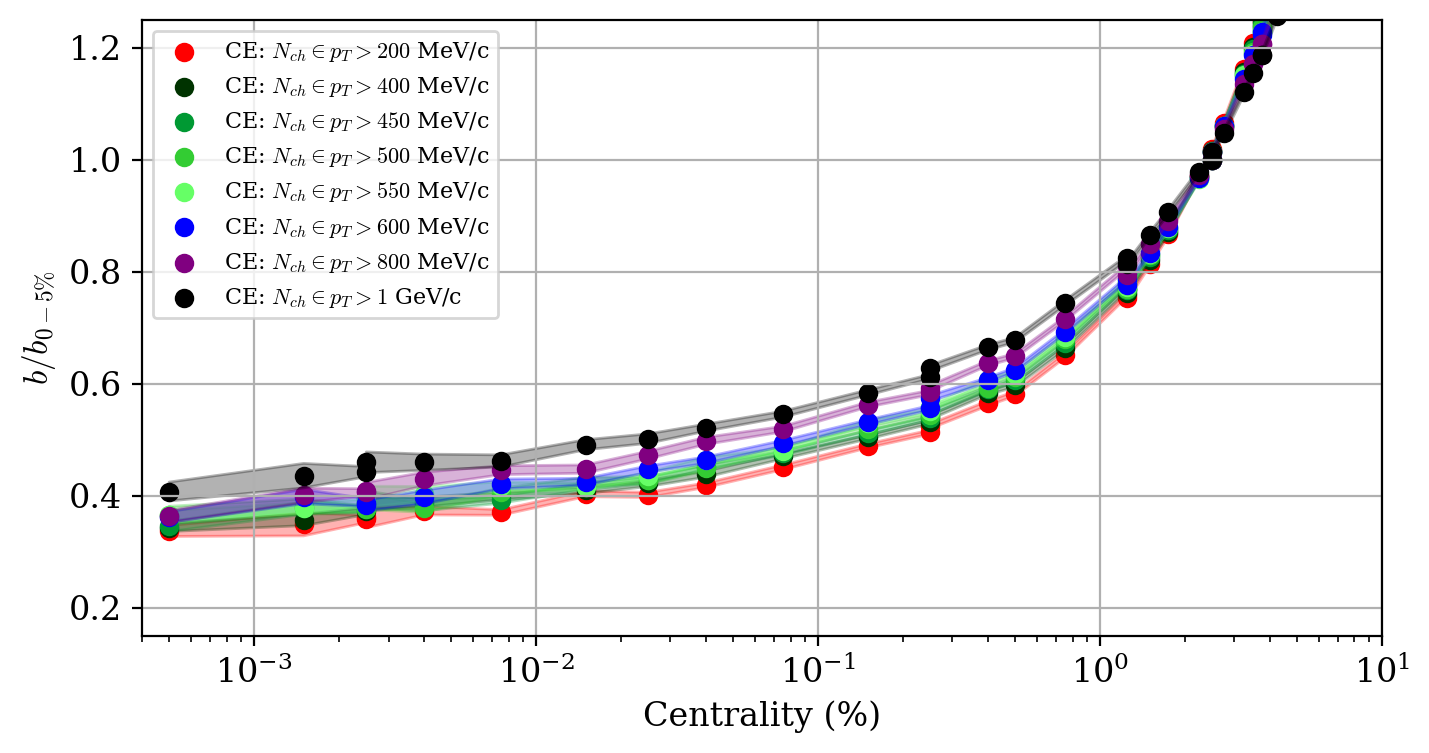

In [264]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

sorting_term = np.argsort(Centrality.ravel())
sorted_Centrality = Centrality[sorting_term]

sorted_ImpactParameter_05_5 = ImpactParameter_05_5[sorting_term]
sorted_ImpactParameter_05_Symerr_5 = ImpactParameter_05_Symerr_5[sorting_term]

sorted_ImpactParameter_05_STARTPC2_5 = ImpactParameter_05_STARTPC2_5[sorting_term]
sorted_ImpactParameter_05_STARTPC2_Symerr_5 = ImpactParameter_05_Symerr_STARTPC2_5[sorting_term]

sorted_ImpactParameter_05_STARTPC450MeV_5 = ImpactParameter_05_STARTPC450MeV_5[sorting_term]
sorted_ImpactParameter_05_STARTPC450MeV_Symerr_5 = ImpactParameter_05_Symerr_STARTPC450MeV_5[sorting_term]

sorted_ImpactParameter_05_STARTPC500MeV_5 = ImpactParameter_05_STARTPC500MeV_5[sorting_term]
sorted_ImpactParameter_05_STARTPC500MeV_Symerr_5 = ImpactParameter_05_Symerr_STARTPC500MeV_5[sorting_term]

sorted_ImpactParameter_05_STARTPC550MeV_5 = ImpactParameter_05_STARTPC550MeV_5[sorting_term]
sorted_ImpactParameter_05_STARTPC550MeV_Symerr_5 = ImpactParameter_05_Symerr_STARTPC550MeV_5[sorting_term]

sorted_ImpactParameter_05_STARTPC600MeV_5 = ImpactParameter_05_STARTPC600MeV_5[sorting_term]
sorted_ImpactParameter_05_STARTPC600MeV_Symerr_5 = ImpactParameter_05_Symerr_STARTPC600MeV_5[sorting_term]

sorted_ImpactParameter_05_STARTPC800MeV_5 = ImpactParameter_05_STARTPC800MeV_5[sorting_term]
sorted_ImpactParameter_05_STARTPC800MeV_Symerr_5 = ImpactParameter_05_Symerr_STARTPC800MeV_5[sorting_term]

sorted_ImpactParameter_05_STARTPC1000MeV_5 = ImpactParameter_05_STARTPC1000MeV_5[sorting_term]
sorted_ImpactParameter_05_STARTPC1000MeV_Symerr_5 = ImpactParameter_05_Symerr_STARTPC1000MeV_5[sorting_term]

sorted_ImpactParameter_5 = ImpactParameter_5[sorting_term]
sorted_ImpactParameter_Symerr_5 = ImpactParameter_Symerr_5[sorting_term]

sorted_ImpactParameter_STARTPC2_5 = ImpactParameter_STARTPC2_5[sorting_term]
sorted_ImpactParameter_STARTPC2_Symerr_5 = ImpactParameter_Symerr_STARTPC2_5[sorting_term]

sorted_ImpactParameter_STARTPC450MeV_5 = ImpactParameter_STARTPC450MeV_5[sorting_term]
sorted_ImpactParameter_STARTPC450MeV_Symerr_5 = ImpactParameter_Symerr_STARTPC450MeV_5[sorting_term]

sorted_ImpactParameter_STARTPC500MeV_5 = ImpactParameter_STARTPC500MeV_5[sorting_term]
sorted_ImpactParameter_STARTPC500MeV_Symerr_5 = ImpactParameter_Symerr_STARTPC500MeV_5[sorting_term]

sorted_ImpactParameter_STARTPC550MeV_5 = ImpactParameter_STARTPC550MeV_5[sorting_term]
sorted_ImpactParameter_STARTPC550MeV_Symerr_5 = ImpactParameter_Symerr_STARTPC550MeV_5[sorting_term]

sorted_ImpactParameter_STARTPC600MeV_5 = ImpactParameter_STARTPC600MeV_5[sorting_term]
sorted_ImpactParameter_STARTPC600MeV_Symerr_5 = ImpactParameter_Symerr_STARTPC600MeV_5[sorting_term]

sorted_ImpactParameter_STARTPC800MeV_5 = ImpactParameter_STARTPC800MeV_5[sorting_term]
sorted_ImpactParameter_STARTPC800MeV_Symerr_5 = ImpactParameter_Symerr_STARTPC800MeV_5[sorting_term]

sorted_ImpactParameter_STARTPC1000MeV_5 = ImpactParameter_STARTPC1000MeV_5[sorting_term]
sorted_ImpactParameter_STARTPC1000MeV_Symerr_5 = ImpactParameter_Symerr_STARTPC1000MeV_5[sorting_term]


plt.scatter(Centrality.ravel(), ImpactParameter_05_5.ravel(),
            color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_5.ravel() - sorted_ImpactParameter_05_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_5.ravel() + sorted_ImpactParameter_05_Symerr_5.ravel(), color='red', alpha=0.3)
                 
plt.scatter(Centrality.ravel(), ImpactParameter_05_STARTPC2_5.ravel(),
            color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_STARTPC2_5.ravel() - sorted_ImpactParameter_05_STARTPC2_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_STARTPC2_5.ravel() + sorted_ImpactParameter_05_STARTPC2_Symerr_5.ravel(), color="#003300", alpha=0.3)

plt.scatter(Centrality.ravel(), ImpactParameter_05_STARTPC450MeV_5.ravel(),
            color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_STARTPC450MeV_5.ravel() - sorted_ImpactParameter_05_STARTPC450MeV_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_STARTPC450MeV_5.ravel() + sorted_ImpactParameter_05_STARTPC450MeV_Symerr_5.ravel(), color="#009933", alpha=0.3)

plt.scatter(Centrality.ravel(), ImpactParameter_05_STARTPC500MeV_5.ravel(),
            color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_STARTPC500MeV_5.ravel() - sorted_ImpactParameter_05_STARTPC500MeV_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_STARTPC500MeV_5.ravel() + sorted_ImpactParameter_05_STARTPC500MeV_Symerr_5.ravel(), color="#33cc33", alpha=0.3)

plt.scatter(Centrality.ravel(), ImpactParameter_05_STARTPC550MeV_5.ravel(),
            color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_STARTPC550MeV_5.ravel() - sorted_ImpactParameter_05_STARTPC550MeV_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_STARTPC550MeV_5.ravel() + sorted_ImpactParameter_05_STARTPC550MeV_Symerr_5.ravel(), color="#66ff66", alpha=0.3)

plt.scatter(Centrality.ravel(), ImpactParameter_05_STARTPC600MeV_5.ravel(),
            color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_STARTPC600MeV_5.ravel() - sorted_ImpactParameter_05_STARTPC600MeV_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_STARTPC600MeV_5.ravel() + sorted_ImpactParameter_05_STARTPC600MeV_Symerr_5.ravel(), color="blue", alpha=0.3)

plt.scatter(Centrality.ravel(), ImpactParameter_05_STARTPC800MeV_5.ravel(),
            color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_STARTPC800MeV_5.ravel() - sorted_ImpactParameter_05_STARTPC800MeV_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_STARTPC800MeV_5.ravel() + sorted_ImpactParameter_05_STARTPC800MeV_Symerr_5.ravel(), color="purple", alpha=0.3)

plt.scatter(Centrality.ravel(), ImpactParameter_05_STARTPC1000MeV_5.ravel(),
            color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")
plt.fill_between(sorted_Centrality.ravel(), sorted_ImpactParameter_05_STARTPC1000MeV_5.ravel() - sorted_ImpactParameter_05_STARTPC1000MeV_Symerr_5.ravel(), 
                 sorted_ImpactParameter_05_STARTPC1000MeV_5.ravel() + sorted_ImpactParameter_05_STARTPC1000MeV_Symerr_5.ravel(), color="black", alpha=0.3)

# plt.title("$p_T$-cuts vs. differential values at $\sqrt{s_{NN}}=200$ GeV")
plt.xlabel("Centrality (%)")
plt.ylabel(r"$b/b_{0-5\%}$")
plt.xscale("log")
plt.grid()
plt.xlim([0.0004,10])
plt.ylim([0.15,1.25])
plt.legend(prop={'size': '8'},loc="upper left")

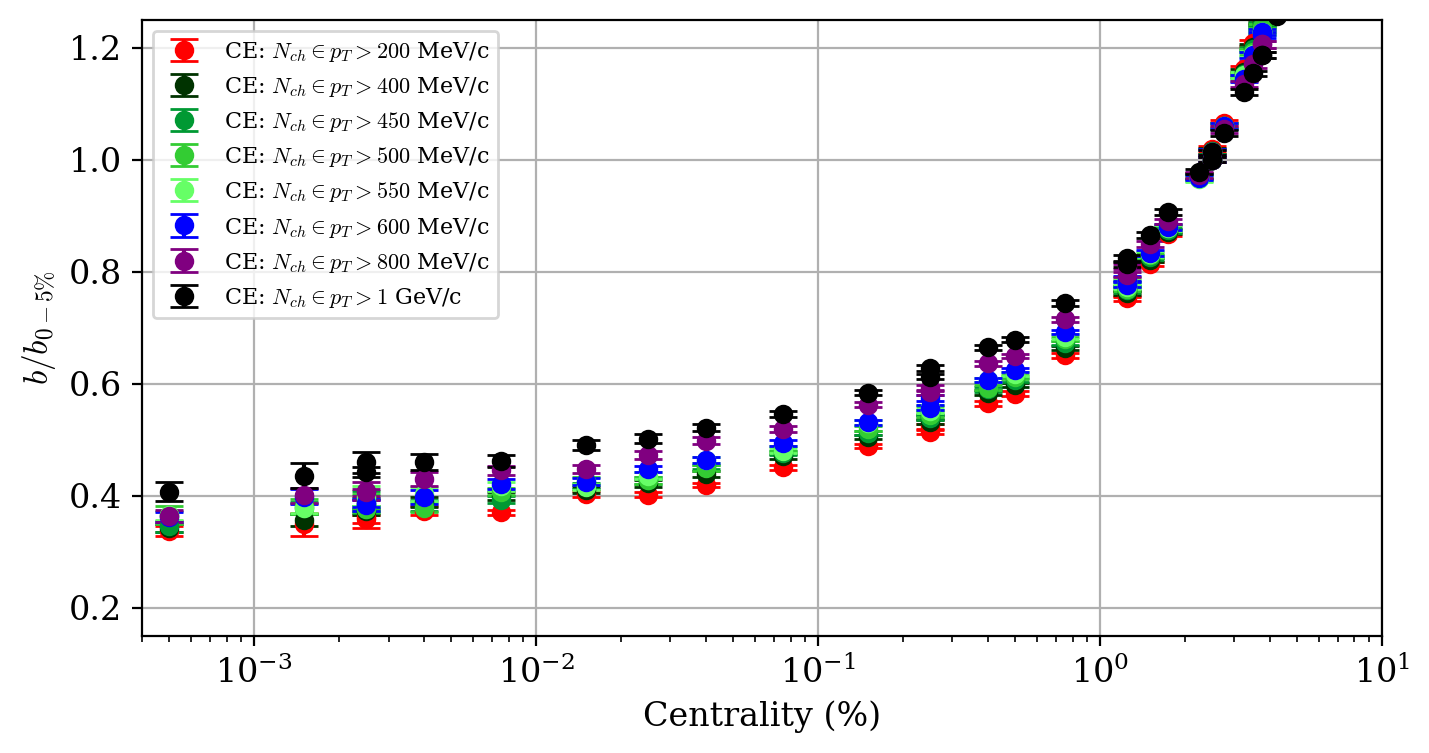

In [147]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(Centrality.ravel(), ImpactParameter_05_5.ravel(),yerr=ImpactParameter_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
                 
plt.errorbar(Centrality.ravel(), ImpactParameter_05_STARTPC2_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_05_STARTPC450MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_05_STARTPC500MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_05_STARTPC550MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_05_STARTPC600MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_05_STARTPC800MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_05_STARTPC1000MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")

plt.xlabel("Centrality (%)")
plt.ylabel(r"$b/b_{0-5\%}$")
plt.xscale("log")
plt.grid()
plt.xlim([0.0004,10])
plt.ylim([0.15,1.25])
plt.legend(prop={'size': '8'},loc="upper left")

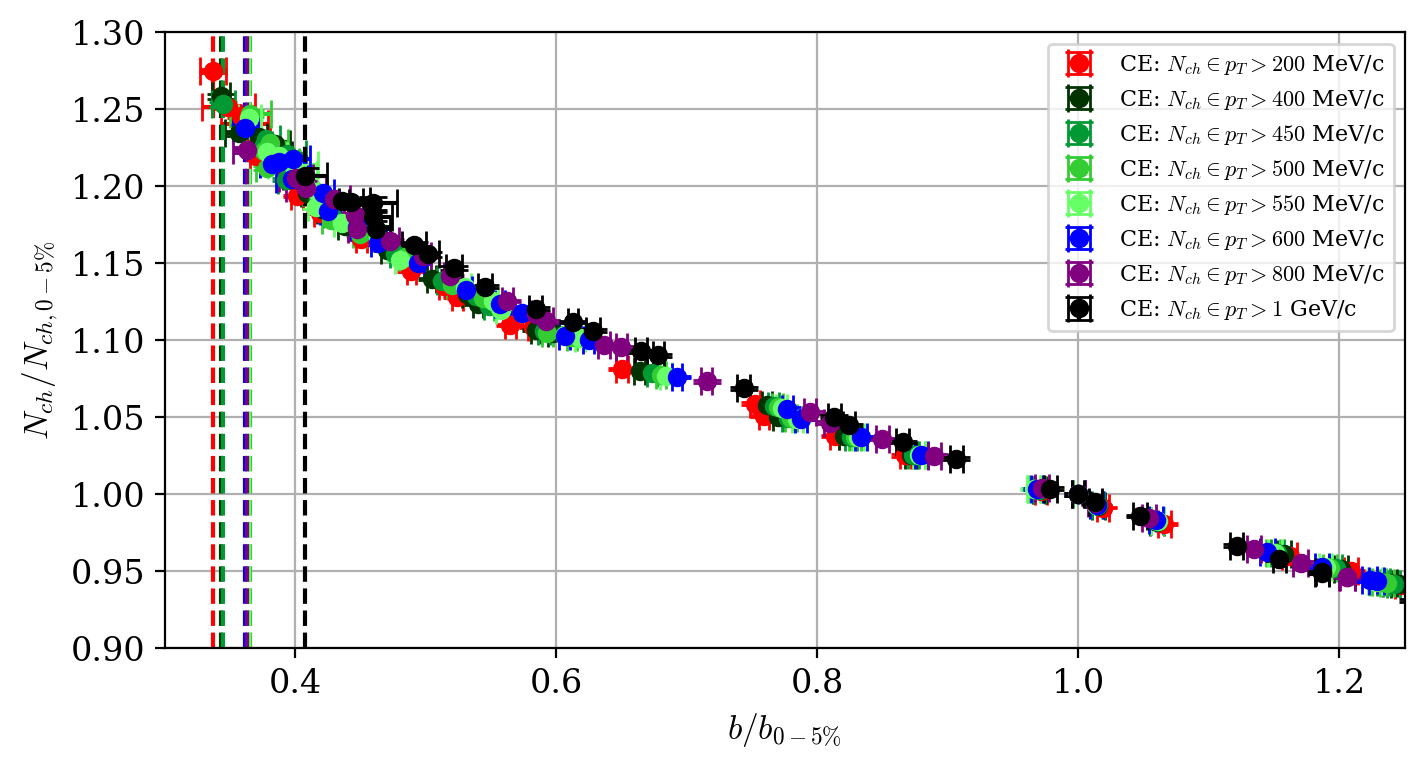

In [152]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(ImpactParameter_05_5.ravel(), MultiplicityCharged_05_5.ravel(),
             xerr=ImpactParameter_05_Symerr_5.ravel(), yerr=MultiplicityCharged_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_5),color="red",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC2_5.ravel(), MultiplicityCharged_05_STARTPC2_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC2_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC2_5),color="#003300",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC450MeV_5.ravel(), MultiplicityCharged_05_STARTPC450MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC450MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC450MeV_5),color="#009933",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC500MeV_5.ravel(), MultiplicityCharged_05_STARTPC500MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC500MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC500MeV_5),color="#33cc33",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC550MeV_5.ravel(), MultiplicityCharged_05_STARTPC550MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC550MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC550MeV_5),color="#66ff66",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC600MeV_5.ravel(), MultiplicityCharged_05_STARTPC600MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC600MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC600MeV_5),color="blue",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC800MeV_5.ravel(), MultiplicityCharged_05_STARTPC800MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC800MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC800MeV_5),color="purple",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC1000MeV_5.ravel(), MultiplicityCharged_05_STARTPC1000MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC1000MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC1000MeV_5),color="black",linestyle="--")
plt.xlim([0.3,1.25])
plt.ylim([0.9,1.3])
plt.grid()
plt.xlabel(r"$b/b_{0-5\%}$")
plt.ylabel(r"$N_{ch}/N_{ch,0-5\%}$")
plt.legend(prop={'size': '8'},loc="upper right")

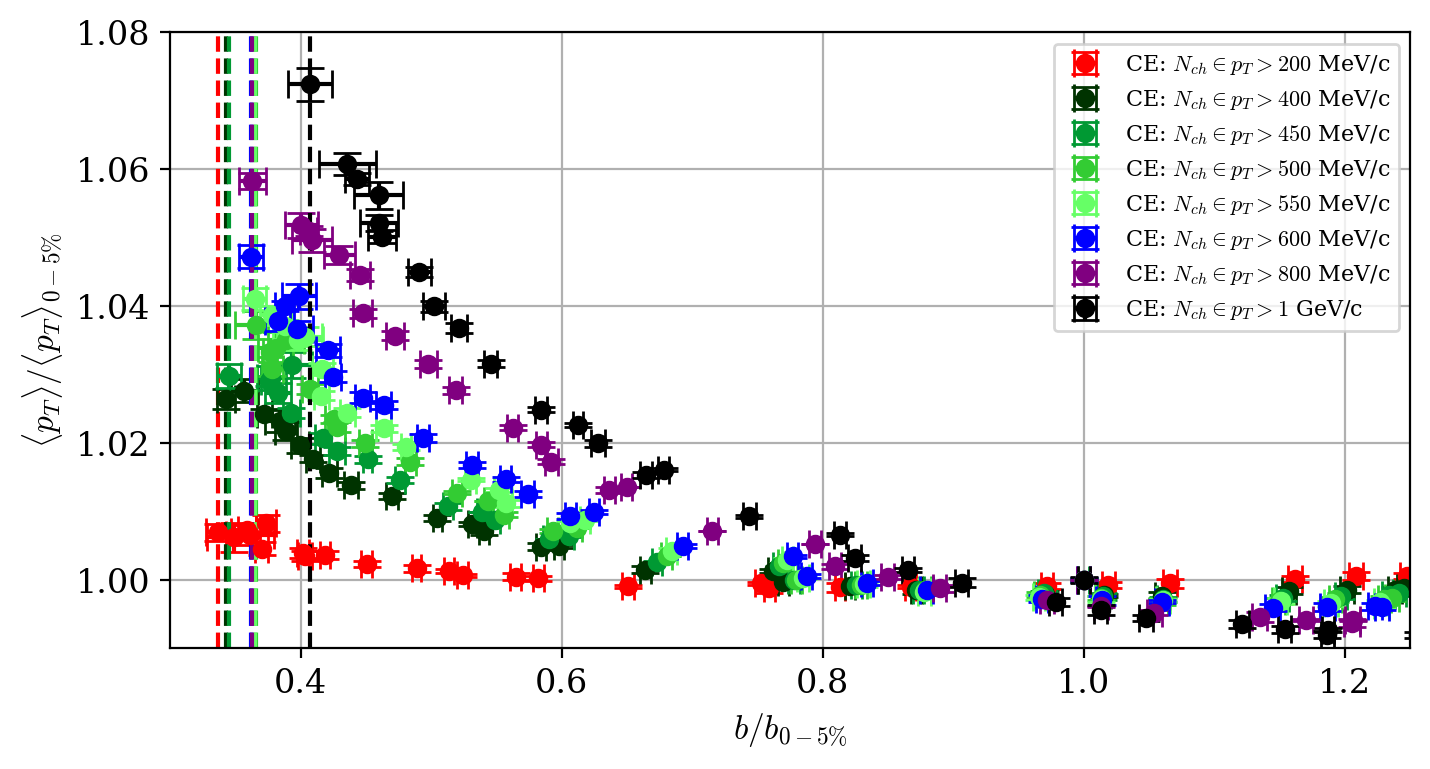

In [ ]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(ImpactParameter_05_5.ravel(), MultiplicityCharged_MeanpT_05_5.ravel(),
             xerr=ImpactParameter_05_Symerr_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_5),color="red",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC2_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC2_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC2_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC2_5),color="#003300",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC450MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC450MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC450MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC450MeV_5),color="#009933",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC500MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC500MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC500MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC500MeV_5),color="#33cc33",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC550MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC550MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC550MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC550MeV_5),color="#66ff66",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC600MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC600MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC600MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC600MeV_5),color="blue",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC800MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC800MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC800MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC800MeV_5),color="purple",linestyle="--")
plt.errorbar(ImpactParameter_05_STARTPC1000MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC1000MeV_5.ravel(),
             xerr=ImpactParameter_05_Symerr_STARTPC1000MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")
plt.axvline(x=min(ImpactParameter_05_STARTPC1000MeV_5),color="black",linestyle="--")
plt.xlim([0.3,1.25])
plt.ylim([0.99,1.08])
plt.grid()
plt.xlabel(r"$b/b_{0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
plt.legend(prop={'size': '8'},loc="upper right")

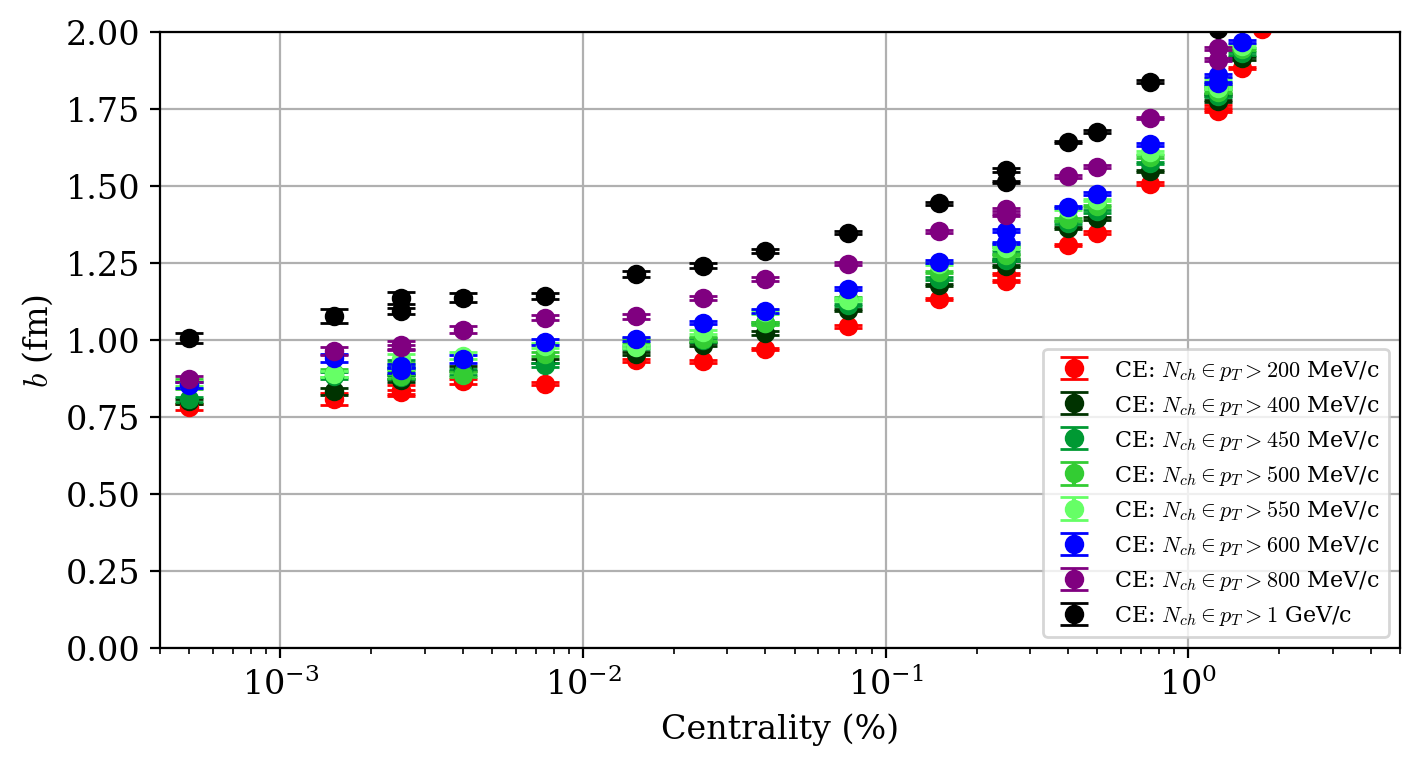

In [189]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(Centrality.ravel(), ImpactParameter_5.ravel(),yerr=ImpactParameter_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
                 
plt.errorbar(Centrality.ravel(), ImpactParameter_STARTPC2_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_STARTPC450MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_STARTPC500MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_STARTPC550MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_STARTPC600MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_STARTPC800MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")

plt.errorbar(Centrality.ravel(), ImpactParameter_STARTPC1000MeV_5.ravel(),yerr=ImpactParameter_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")

plt.xlabel("Centrality (%)")
plt.ylabel(r"$b$ (fm)")
plt.xscale("log")
plt.grid()
plt.xlim([0.0004,5])
plt.ylim([0,2])
plt.legend(prop={'size': '8'},loc="lower right")

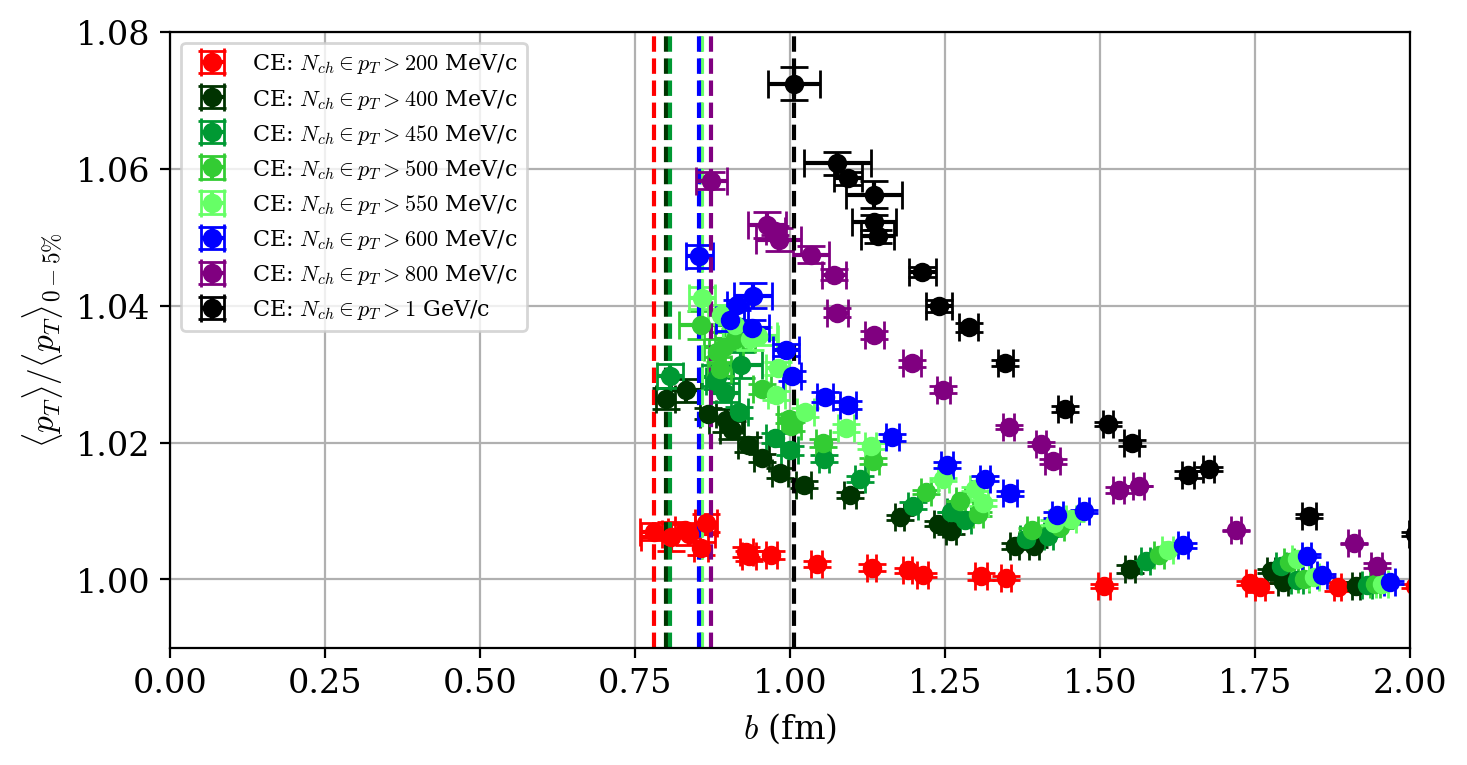

In [190]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(ImpactParameter_5.ravel(), MultiplicityCharged_MeanpT_05_5.ravel(),
             xerr=ImpactParameter_Symerr_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
plt.axvline(x=min(ImpactParameter_5),color="red",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC2_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC2_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC2_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC2_5),color="#003300",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC450MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC450MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC450MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC450MeV_5),color="#009933",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC500MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC500MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC500MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC500MeV_5),color="#33cc33",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC550MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC550MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC550MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC550MeV_5),color="#66ff66",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC600MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC600MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC600MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC600MeV_5),color="blue",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC800MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC800MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC800MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC800MeV_5),color="purple",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC1000MeV_5.ravel(), MultiplicityCharged_MeanpT_05_STARTPC1000MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC1000MeV_5.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC1000MeV_5),color="black",linestyle="--")
plt.xlim([0,2])
plt.ylim([0.99,1.08])
plt.grid()
plt.xlabel(r"$b$ (fm)")
plt.ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
plt.legend(prop={'size': '8'},loc="upper left")

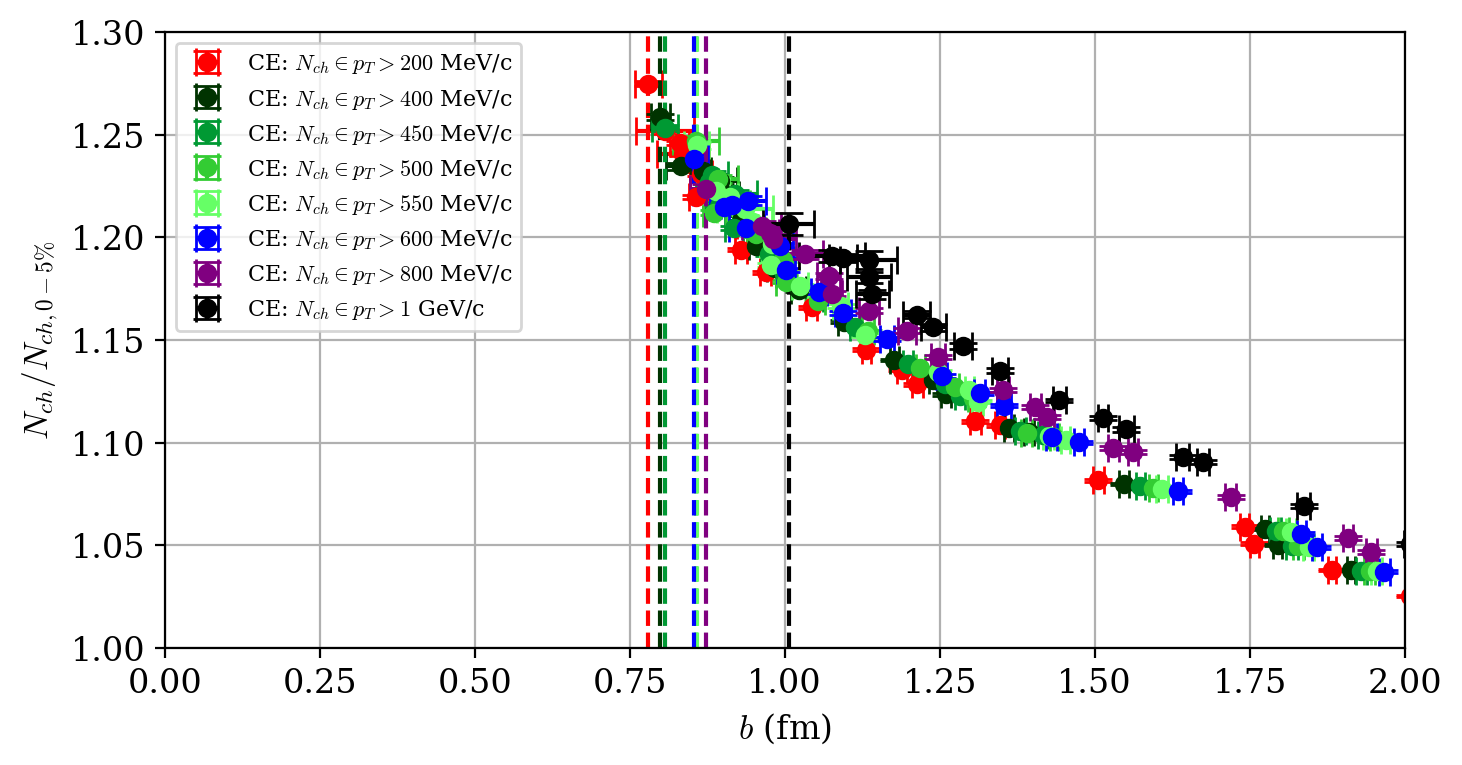

In [185]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(ImpactParameter_5.ravel(), MultiplicityCharged_05_5.ravel(),
             xerr=ImpactParameter_Symerr_5.ravel(), yerr=MultiplicityCharged_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
plt.axvline(x=min(ImpactParameter_5),color="red",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC2_5.ravel(), MultiplicityCharged_05_STARTPC2_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC2_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC2_5),color="#003300",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC450MeV_5.ravel(), MultiplicityCharged_05_STARTPC450MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC450MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC450MeV_5),color="#009933",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC500MeV_5.ravel(), MultiplicityCharged_05_STARTPC500MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC500MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC500MeV_5),color="#33cc33",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC550MeV_5.ravel(), MultiplicityCharged_05_STARTPC550MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC550MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC550MeV_5),color="#66ff66",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC600MeV_5.ravel(), MultiplicityCharged_05_STARTPC600MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC600MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC600MeV_5),color="blue",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC800MeV_5.ravel(), MultiplicityCharged_05_STARTPC800MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC800MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC800MeV_5),color="purple",linestyle="--")
plt.errorbar(ImpactParameter_STARTPC1000MeV_5.ravel(), MultiplicityCharged_05_STARTPC1000MeV_5.ravel(),
             xerr=ImpactParameter_Symerr_STARTPC1000MeV_5.ravel(), yerr=MultiplicityCharged_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")
plt.axvline(x=min(ImpactParameter_STARTPC1000MeV_5),color="black",linestyle="--")
plt.xlim([0,2])
plt.ylim([1,1.3])
plt.grid()
plt.xlabel(r"$b$ (fm)")
plt.ylabel(r"$N_{ch}/N_{ch,0-5\%}$")
plt.legend(prop={'size': '8'},loc="upper left")

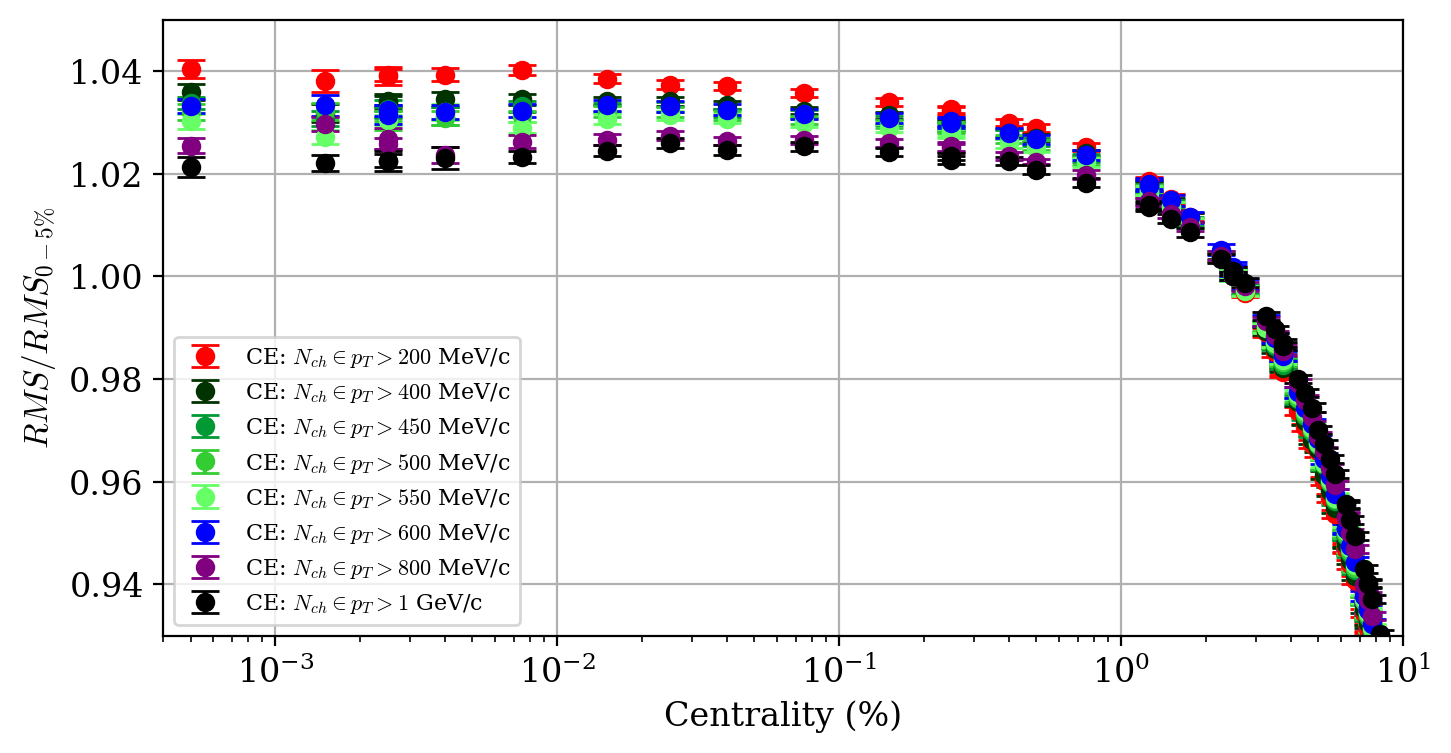

In [173]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(Centrality.ravel(), InitialRMS_05_5.ravel(),yerr=InitialRMS_05_Symerr_5.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
                 
plt.errorbar(Centrality.ravel(), InitialRMS_05_STARTPC2_5.ravel(),yerr=InitialRMS_05_Symerr_STARTPC2_5.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")

plt.errorbar(Centrality.ravel(), InitialRMS_05_STARTPC450MeV_5.ravel(),yerr=InitialRMS_05_Symerr_STARTPC450MeV_5.ravel(),
             fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")

plt.errorbar(Centrality.ravel(), InitialRMS_05_STARTPC500MeV_5.ravel(),yerr=InitialRMS_05_Symerr_STARTPC500MeV_5.ravel(),
             fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")

plt.errorbar(Centrality.ravel(), InitialRMS_05_STARTPC550MeV_5.ravel(),yerr=InitialRMS_05_Symerr_STARTPC550MeV_5.ravel(),
             fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")

plt.errorbar(Centrality.ravel(), InitialRMS_05_STARTPC600MeV_5.ravel(),yerr=InitialRMS_05_Symerr_STARTPC600MeV_5.ravel(),
             fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")

plt.errorbar(Centrality.ravel(), InitialRMS_05_STARTPC800MeV_5.ravel(),yerr=InitialRMS_05_Symerr_STARTPC800MeV_5.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")

plt.errorbar(Centrality.ravel(), InitialRMS_05_STARTPC1000MeV_5.ravel(),yerr=InitialRMS_05_Symerr_STARTPC1000MeV_5.ravel(),
             fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1$ GeV/c")

plt.xlabel("Centrality (%)")
plt.ylabel(r"$RMS/RMS_{0-5\%}$")
plt.xscale("log")
plt.grid()
plt.xlim([0.0004,10])
plt.ylim([0.93,1.05])
plt.legend(prop={'size': '8'},loc="lower left")

In [307]:
Delta_b_200MeV = []
Delta_b_200MeV_Symerr = []
Delta_b_400MeV = []
Delta_b_400MeV_Symerr = []
Delta_b_450MeV = []
Delta_b_450MeV_Symerr = []
Delta_b_500MeV = []
Delta_b_500MeV_Symerr = []
Delta_b_550MeV = []
Delta_b_550MeV_Symerr = []
Delta_b_600MeV = []
Delta_b_600MeV_Symerr = []
Delta_b_800MeV = []
Delta_b_800MeV_Symerr = []
Delta_b_1000MeV = []
Delta_b_1000MeV_Symerr = []

Delta_Centrality = []

# for i in range(len(Centrality) - 1):
#     Delta_Centrality_Val = 0.5*(sorted_Centrality[i+1] + sorted_Centrality[i])
#     Delta_Centrality.append(Delta_Centrality_Val)

#     Delta_b_val_200MeV = sorted_ImpactParameter_5[i+1] - sorted_ImpactParameter_5[i]
#     Delta_b_err_200MeV = np.sqrt((sorted_ImpactParameter_Symerr_5[i+1])**2 + (sorted_ImpactParameter_Symerr_5[i])**2)
#     Delta_b_200MeV.append(Delta_b_val_200MeV)
#     Delta_b_200MeV_Symerr.append(Delta_b_err_200MeV)

#     Delta_b_val_400MeV = sorted_ImpactParameter_STARTPC2_5[i+1] - sorted_ImpactParameter_STARTPC2_5[i]
#     Delta_b_err_400MeV = np.sqrt((sorted_ImpactParameter_STARTPC2_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC2_Symerr_5[i])**2)
#     Delta_b_400MeV.append(Delta_b_val_400MeV)
#     Delta_b_400MeV_Symerr.append(Delta_b_err_400MeV)

#     Delta_b_val_450MeV = sorted_ImpactParameter_STARTPC450MeV_5[i+1] - sorted_ImpactParameter_STARTPC450MeV_5[i]
#     Delta_b_err_450MeV = np.sqrt((sorted_ImpactParameter_STARTPC450MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC450MeV_Symerr_5[i])**2)
#     Delta_b_450MeV.append(Delta_b_val_450MeV)
#     Delta_b_450MeV_Symerr.append(Delta_b_err_450MeV)

#     Delta_b_val_500MeV = sorted_ImpactParameter_STARTPC500MeV_5[i+1] - sorted_ImpactParameter_STARTPC500MeV_5[i]
#     Delta_b_err_500MeV = np.sqrt((sorted_ImpactParameter_STARTPC500MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC500MeV_Symerr_5[i])**2)
#     Delta_b_500MeV.append(Delta_b_val_500MeV)
#     Delta_b_500MeV_Symerr.append(Delta_b_err_500MeV)

#     Delta_b_val_550MeV = sorted_ImpactParameter_STARTPC550MeV_5[i+1] - sorted_ImpactParameter_STARTPC550MeV_5[i]
#     Delta_b_err_550MeV = np.sqrt((sorted_ImpactParameter_STARTPC550MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC550MeV_Symerr_5[i])**2)
#     Delta_b_550MeV.append(Delta_b_val_550MeV)
#     Delta_b_550MeV_Symerr.append(Delta_b_err_550MeV)

#     Delta_b_val_600MeV = sorted_ImpactParameter_STARTPC600MeV_5[i+1] - sorted_ImpactParameter_STARTPC600MeV_5[i]
#     Delta_b_err_600MeV = np.sqrt((sorted_ImpactParameter_STARTPC600MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC600MeV_Symerr_5[i])**2)
#     Delta_b_600MeV.append(Delta_b_val_600MeV)
#     Delta_b_600MeV_Symerr.append(Delta_b_err_600MeV)

#     Delta_b_val_800MeV = sorted_ImpactParameter_STARTPC800MeV_5[i+1] - sorted_ImpactParameter_STARTPC800MeV_5[i]
#     Delta_b_err_800MeV = np.sqrt((sorted_ImpactParameter_STARTPC800MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC800MeV_Symerr_5[i])**2)
#     Delta_b_800MeV.append(Delta_b_val_800MeV)
#     Delta_b_800MeV_Symerr.append(Delta_b_err_800MeV)

#     Delta_b_val_1000MeV = sorted_ImpactParameter_STARTPC1000MeV_5[i+1] - sorted_ImpactParameter_STARTPC1000MeV_5[i]
#     Delta_b_err_1000MeV = np.sqrt((sorted_ImpactParameter_STARTPC1000MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC1000MeV_Symerr_5[i])**2)
#     Delta_b_1000MeV.append(Delta_b_val_1000MeV)
#     Delta_b_1000MeV_Symerr.append(Delta_b_err_1000MeV)

# for i in range(len(Centrality) - 10):
#     Delta_Centrality_Val = 0.5*(sorted_Centrality[i+10] + sorted_Centrality[i])
#     Delta_Centrality.append(Delta_Centrality_Val)

#     Delta_b_val_200MeV = sorted_ImpactParameter_5[i+10] - sorted_ImpactParameter_5[i]
#     Delta_b_err_200MeV = np.sqrt((sorted_ImpactParameter_Symerr_5[i+10])**2 + (sorted_ImpactParameter_Symerr_5[i])**2)
#     Delta_b_200MeV.append(Delta_b_val_200MeV)
#     Delta_b_200MeV_Symerr.append(Delta_b_err_200MeV)

#     Delta_b_val_400MeV = sorted_ImpactParameter_STARTPC2_5[i+10] - sorted_ImpactParameter_STARTPC2_5[i]
#     Delta_b_err_400MeV = np.sqrt((sorted_ImpactParameter_STARTPC2_Symerr_5[i+10])**2 + (sorted_ImpactParameter_STARTPC2_Symerr_5[i])**2)
#     Delta_b_400MeV.append(Delta_b_val_400MeV)
#     Delta_b_400MeV_Symerr.append(Delta_b_err_400MeV)

#     Delta_b_val_450MeV = sorted_ImpactParameter_STARTPC450MeV_5[i+10] - sorted_ImpactParameter_STARTPC450MeV_5[i]
#     Delta_b_err_450MeV = np.sqrt((sorted_ImpactParameter_STARTPC450MeV_Symerr_5[i+10])**2 + (sorted_ImpactParameter_STARTPC450MeV_Symerr_5[i])**2)
#     Delta_b_450MeV.append(Delta_b_val_450MeV)
#     Delta_b_450MeV_Symerr.append(Delta_b_err_450MeV)

#     Delta_b_val_500MeV = sorted_ImpactParameter_STARTPC500MeV_5[i+10] - sorted_ImpactParameter_STARTPC500MeV_5[i]
#     Delta_b_err_500MeV = np.sqrt((sorted_ImpactParameter_STARTPC500MeV_Symerr_5[i+10])**2 + (sorted_ImpactParameter_STARTPC500MeV_Symerr_5[i])**2)
#     Delta_b_500MeV.append(Delta_b_val_500MeV)
#     Delta_b_500MeV_Symerr.append(Delta_b_err_500MeV)

#     Delta_b_val_550MeV = sorted_ImpactParameter_STARTPC550MeV_5[i+10] - sorted_ImpactParameter_STARTPC550MeV_5[i]
#     Delta_b_err_550MeV = np.sqrt((sorted_ImpactParameter_STARTPC550MeV_Symerr_5[i+10])**2 + (sorted_ImpactParameter_STARTPC550MeV_Symerr_5[i])**2)
#     Delta_b_550MeV.append(Delta_b_val_550MeV)
#     Delta_b_550MeV_Symerr.append(Delta_b_err_550MeV)

#     Delta_b_val_600MeV = sorted_ImpactParameter_STARTPC600MeV_5[i+10] - sorted_ImpactParameter_STARTPC600MeV_5[i]
#     Delta_b_err_600MeV = np.sqrt((sorted_ImpactParameter_STARTPC600MeV_Symerr_5[i+10])**2 + (sorted_ImpactParameter_STARTPC600MeV_Symerr_5[i])**2)
#     Delta_b_600MeV.append(Delta_b_val_600MeV)
#     Delta_b_600MeV_Symerr.append(Delta_b_err_600MeV)

#     Delta_b_val_800MeV = sorted_ImpactParameter_STARTPC800MeV_5[i+10] - sorted_ImpactParameter_STARTPC800MeV_5[i]
#     Delta_b_err_800MeV = np.sqrt((sorted_ImpactParameter_STARTPC800MeV_Symerr_5[i+10])**2 + (sorted_ImpactParameter_STARTPC800MeV_Symerr_5[i])**2)
#     Delta_b_800MeV.append(Delta_b_val_800MeV)
#     Delta_b_800MeV_Symerr.append(Delta_b_err_800MeV)

#     Delta_b_val_1000MeV = sorted_ImpactParameter_STARTPC1000MeV_5[i+10] - sorted_ImpactParameter_STARTPC1000MeV_5[i]
#     Delta_b_err_1000MeV = np.sqrt((sorted_ImpactParameter_STARTPC1000MeV_Symerr_5[i+10])**2 + (sorted_ImpactParameter_STARTPC1000MeV_Symerr_5[i])**2)
#     Delta_b_1000MeV.append(Delta_b_val_1000MeV)
#     Delta_b_1000MeV_Symerr.append(Delta_b_err_1000MeV)


# Delta_b_200MeV = np.array(Delta_b_200MeV)
# Delta_b_200MeV_Symerr = np.array(Delta_b_200MeV_Symerr)
# Delta_b_400MeV = np.array(Delta_b_400MeV)
# Delta_b_400MeV_Symerr = np.array(Delta_b_400MeV_Symerr)
# Delta_b_450MeV = np.array(Delta_b_450MeV)
# Delta_b_450MeV_Symerr = np.array(Delta_b_450MeV_Symerr)
# Delta_b_500MeV = np.array(Delta_b_500MeV)
# Delta_b_500MeV_Symerr = np.array(Delta_b_500MeV_Symerr)
# Delta_b_550MeV = np.array(Delta_b_550MeV)
# Delta_b_550MeV_Symerr = np.array(Delta_b_550MeV_Symerr)
# Delta_b_600MeV = np.array(Delta_b_600MeV)
# Delta_b_600MeV_Symerr = np.array(Delta_b_600MeV_Symerr)
# Delta_b_800MeV = np.array(Delta_b_800MeV)
# Delta_b_800MeV_Symerr = np.array(Delta_b_800MeV_Symerr)
# Delta_b_1000MeV = np.array(Delta_b_1000MeV)
# Delta_b_1000MeV_Symerr = np.array(Delta_b_1000MeV_Symerr)

# Delta_Centrality = np.array(Delta_Centrality)

In [308]:
for i in range(len(Centrality) - 3):
    Delta_Centrality_Val = 0.5*(sorted_Centrality[i+1] + sorted_Centrality[i])
    Delta_Centrality.append(Delta_Centrality_Val)

    Delta_b_val_200MeV = sorted_ImpactParameter_5[i+1] - sorted_ImpactParameter_5[i]
    Delta_b_err_200MeV = np.sqrt((sorted_ImpactParameter_Symerr_5[i+1])**2 + (sorted_ImpactParameter_Symerr_5[i])**2)
    Delta_b_200MeV.append(Delta_b_val_200MeV)
    Delta_b_200MeV_Symerr.append(Delta_b_err_200MeV)

    Delta_b_val_400MeV = sorted_ImpactParameter_STARTPC2_5[i+1] - sorted_ImpactParameter_STARTPC2_5[i]
    Delta_b_err_400MeV = np.sqrt((sorted_ImpactParameter_STARTPC2_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC2_Symerr_5[i])**2)
    Delta_b_400MeV.append(Delta_b_val_400MeV)
    Delta_b_400MeV_Symerr.append(Delta_b_err_400MeV)

    Delta_b_val_450MeV = sorted_ImpactParameter_STARTPC450MeV_5[i+1] - sorted_ImpactParameter_STARTPC450MeV_5[i]
    Delta_b_err_450MeV = np.sqrt((sorted_ImpactParameter_STARTPC450MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC450MeV_Symerr_5[i])**2)
    Delta_b_450MeV.append(Delta_b_val_450MeV)
    Delta_b_450MeV_Symerr.append(Delta_b_err_450MeV)

    Delta_b_val_500MeV = sorted_ImpactParameter_STARTPC500MeV_5[i+1] - sorted_ImpactParameter_STARTPC500MeV_5[i]
    Delta_b_err_500MeV = np.sqrt((sorted_ImpactParameter_STARTPC500MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC500MeV_Symerr_5[i])**2)
    Delta_b_500MeV.append(Delta_b_val_500MeV)
    Delta_b_500MeV_Symerr.append(Delta_b_err_500MeV)

    Delta_b_val_550MeV = sorted_ImpactParameter_STARTPC550MeV_5[i+1] - sorted_ImpactParameter_STARTPC550MeV_5[i]
    Delta_b_err_550MeV = np.sqrt((sorted_ImpactParameter_STARTPC550MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC550MeV_Symerr_5[i])**2)
    Delta_b_550MeV.append(Delta_b_val_550MeV)
    Delta_b_550MeV_Symerr.append(Delta_b_err_550MeV)

    Delta_b_val_600MeV = sorted_ImpactParameter_STARTPC600MeV_5[i+1] - sorted_ImpactParameter_STARTPC600MeV_5[i]
    Delta_b_err_600MeV = np.sqrt((sorted_ImpactParameter_STARTPC600MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC600MeV_Symerr_5[i])**2)
    Delta_b_600MeV.append(Delta_b_val_600MeV)
    Delta_b_600MeV_Symerr.append(Delta_b_err_600MeV)

    Delta_b_val_800MeV = sorted_ImpactParameter_STARTPC800MeV_5[i+1] - sorted_ImpactParameter_STARTPC800MeV_5[i]
    Delta_b_err_800MeV = np.sqrt((sorted_ImpactParameter_STARTPC800MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC800MeV_Symerr_5[i])**2)
    Delta_b_800MeV.append(Delta_b_val_800MeV)
    Delta_b_800MeV_Symerr.append(Delta_b_err_800MeV)

    Delta_b_val_1000MeV = sorted_ImpactParameter_STARTPC1000MeV_5[i+1] - sorted_ImpactParameter_STARTPC1000MeV_5[i]
    Delta_b_err_1000MeV = np.sqrt((sorted_ImpactParameter_STARTPC1000MeV_Symerr_5[i+1])**2 + (sorted_ImpactParameter_STARTPC1000MeV_Symerr_5[i])**2)
    Delta_b_1000MeV.append(Delta_b_val_1000MeV)
    Delta_b_1000MeV_Symerr.append(Delta_b_err_1000MeV)


Delta_b_200MeV = np.array(Delta_b_200MeV)
Delta_b_200MeV_Symerr = np.array(Delta_b_200MeV_Symerr)
Delta_b_400MeV = np.array(Delta_b_400MeV)
Delta_b_400MeV_Symerr = np.array(Delta_b_400MeV_Symerr)
Delta_b_450MeV = np.array(Delta_b_450MeV)
Delta_b_450MeV_Symerr = np.array(Delta_b_450MeV_Symerr)
Delta_b_500MeV = np.array(Delta_b_500MeV)
Delta_b_500MeV_Symerr = np.array(Delta_b_500MeV_Symerr)
Delta_b_550MeV = np.array(Delta_b_550MeV)
Delta_b_550MeV_Symerr = np.array(Delta_b_550MeV_Symerr)
Delta_b_600MeV = np.array(Delta_b_600MeV)
Delta_b_600MeV_Symerr = np.array(Delta_b_600MeV_Symerr)
Delta_b_800MeV = np.array(Delta_b_800MeV)
Delta_b_800MeV_Symerr = np.array(Delta_b_800MeV_Symerr)
Delta_b_1000MeV = np.array(Delta_b_1000MeV)
Delta_b_1000MeV_Symerr = np.array(Delta_b_1000MeV_Symerr)

Delta_Centrality = np.array(Delta_Centrality)

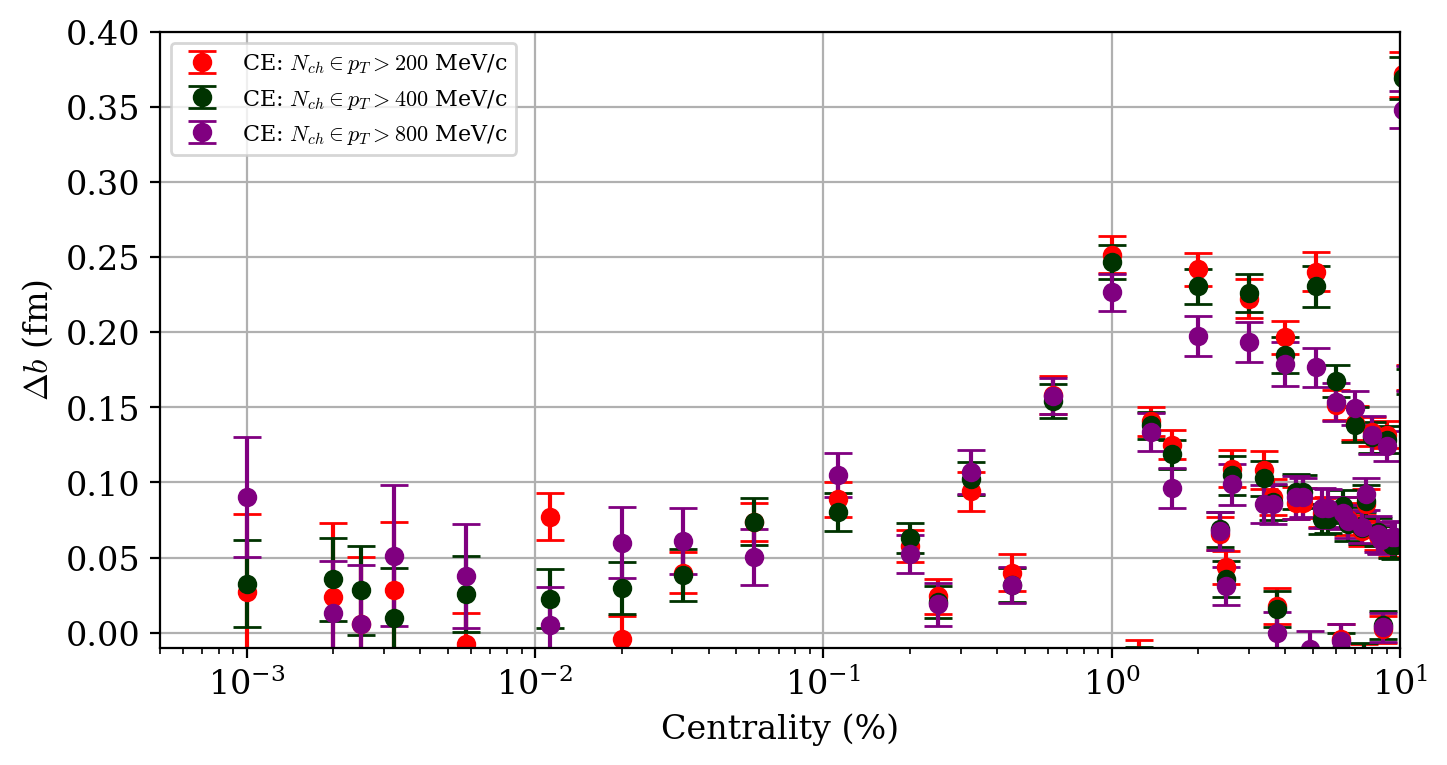

In [310]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(Delta_Centrality.ravel(), Delta_b_200MeV.ravel(),yerr=Delta_b_200MeV_Symerr.ravel(),
             fmt="o",capsize=5,color="red", label=r"CE: $N_{ch}\in p_T>200$ MeV/c")
plt.errorbar(Delta_Centrality.ravel(), Delta_b_400MeV.ravel(),yerr=Delta_b_400MeV_Symerr.ravel(),
             fmt="o",capsize=5,color="#003300", label=r"CE: $N_{ch}\in p_T>400$ MeV/c")
# plt.errorbar(Delta_Centrality.ravel(), Delta_b_450MeV.ravel(),yerr=Delta_b_450MeV_Symerr.ravel(),
#              fmt="o",capsize=5,color="#009933", label=r"CE: $N_{ch}\in p_T>450$ MeV/c")
# plt.errorbar(Delta_Centrality.ravel(), Delta_b_500MeV.ravel(),yerr=Delta_b_500MeV_Symerr.ravel(),
#              fmt="o",capsize=5,color="#33cc33", label=r"CE: $N_{ch}\in p_T>500$ MeV/c")
# plt.errorbar(Delta_Centrality.ravel(), Delta_b_550MeV.ravel(),yerr=Delta_b_550MeV_Symerr.ravel(),
#              fmt="o",capsize=5,color="#66ff66", label=r"CE: $N_{ch}\in p_T>550$ MeV/c")
# plt.errorbar(Delta_Centrality.ravel(), Delta_b_600MeV.ravel(),yerr=Delta_b_600MeV_Symerr.ravel(),
#              fmt="o",capsize=5,color="blue", label=r"CE: $N_{ch}\in p_T>600$ MeV/c")
plt.errorbar(Delta_Centrality.ravel(), Delta_b_800MeV.ravel(),yerr=Delta_b_800MeV_Symerr.ravel(),
             fmt="o",capsize=5,color="purple", label=r"CE: $N_{ch}\in p_T>800$ MeV/c")
# plt.errorbar(Delta_Centrality.ravel(), Delta_b_1000MeV.ravel(),yerr=Delta_b_1000MeV_Symerr.ravel(),
#              fmt="o",capsize=5,color="black", label=r"CE: $N_{ch}\in p_T>1000$ MeV/c")
plt.xlim([0.0005,10])
plt.ylim([-0.01,0.4])
plt.xscale("log")
plt.grid()
plt.xlabel("Centrality (%)")
plt.ylabel(r"$\Delta b$ (fm)")
plt.legend(prop={'size': '8'},loc="upper left")